# **Analisis Kepribadian Pelanggan (Customer Personality Analysis)**

## **1. Introduction**


### **1.1 Business Problem**


Perusahaan memiliki data pelanggan berisi informasi tentang pelanggan, belanja produk, respon terhadap promosi, dan jumlah pembelian melalui saluran pembelian yang ada. Perusahaan ingin memahami kepribadian dan perilaku pelanggan untuk mengembangkan strategi pemasaran yang lebih personal dan efektif, serta meningkatkan loyalitas pelanggan dan penjualan.

### **1.2 Business Question**


1. Bagaimana karakteristik pelanggan yang paling banyak melakukan pembelian produk dalam 2 tahun terakhir?
1. Bagaimana hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran untuk belanja dalam 2 tahun terakhir?
1. Bagaimana produk yang dibeli berdasarkan karakteristik pelanggan?
1. Bagaimana efektivitas kampanye promosi yang ada saat ini?
1. Apa saluran pembelian (web, katalog, toko) yang paling banyak digunakan oleh pelanggan?
1. Apa karakteristik pelanggan yang melakukan pembelian melalui saluran pembelian?

## **2. Data Preparation**

### **Impor Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import iqr

import warnings
warnings.filterwarnings('ignore')

Buat setelan tambahan 

In [2]:
pd.options.display.max_columns = None

# digunakan untuk mengubah opsi display.max_columns secara langsung di Pandas. 
# Dengan menyetelnya ke None, semua kolom dalam DataFrame akan ditampilkan tanpa pemotongan

In [3]:
# Set the color palette for Seaborn
sns.set_palette('RdBu')  # Set the color palette you want to use

# Get the colors from the current Seaborn palette
colors = sns.color_palette('RdBu')

# Set the default color cycle for Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

### **Baca Dataset**

In [4]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **2.1. Data Understanding**

### **2.1.1 Deskripsi Dataset**

Dataset ini berisi informasi pelanggan supermarket, mencakup karakteristik pelanggan, belanja produk, respons terhadap promosi, dan saluran pembelian.

**Kamus Data Pelanggan Supermarket**

1. Informasi Pelanggan
- **ID**: Identifikasi unik pelanggan
- **Year_Birth**: Tahun lahir pelanggan
- **Education**: Tingkat pendidikan pelanggan
- **Marital_Status**: Status pernikahan pelanggan
- **Income**: Pendapatan tahunan rumah tangga pelanggan
- **Kidhome**: Jumlah anak di rumah tangga pelanggan
- **Teenhome**: Jumlah remaja di rumah tangga pelanggan
- **Dt_Customer**: Tanggal pendaftaran pelanggan di perusahaan
- **Recency**: Jumlah hari sejak pembelian terakhir pelanggan
- **Complain**: 1 jika pelanggan menyampaikan keluhan dalam 2 tahun terakhir, 0 sebaliknya

2. Belanja Produk
    - **MntWines**: Jumlah yang dibelanjakan untuk anggur dalam 2 tahun terakhir
    - **MntFruits**: Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir
    - **MntMeatProducts**: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
    - **MntFishProducts**: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
    - **MntSweetProducts**: Jumlah yang dibelanjakan untuk makanan manis dalam 2 tahun terakhir
    - **MntGoldProds**: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

3. Respon terhadap Promosi
    - **NumDealsPurchases**: Jumlah pembelian dengan diskon
    - **AcceptedCmp1**: 1 jika pelanggan menerima tawaran pada kampanye ke-1, 0 sebaliknya
    - **AcceptedCmp2**: 1 jika pelanggan menerima tawaran pada kampanye ke-2, 0 sebaliknya
    - **AcceptedCmp3**: 1 jika pelanggan menerima tawaran pada kampanye ke-3, 0 sebaliknya
    - **AcceptedCmp4**: 1 jika pelanggan menerima tawaran pada kampanye ke-4, 0 sebaliknya
    - **AcceptedCmp5**: 1 jika pelanggan menerima tawaran pada kampanye ke-5, 0 sebaliknya
    - **Response**: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 sebaliknya

4. Saluran Pembelian
    - **NumWebPurchases**: Jumlah pembelian yang dilakukan melalui situs web perusahaan
    - **NumCatalogPurchases**: Jumlah pembelian yang dilakukan menggunakan katalog
    - **NumStorePurchases**: Jumlah pembelian yang dilakukan langsung di toko
    - **NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

5. Kolom Lain
    - **Z_CostContact**: Kolom yang tidak relevan dengan data
    - **Z_Revenue**: Kolom yang tidak relevan dengan data

### **2.1.2 Pemahaman Data secara Umum**

#### **Informasi Tabel**

Memeriksa informasi kolom seperti daftar kolom pada data, jumlah baris pada kolom yang bernilai bukan null, dan tipe data kolom tersebut. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Hasil Observasi**
- Kolom dengan tipe data object ada 2, yaitu Education dan Marital_Status.
- Kolom dengan tipe data numerik ada 27, yaitu kolom selain Education dan Marital_Status.

#### **Statistik Deskriptif pada Tiap Kolom**

Memeriksa statistik deskripstif pada tiap kolom

In [6]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Ini adalah statistik deskriptif dari tiap kolom, baik kolom dengan tipe data numerik maupun object. Masing-masing statistik deskriptif pada kolom ini akan diobservasi lebih lanjut pada bagian berikutnya.

#### **Korelasi antar Kolom**

Memeriksa nilai korelasi antar kolom

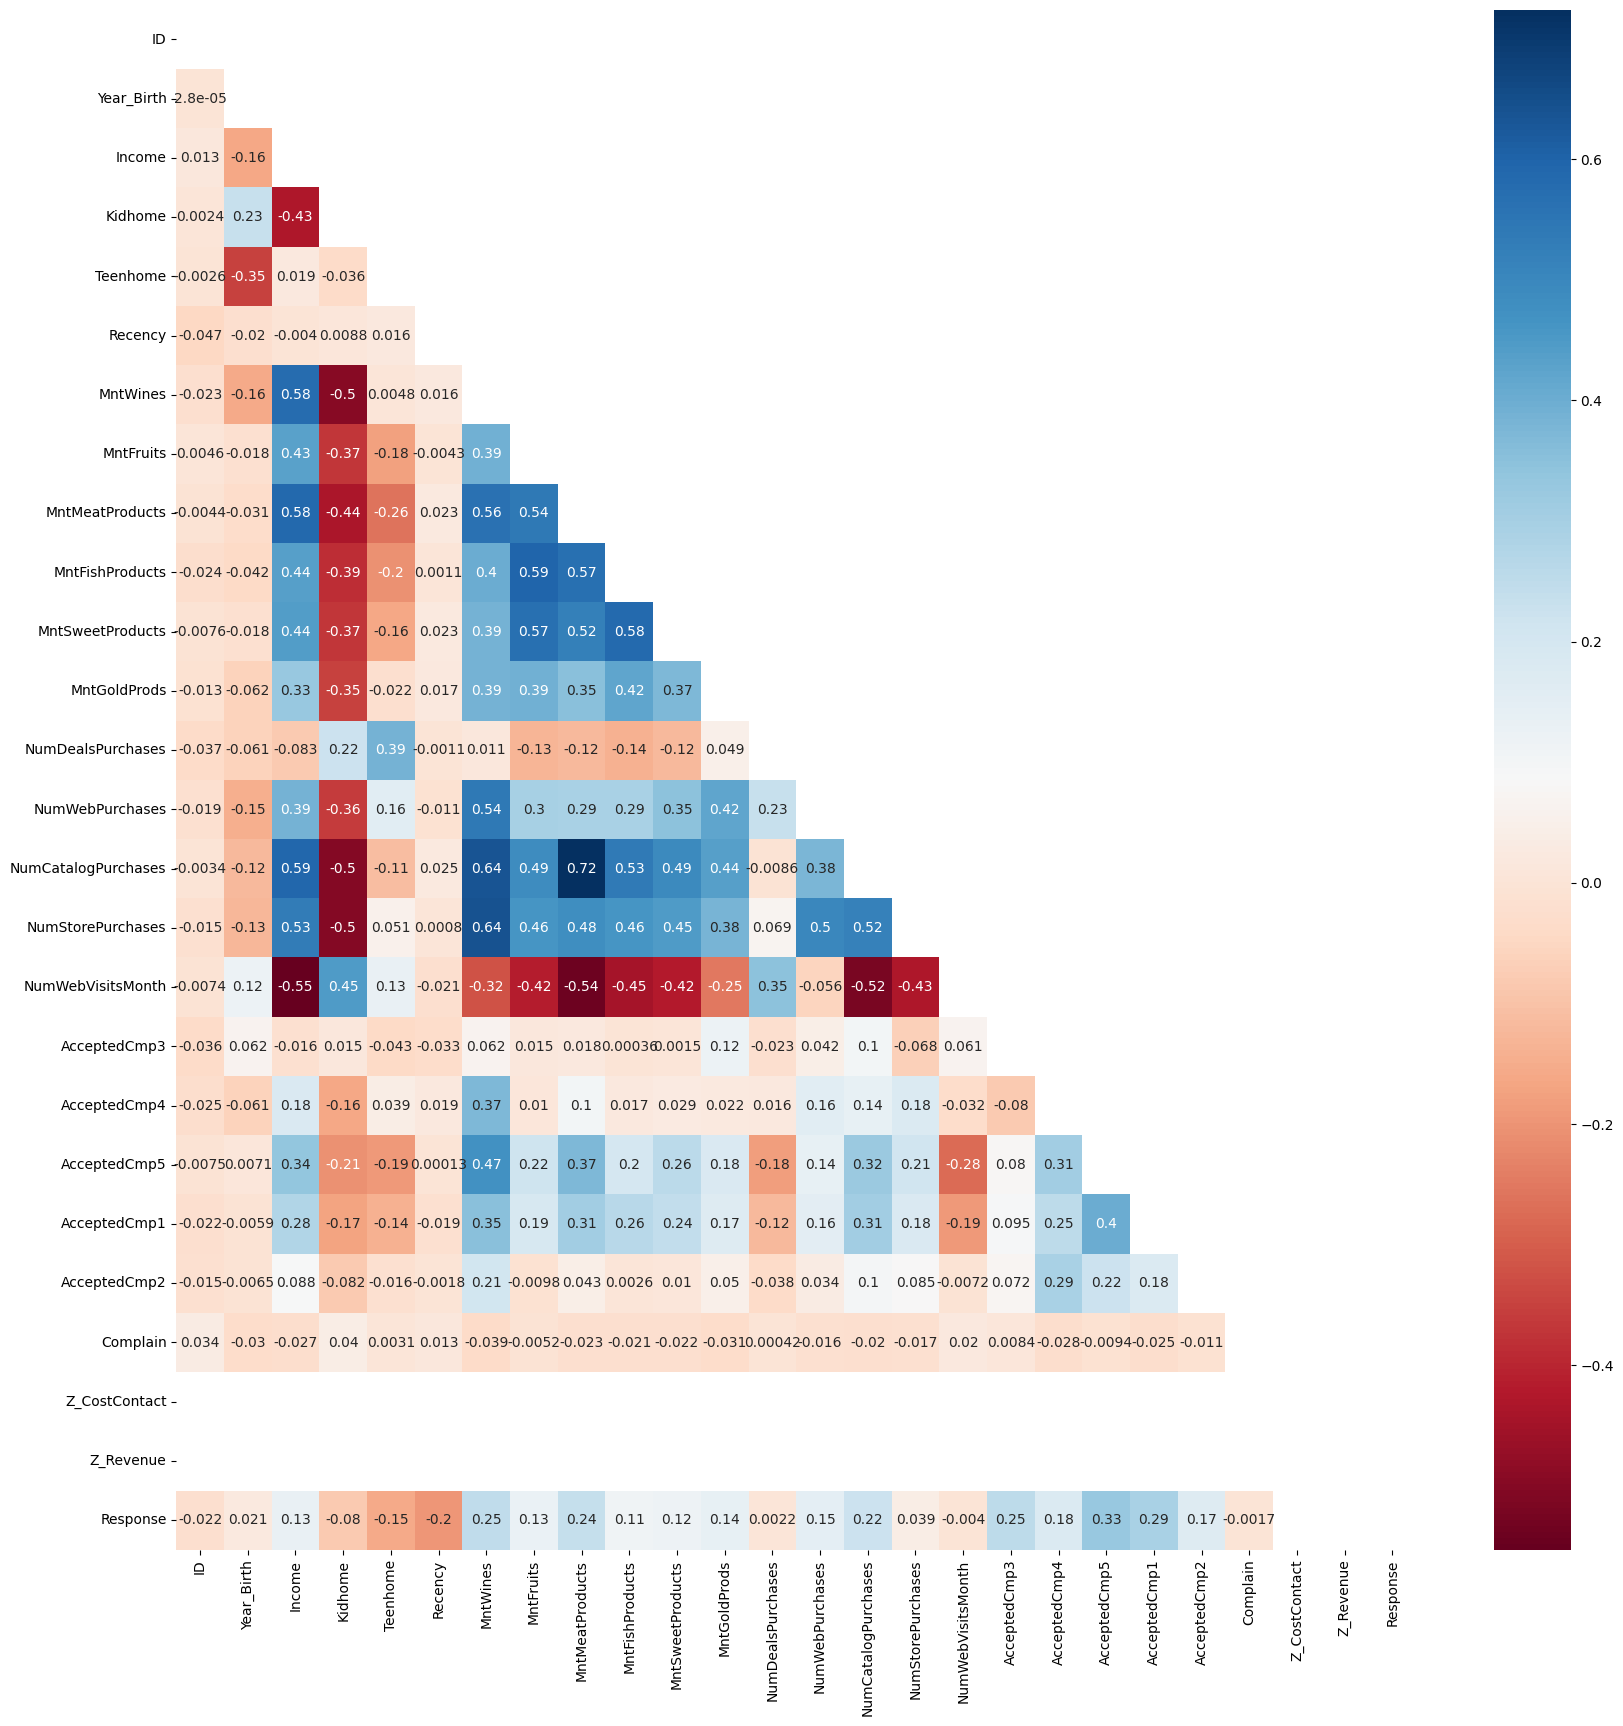

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), mask=np.triu(df.corr(numeric_only=True)), cmap='RdBu', annot=True)
plt.show()

**Hasil Observasi**
    
- Terdapat korelasi positif moderat antara Income dan NumCatalogPurchases. Jika pendapatan tahunan pelanggan semakin besar, maka jumlah pembelian yang dilakukan menggunakan katalog juga semakin besar.
- Terdapat korelasi negatif moderat antara Kidhome dan MntWines. Jika jumlah anak di rumah tangga pelanggan semakin banyak, maka jumlah jumlah yang dibelanjakan untuk anggur dalam 2 tahun terakhir semakin sedikit.

#### **Memeriksa Data Hilang**

Memeriksa jumlah data yang hilang pada masing-masing kolom

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Hasil Observasi**

Berdasarkan keluaran di atas, terdapat data hilang pada kolom Income sebanyak 24 baris

#### **Memeriksa Data Duplikat**

Memeriksa jumlah jumlah baris duplikat

In [9]:
df.duplicated().sum()

np.int64(0)

**Hasil Observasi**

Berdasarkan keluaran di atas, tidak ada baris yang duplikat

### **2.1.3. Memahami Data per Kolom**

#### **1. Customer Information**

##### **ID**

Identifikasi unik pelanggan

In [10]:
# Memeriksa nilai unik yang ada pada kolom
df['ID'].unique()

array([5524, 2174, 4141, ..., 7270, 8235, 9405])

In [11]:
# Memeriksa apakah nilai dalam kolom bersifat unik
# Mengembalikan True jika nilai dalam kolom bersifat unik.
df['ID'].is_unique

True

In [12]:
# Memeriksa statistik deskriptif pada kolom Year_Birth
print('Nilai minimum:', df['ID'].min())
print('Nilai maksimum:', df['ID'].max())

Nilai minimum: 0
Nilai maksimum: 11191


**Hasil Observasi**
- ID ini bersifat unik.
- ID ini memiliki data integer dengan rentang nilai 0 hingga 11191. Ini berarti ID memiliki panjang yang berbeda, yaitu minimal 1 dan maksimal 5.

##### **Year_Birth**

Tahun lahir pelanggan

In [13]:
# Memeriksa nilai unik yang ada pada kolom
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [14]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Year_Birth'].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

In [15]:
# Memeriksa statistik deskriptif pada kolom Year_Birth
print('Nilai minimum:', df['Year_Birth'].min())
print('Nilai maksimum:', df['Year_Birth'].max())
print('Nilai modus:', df['Year_Birth'].mode()[0])

Nilai minimum: 1893
Nilai maksimum: 1996
Nilai modus: 1976


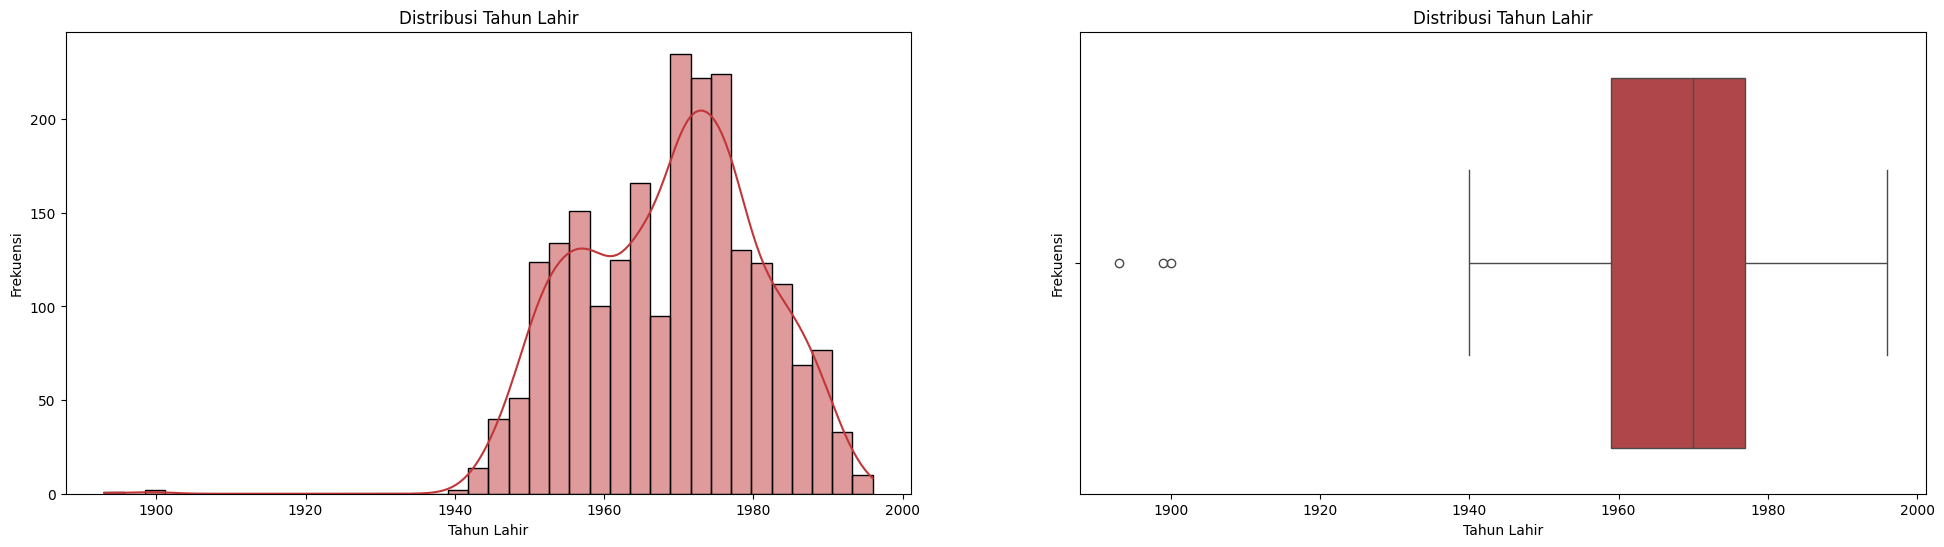

In [16]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.title('Distribusi Tahun Lahir')
sns.histplot(df, x='Year_Birth', kde=True)
plt.xlabel('Tahun Lahir')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.title('Distribusi Tahun Lahir')
sns.boxplot(df, x='Year_Birth')
plt.xlabel('Tahun Lahir')
plt.ylabel('Frekuensi')

plt.show()

**Hasil Observasi**
- Pelanggan yang paling tua lahir pada 1893.
- Pelanggan yang paling muda lahir pada 1996.
- Mayoritas pelanggan lahir pada 1976.
- Data Tahun Lahir ini tidak terdistribusi normal. Data ini mengandung pencilan.

##### **Education**
Tingkat pendidikan pelanggan

In [17]:
# Memeriksa nilai unik yang ada pada kolom
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [18]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

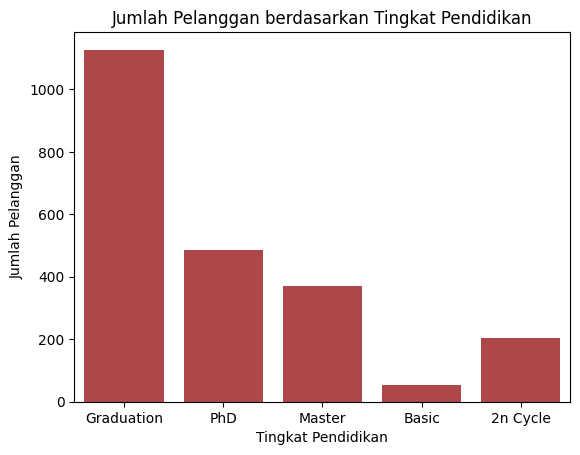

In [19]:
plt.title('Jumlah Pelanggan berdasarkan Tingkat Pendidikan')
sns.countplot(df, x='Education')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Hasil Observasi**
- Tingkat pendidikan pelanggan pada data ini terdiri dari 5 kategori, yaitu Graduation, PhD, Master, Basic, dan 2n Cycle.
- Berdasarkan [International Standard Classification of Education (ISCED)](https://ilostat.ilo.org/methods/concepts-and-definitions/classification-education/), pendidikan tinggi terdiri dari Bachelor’s, Master’s, dan Doctoral. Tingkat pendidikan di sebelum pendidikan tinggi dapat dianggap sebagai tingkat pendidikan dasar (Basic).
    - Tingkat pendidikan **PhD** adalah tingkat pendidikan setara Doctoral.
    - Tingkat pendidikan **Master** dan [**2n Cycle**](https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/) adalah tingkat pendidikan setara Master’s.
    - Tingkat pendidikan Basic adalah tingkat pendidikan sebelum pendidikan tinggi atau tingkat pendidikan dasar (Basic).
    - Dari 5 tingkat pendidikan pada data ini, belum ada tingkat pendidikan yang setara dengan Bachelor’s. Berdasarkan hal ini, tingkat pendidikan Graduation dapat diduga setara dengan Bachelor’s. Berdasarkan [Oxford Learners Dictionaries](https://www.oxfordlearnersdictionaries.com/definition/american_english/graduation), Graduation memiliki arti "the act of successfully completing a college or university degree, or getting a high school diploma". Tingkat pendidikan **Graduation** dapat dianggap sebagai tingkat pendidikan setara Bachelor’s.
- Bachelor’s adalah tingkat pendidikan **mayoritas pelanggan** dan Basic adalah tingkat pendidikan **minoritas pelanggan**.

##### **Marital_Status**
Status pernikahan pelanggan

In [20]:
# Memeriksa nilai unik yang ada pada kolom
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

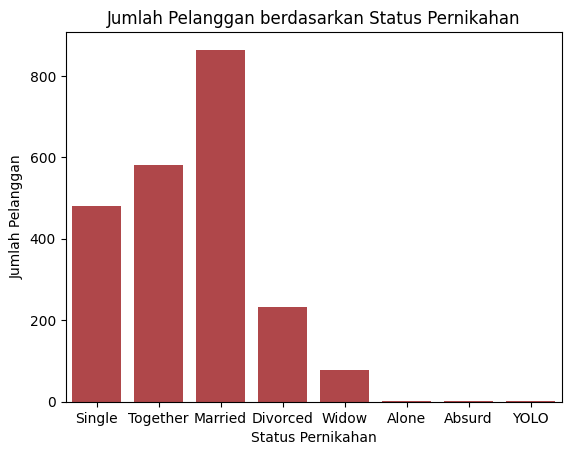

In [22]:
plt.title('Jumlah Pelanggan berdasarkan Status Pernikahan')
sns.countplot(df, x='Marital_Status')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [23]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [24]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0


**Hasil Observasi**
- Status pernikahan pada data ini terdiri dari 8 kategori, yaitu `Single`, `Together`, `Married`, `Divorced`, `Widow`, `Alone`, `Absurd`, dan `YOLO`.
- `Single` memiliki arti yang sama dengan `Alone`, yaitu seseorang yang tidak pernah menikah atau tidak sedang berada dalam hubungan pernikahan.
- `Together` sering digunakan untuk merujuk pada seseorang yang sedang berada dalam suatu hubungan dengan komitmen, namun tidak terikat secara hukum melalui pernikahan.
- `Married` memiliki arti seseorang yang sedang berada dalam hubungan pernikahan yang sah menurut hukum.
- `Divorced` memiliki arti seseorang yang telah mengakhiri hubungan pernikahan secara sah melalui proses perceraian.
- `Widow` memiliki arti seseorang yang pasangannya telah meninggal dan belum menikah lagi setelah kematian pasangannya.
- `Absurd` dan `YOLO` memiliki arti yang ambigu terkait status pernikahan.
- Mayoritas pelanggan berstatus `Married`.

##### **Income**
Pendapatan tahunan rumah tangga pelanggan

In [25]:
# Memeriksa nilai unik yang ada pada kolom
df['Income'].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [26]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Income'].value_counts()

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64

In [27]:
# Memeriksa statistik deskriptif
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [28]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Income\':', df['Income'].mode()[0])

Modus 'Income': 7500.0


Berdasarkan bagian sebelumnya, data hilang terdapat pada kolom **Income**.

In [29]:
# Memeriksa nilai unik yang ada pada kolom
print('Banyak data hilang:', df['Income'].isna().sum())

Banyak data hilang: 24


In [30]:
# Daftar data yang hilang
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


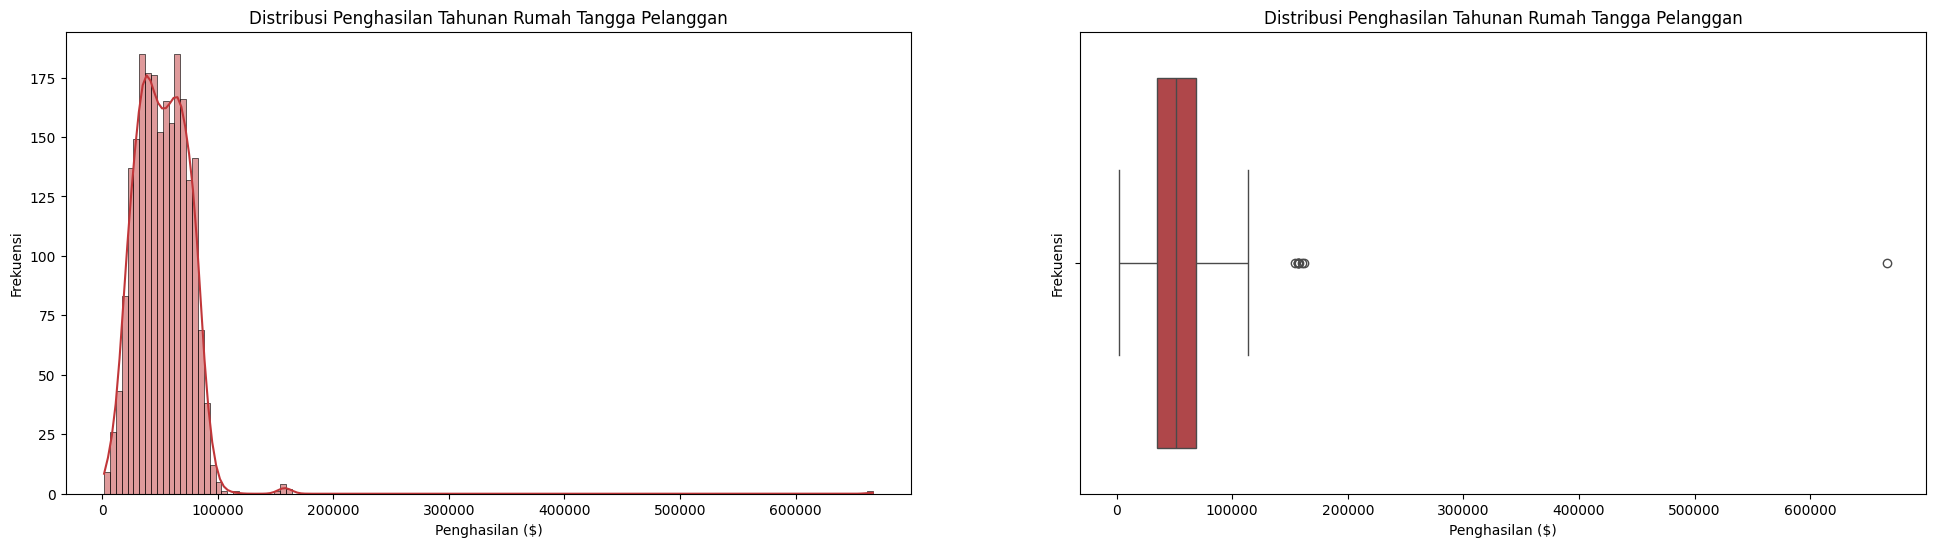

In [31]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.title('Distribusi Penghasilan Tahunan Rumah Tangga Pelanggan')
sns.histplot(df, x='Income', kde=True)
plt.xlabel('Penghasilan ($)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.title('Distribusi Penghasilan Tahunan Rumah Tangga Pelanggan')
sns.boxplot(df, x='Income')
plt.xlabel('Penghasilan ($)')
plt.ylabel('Frekuensi')

plt.show()

**Hasil Observasi**
- Pendapatan tahunan rumah tangga berada pada rentang 1730 hingga 666666.
- Mayoritas pelanggan memperoleh pendapatan tahunan sebesar 7500.
- Distribusi penghasilan tahunan rumah tangga pelanggan tidak normal. Pada data ini terdapat pencilan.

##### **Kidhome**
Jumlah anak di rumah tangga pelanggan

In [32]:
# Memeriksa nilai unik yang ada pada kolom
df['Kidhome'].unique()

array([0, 1, 2])

In [33]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [34]:
# Memeriksa statistik deskriptif pada kolom
df['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [35]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Kidhome\':', df['Kidhome'].mode()[0])

Modus 'Kidhome': 0


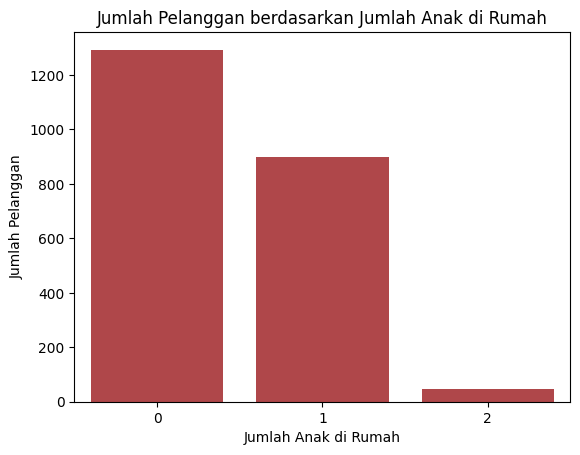

In [36]:
plt.title('Jumlah Pelanggan berdasarkan Jumlah Anak di Rumah')
sns.countplot(df, x='Kidhome')
plt.xlabel('Jumlah Anak di Rumah')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Hasil Observasi**
- Berdasarkan jumlah anak di rumah, pelanggan dapat dibagi menjadi 3 kategori, yaitu pelanggan yang tidak memiliki anak, pelanggan yang memiliki satu anak, dan pelanggan yang memiliki 2 anak di rumah.
- Mayoritas pelanggan tidak memiliki anak di rumah.

##### **Teenhome**
Jumlah remaja di rumah tangga pelanggan

In [37]:
# Memeriksa nilai unik yang ada pada kolom
df['Teenhome'].unique()

array([0, 1, 2])

In [38]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [39]:
# Memeriksa statistik deskriptif pada kolom
df['Teenhome'].describe()

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [40]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Teenhome\':', df['Teenhome'].mode()[0])

Modus 'Teenhome': 0


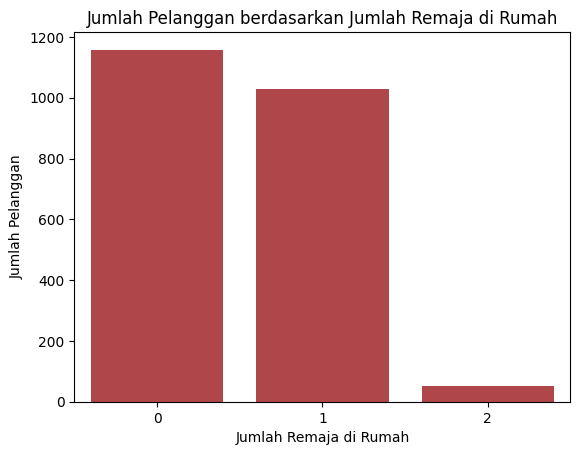

In [41]:
plt.title('Jumlah Pelanggan berdasarkan Jumlah Remaja di Rumah')
sns.countplot(df, x='Teenhome')
plt.xlabel('Jumlah Remaja di Rumah')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Hasil Observasi**
- Berdasarkan jumlah remaja di rumah, pelanggan dapat dibagi menjadi 3 kategori, yaitu pelanggan yang tidak memiliki remaja, pelanggan yang memiliki satu remaja, dan pelanggan yang memiliki 2 remaja di rumah.
- Mayoritas pelanggan tidak memiliki remaja di rumah.

##### **Dt_Customer**
Tanggal pendaftaran pelanggan di perusahaan

In [42]:
# Memeriksa nilai unik yang ada pada kolom
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [43]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Dt_Customer'].value_counts()

Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64

In [44]:
# Memeriksa statistik deskriptif pada kolom
df['Dt_Customer'].describe()

count           2240
unique           663
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object

In [45]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Dt_Customer\':', df['Dt_Customer'].mode()[0])

Modus 'Dt_Customer': 31-08-2012


**Hasil Observasi**
- Mayoritas melakukan pendaftaran pada 31-08-2012.
- Pada data ini, tipe data Dt_Customer adalah object sehingga sulit memeriksa secara langsung rentang tanggal pendaftaran paling lama dan paling baru. Pemeriksaan terkait distribusi data dan nilai pencilan ini akan diperiksa pada Data Cleaning, setelah tipe data diubah.

##### **Recency**
Jumlah hari sejak pembelian terakhir pelanggan

In [46]:
# Memeriksa nilai unik yang ada pada kolom
df['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7])

In [47]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Recency'].value_counts()

Recency
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64

In [48]:
# Memeriksa statistik deskriptif pada kolom
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [49]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Recency\':', df['Recency'].mode()[0])

Modus 'Recency': 56


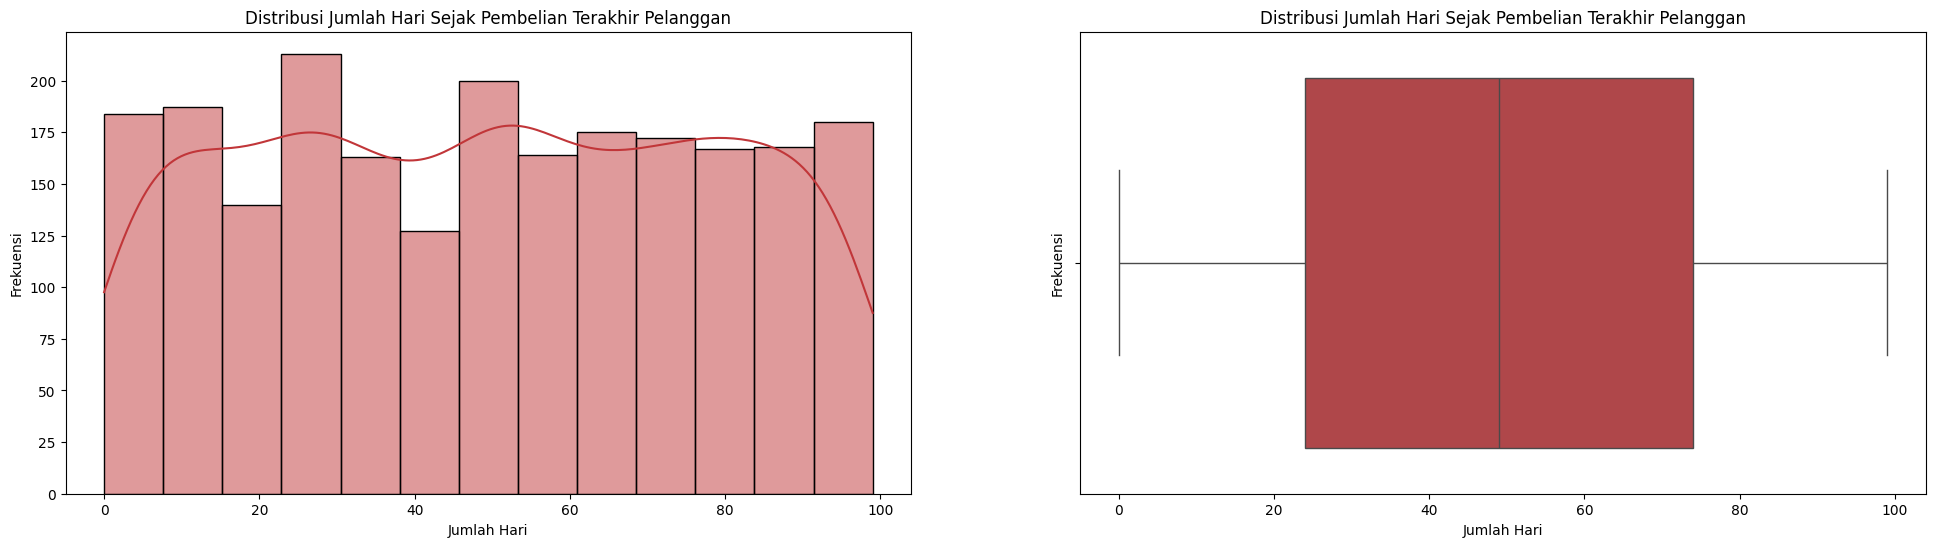

In [50]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.title('Distribusi Jumlah Hari Sejak Pembelian Terakhir Pelanggan')
sns.histplot(df, x='Recency', kde=True)
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.title('Distribusi Jumlah Hari Sejak Pembelian Terakhir Pelanggan')
sns.boxplot(df, x='Recency')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')

plt.show()

**Hasil Observasi**
- Pelanggan tidak berbelanja paling lama selama 99 hari.
- Mayoritas pelanggan tidak berbelanja selama 56 hari.
- Data jumlah hari sejak pembelian terakhir pelanggan ini tidak terdistribusi normal.
- Data jumlah hari sejak pembelian terakhir pelanggan ini tidak memiliki pencilan.

##### **Complain**
1 jika pelanggan menyampaikan keluhan dalam 2 tahun terakhir, 0 sebaliknya

In [51]:
# Memeriksa nilai unik yang ada pada kolom
df['Complain'].unique()

array([0, 1])

In [52]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
df['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [53]:
# Memeriksa modus dari nilai unik yang ada pada kolom
print('Modus \'Complain\':', df['Complain'].mode()[0])

Modus 'Complain': 0


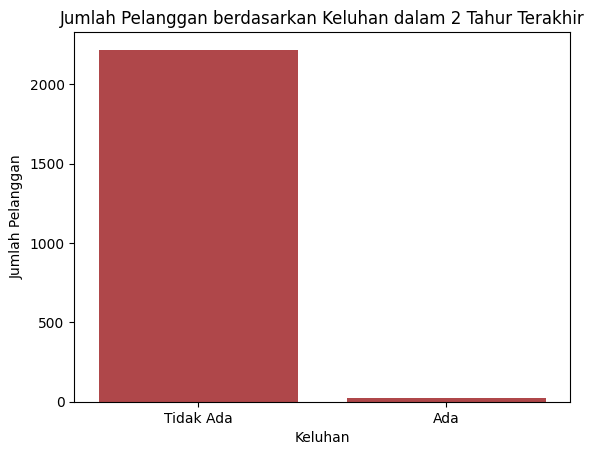

In [54]:
plt.title('Jumlah Pelanggan berdasarkan Keluhan dalam 2 Tahur Terakhir')
ax = sns.countplot(df, x='Complain')
plt.xlabel('Keluhan')
plt.ylabel('Jumlah Pelanggan')
ax.set_xticklabels(['Tidak Ada', 'Ada'])
plt.show()

**Hasil Observasi**
- Mayoritas menyampaikan keluhan dalam 2 tahun terakhir.
- Pelanggan yang menyampaikan keluhan dalam 2 tahun terakhir sangat sedikit.

#### **2. Product Spending**

- MntWines: Jumlah yang dibelanjakan untuk anggur dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dibelanjakan untuk makanan manis dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

In [55]:
# Mendefinisikan kolom pada kategori Product Spending
columns1 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
columns1

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [56]:
# Memeriksa nilai unik yang ada pada kolom
for column in columns1:
    print(f'- {column}: {df[column].unique()}\n')

- MntWines: [ 635   11  426  173  520  235   76   14   28    5    6  194  233    3
 1006   53   84 1012    4   86    1  867  384  270   36  684    8  112
  110   96  482   40  702   55  437  421   13    9   81  123   48  826
  245  650   12  510  328  984  295  447  712  452  523  546  398   10
  688  247  856  496   25  258  565    2  721 1032  577   64  163   17
  130  292  350  135  230    7  445   15   27  505   51  207   41  386
  562  217  144  454  425 1332  527  490  378  547   47  320   34  722
  162  450   70  352  492  120  534  236  231  220  796    0  962  738
  399  614   32  598   73   42  346  888  997  212  536 1349 1001   20
   18  125  277   85   59 1149  847   29  152  620   35  356  783  466
   23  656  519  344  448  265  587  763   22   54 1170   72  613  224
  410  239  171 1076  182  824   30  377  155  897  131  297  787  792
  983  415  901  382  559  789 1218  925  864  960   16  168   45   24
  918  138  554  167  177   38  483   77  778   33  625  216   68

In [57]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
for column in columns1:
    print(f'- {df[column].value_counts()}\n')

- MntWines
2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: count, Length: 776, dtype: int64

- MntFruits
0      400
1      162
2      120
3      116
4      104
      ... 
164      1
130      1
189      1
101      1
154      1
Name: count, Length: 158, dtype: int64

- MntMeatProducts
7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: count, Length: 558, dtype: int64

- MntFishProducts
0      384
2      156
3      130
4      108
6       82
      ... 
232      1
167      1
247      1
194      1
229      1
Name: count, Length: 182, dtype: int64

- MntSweetProducts
0      419
1      161
2      128
3      101
4       82
      ... 
146      1
132      1
167      1
99       1
111      1
Name: count, Length: 177, dtype: int64

- MntGoldProds
1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Nam

In [58]:
# Memeriksa statistik deskriptif pada kolom
for column in columns1:
    print(f'- {column}:\n{df[column].describe()}\n')

- MntWines:
count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

- MntFruits:
count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

- MntMeatProducts:
count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

- MntFishProducts:
count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

- MntSweetProducts:
count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.0000

In [59]:
# Memeriksa modus dari nilai unik yang ada pada kolom
for column in columns1:
    print(f'Modus \'{column}\':', df[column].mode()[0])

Modus 'MntWines': 2
Modus 'MntFruits': 0
Modus 'MntMeatProducts': 7
Modus 'MntFishProducts': 0
Modus 'MntSweetProducts': 0
Modus 'MntGoldProds': 1


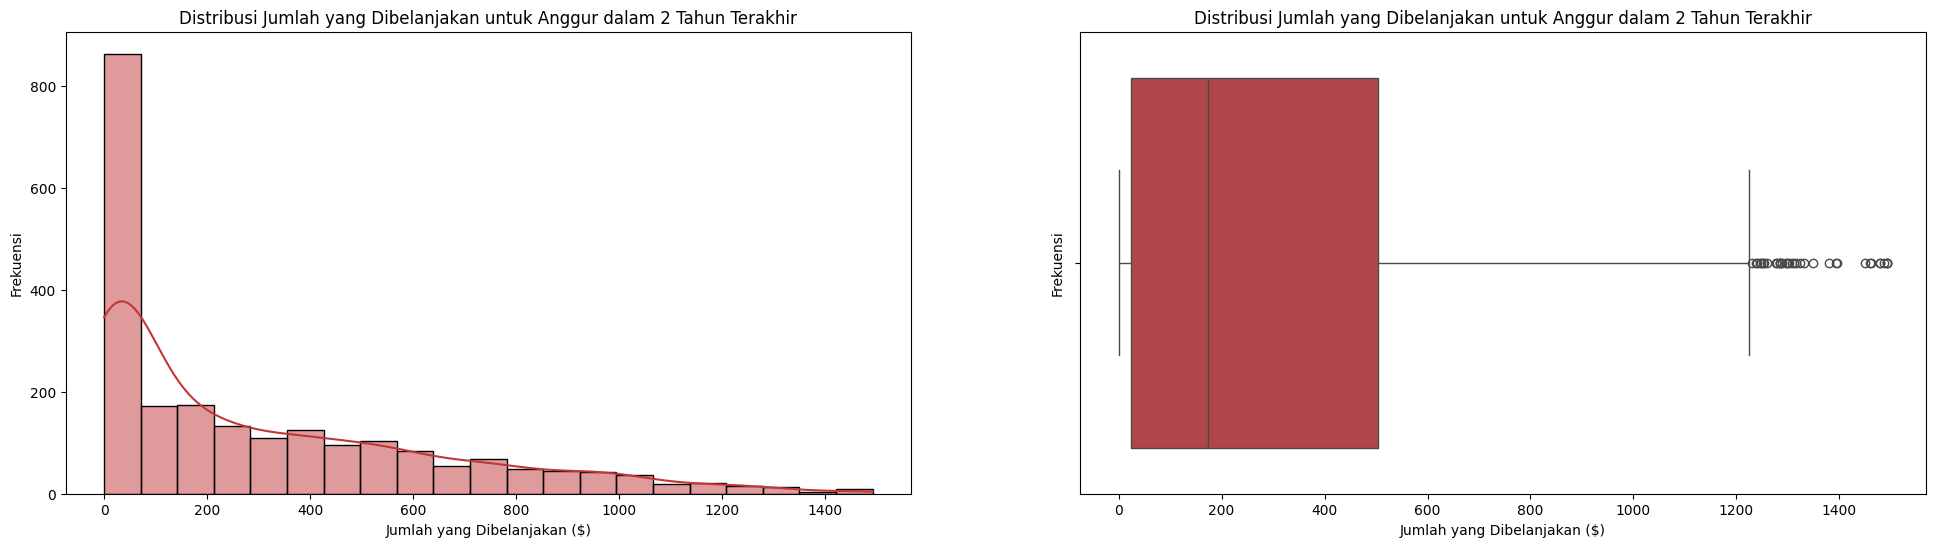

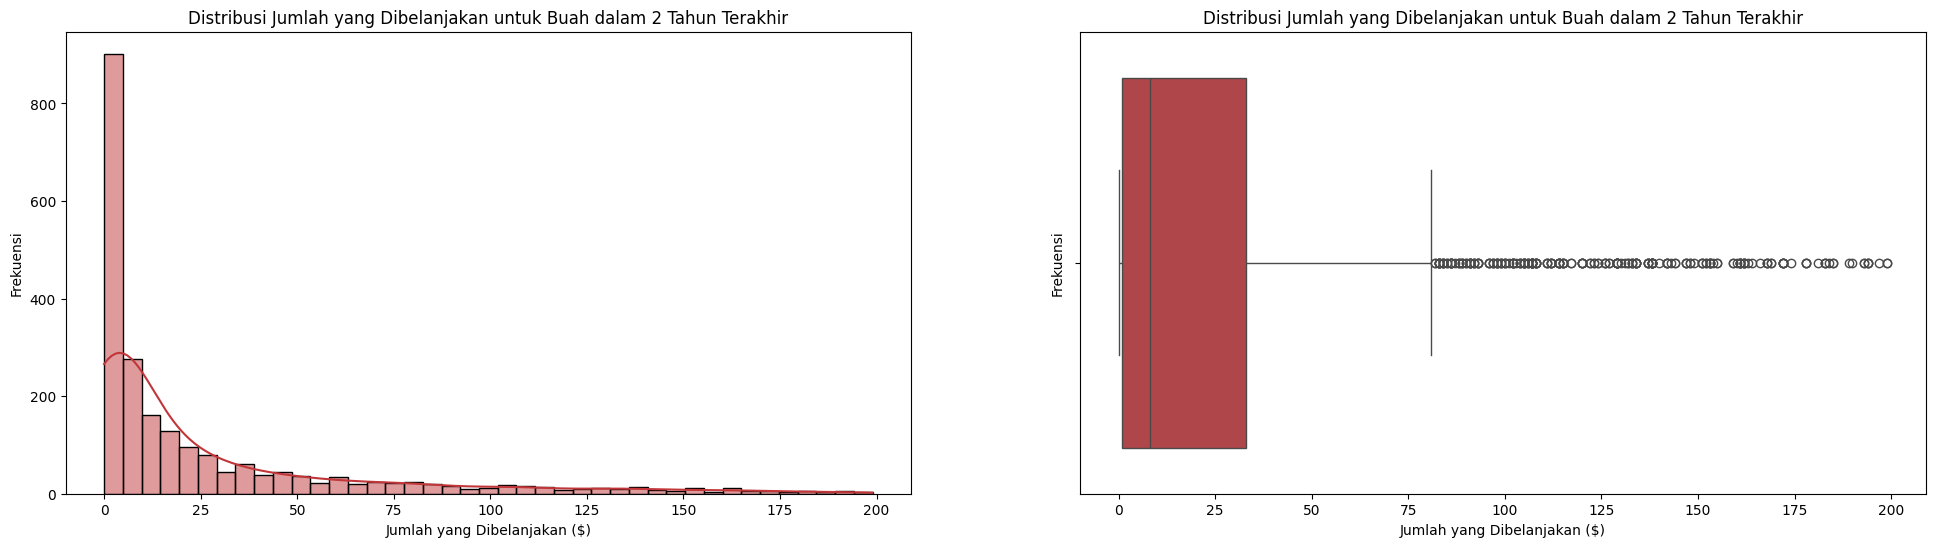

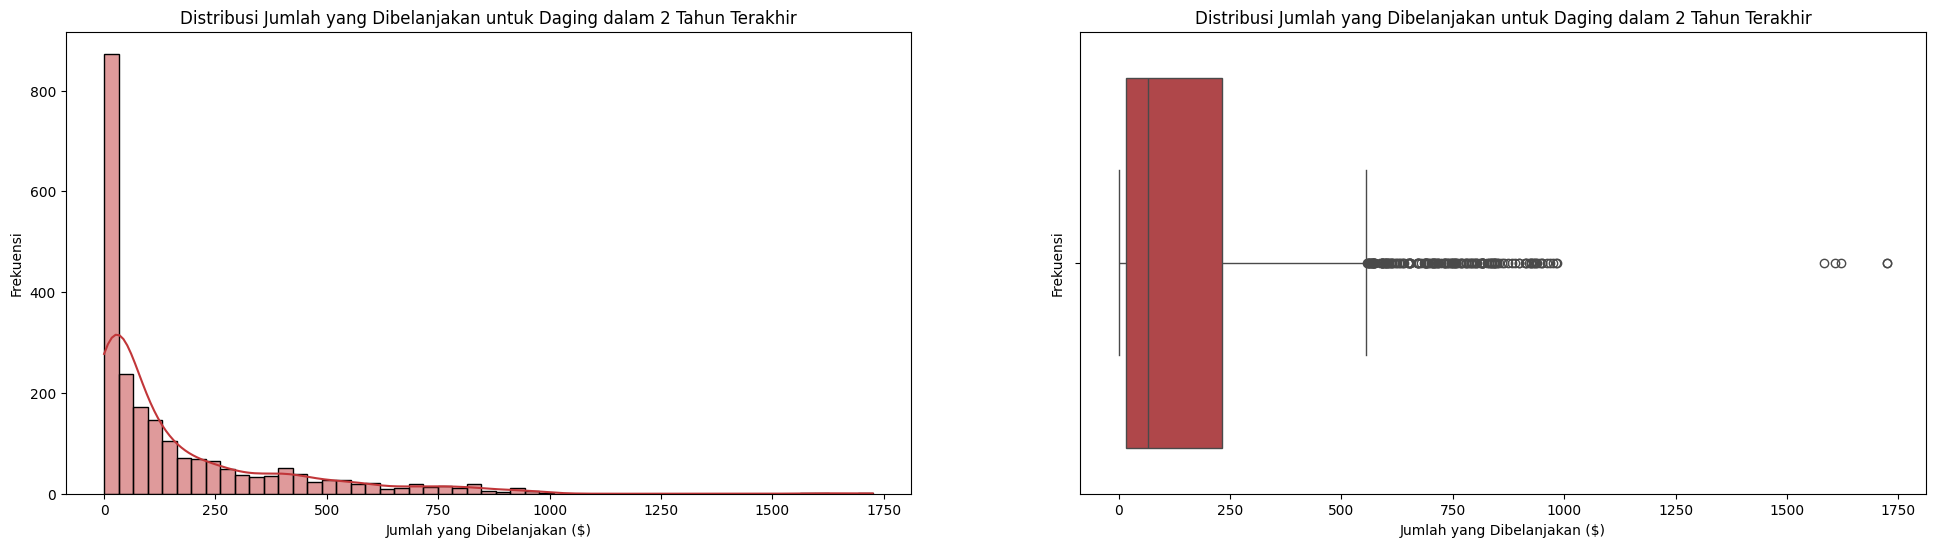

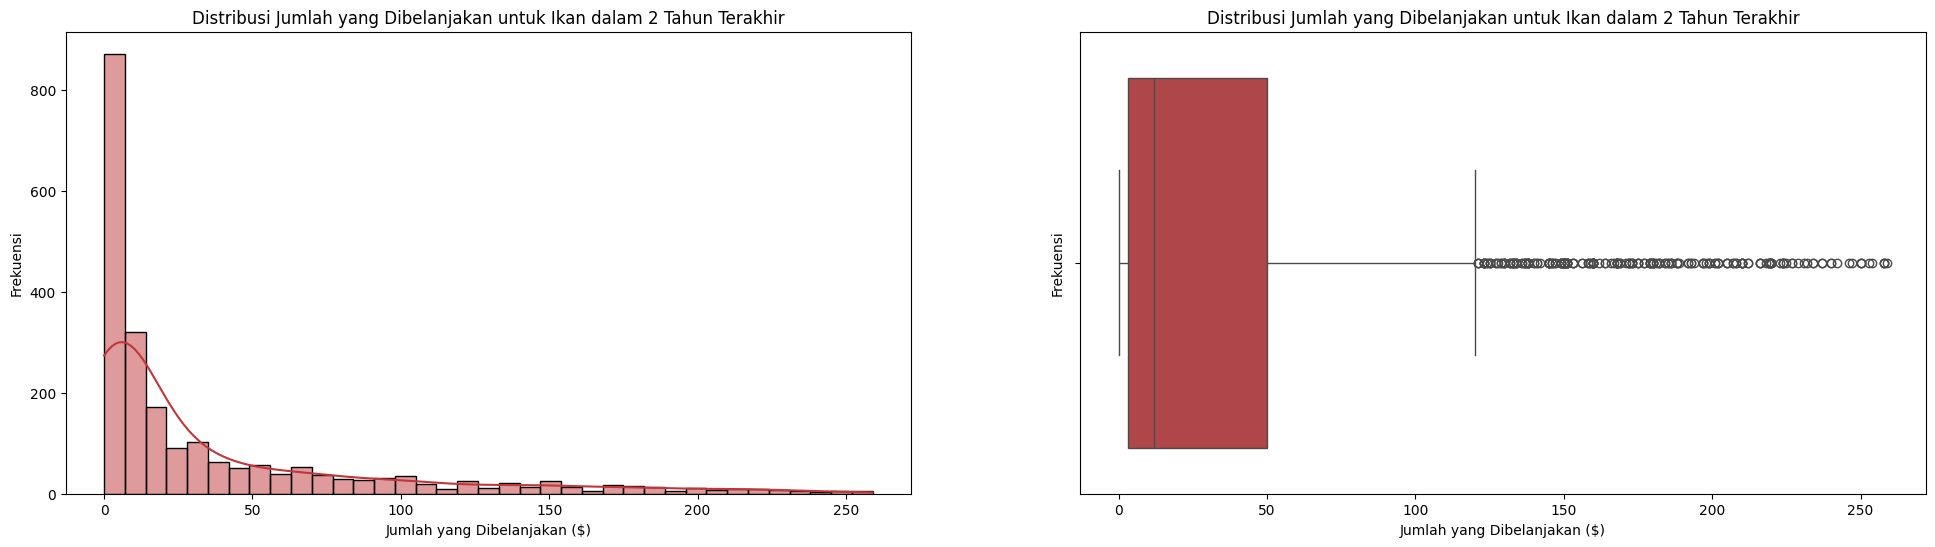

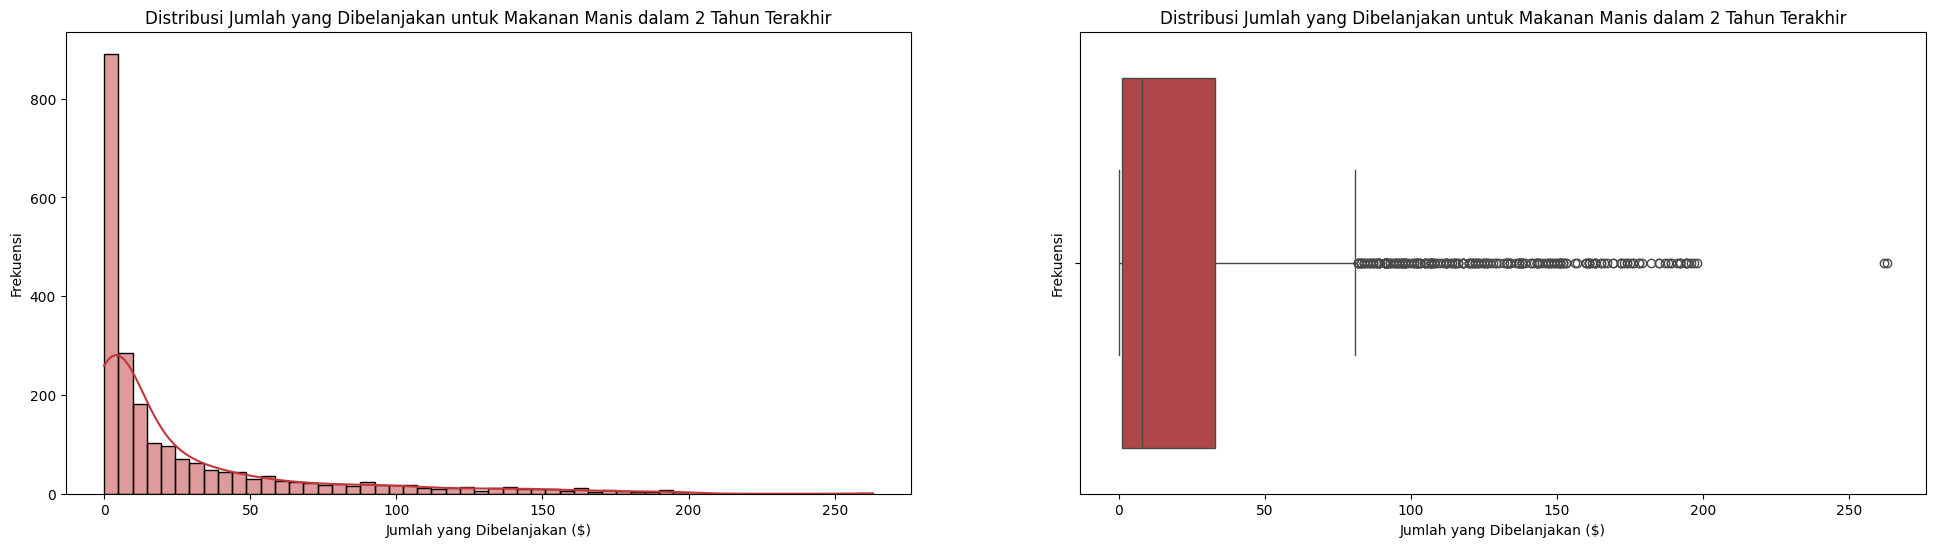

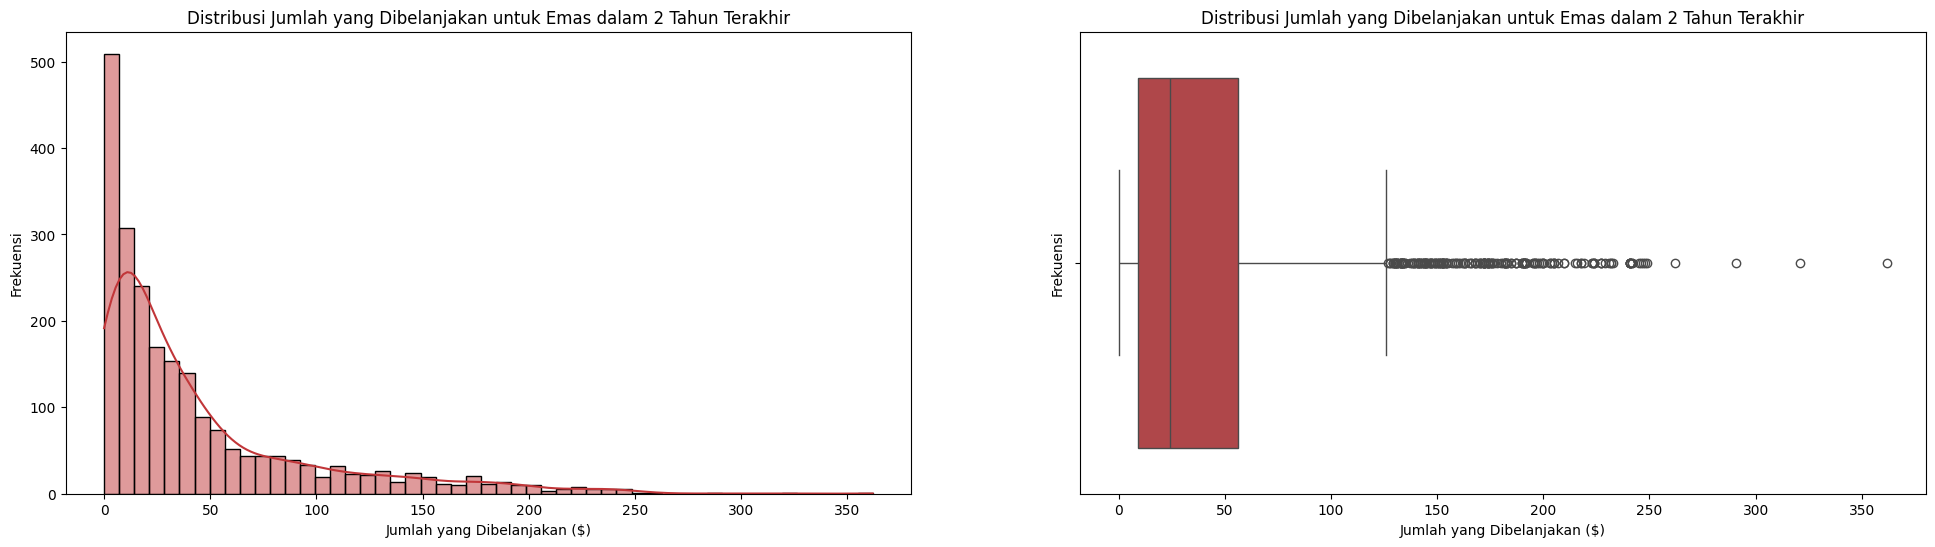

In [60]:
viz_title = [
    'Distribusi Jumlah yang Dibelanjakan untuk Anggur dalam 2 Tahun Terakhir',
    'Distribusi Jumlah yang Dibelanjakan untuk Buah dalam 2 Tahun Terakhir',
    'Distribusi Jumlah yang Dibelanjakan untuk Daging dalam 2 Tahun Terakhir',
    'Distribusi Jumlah yang Dibelanjakan untuk Ikan dalam 2 Tahun Terakhir',
    'Distribusi Jumlah yang Dibelanjakan untuk Makanan Manis dalam 2 Tahun Terakhir',
    'Distribusi Jumlah yang Dibelanjakan untuk Emas dalam 2 Tahun Terakhir',
    ]

for i, column in enumerate(columns1):
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.title(viz_title[i])
    sns.histplot(df, x=column, kde=True)
    plt.xlabel('Jumlah yang Dibelanjakan ($)')
    plt.ylabel('Frekuensi')

    plt.subplot(1, 2, 2)
    plt.title(viz_title[i])
    sns.boxplot(df, x=column)
    plt.xlabel('Jumlah yang Dibelanjakan ($)')
    plt.ylabel('Frekuensi')

    plt.show()

**Hasil Observasi**
- Rentang jumlah yang dibelanjakan pelanggan untuk produk tertentu dalam 2 tahun terakhir sebagai berikut.
    - anggur: 0$ hingga 1493$.
    - buah: 0$ hingga 199$.
    - daging: 0$ hingga 1725$.
    - ikan: 0$ hingga 259$.
    - makanan manis: 0$ hingga 263$.
    - emas: 0$ hingga 362$.

- Mayoritas jumlah yang dibelanjakan pelanggan untuk produk tertentu dalam 2 tahun terakhir sebagai berikut.
    - anggur: 2$.
    - buah: 0. Ini berarti mayoritas pelanggan tidak belanja produk ini.
    - daging: 7$. 
    - ikan: 0$. Ini berarti mayoritas pelanggan tidak belanja produk ini.
    - makanan manis: 0. Ini berarti mayoritas pelanggan tidak belanja produk ini.
    - emas: 1$.

- Data pada kolom MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, dan MntGoldProds tidak terdistribusi normal dan memiliki pencilan.

#### **3. Promotion Response**

- NumDealsPurchases: Jumlah pembelian dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran pada kampanye ke-1, 0 sebaliknya
- AcceptedCmp2: 1 jika pelanggan menerima tawaran pada kampanye ke-2, 0 sebaliknya
- AcceptedCmp3: 1 jika pelanggan menerima tawaran pada kampanye ke-3, 0 sebaliknya
- AcceptedCmp4: 1 jika pelanggan menerima tawaran pada kampanye ke-4, 0 sebaliknya
- AcceptedCmp5: 1 jika pelanggan menerima tawaran pada kampanye ke-5, 0 sebaliknya
- Response: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 sebaliknya

In [61]:
# Mendefinisikan kolom pada kategori Product Spending
columns2 = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
columns2

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [62]:
# Memeriksa nilai unik yang ada pada kolom
for column in ['NumDealsPurchases'] + columns2:
    print(f'- {column}: {df[column].unique()}\n')

- NumDealsPurchases: [ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]

- AcceptedCmp1: [0 1]

- AcceptedCmp2: [0 1]

- AcceptedCmp3: [0 1]

- AcceptedCmp4: [0 1]

- AcceptedCmp5: [0 1]

- Response: [1 0]



In [63]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
for column in ['NumDealsPurchases'] + columns2:
    print(f'- {df[column].value_counts()}\n')

- NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: count, dtype: int64

- AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

- AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

- AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

- AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

- AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

- Response
0    1906
1     334
Name: count, dtype: int64



In [64]:
# Memeriksa statistik deskriptif pada kolom NumDealsPurchases
print(f'- NumDealsPurchases: {df['NumDealsPurchases'].describe()}\n')

- NumDealsPurchases: count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64



In [65]:
# Memeriksa modus dari nilai unik yang ada pada kolom
for column in ['NumDealsPurchases'] + columns2:
    print(f'Modus \'{column}\':', df[column].mode()[0])

Modus 'NumDealsPurchases': 1
Modus 'AcceptedCmp1': 0
Modus 'AcceptedCmp2': 0
Modus 'AcceptedCmp3': 0
Modus 'AcceptedCmp4': 0
Modus 'AcceptedCmp5': 0
Modus 'Response': 0


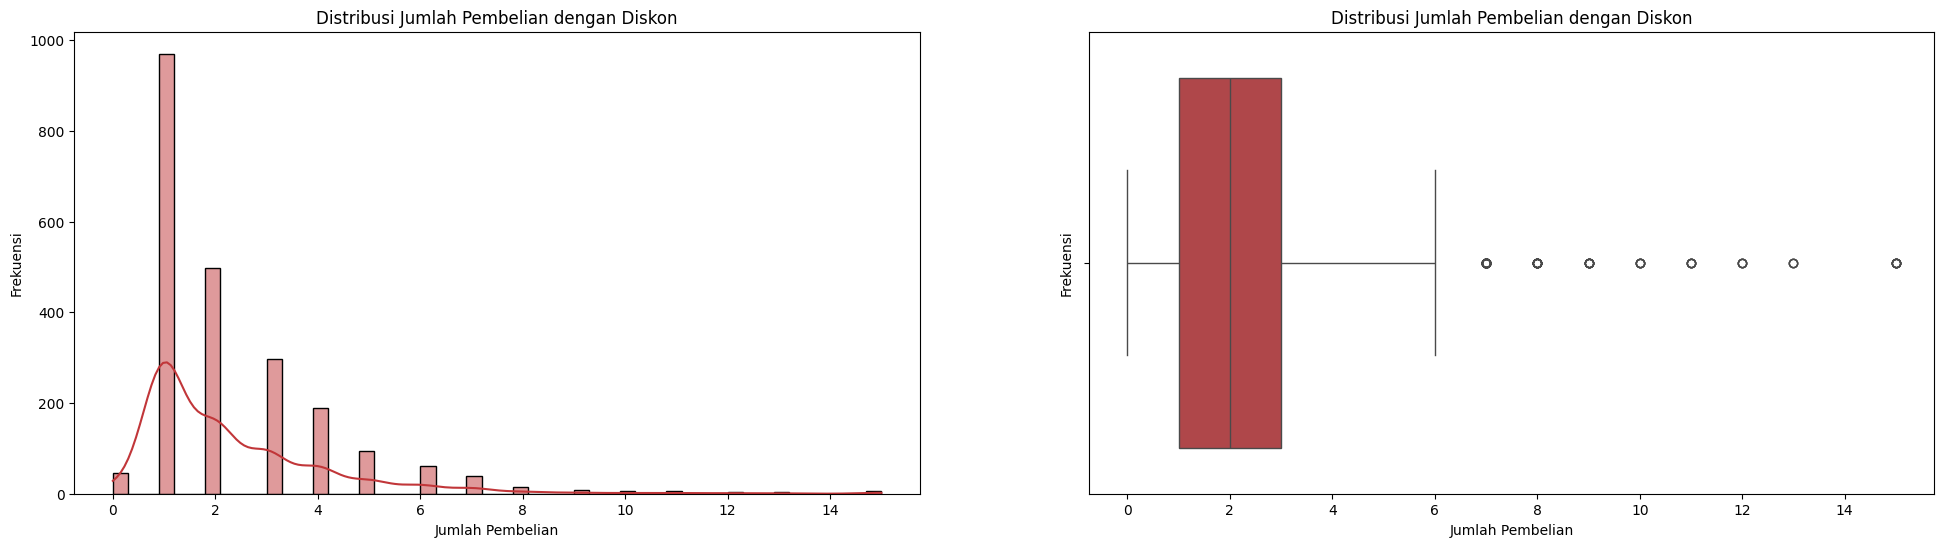

In [66]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.title('Distribusi Jumlah Pembelian dengan Diskon')
sns.histplot(df, x='NumDealsPurchases', kde=True)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.title('Distribusi Jumlah Pembelian dengan Diskon')
sns.boxplot(df, x='NumDealsPurchases')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Frekuensi')

plt.show()

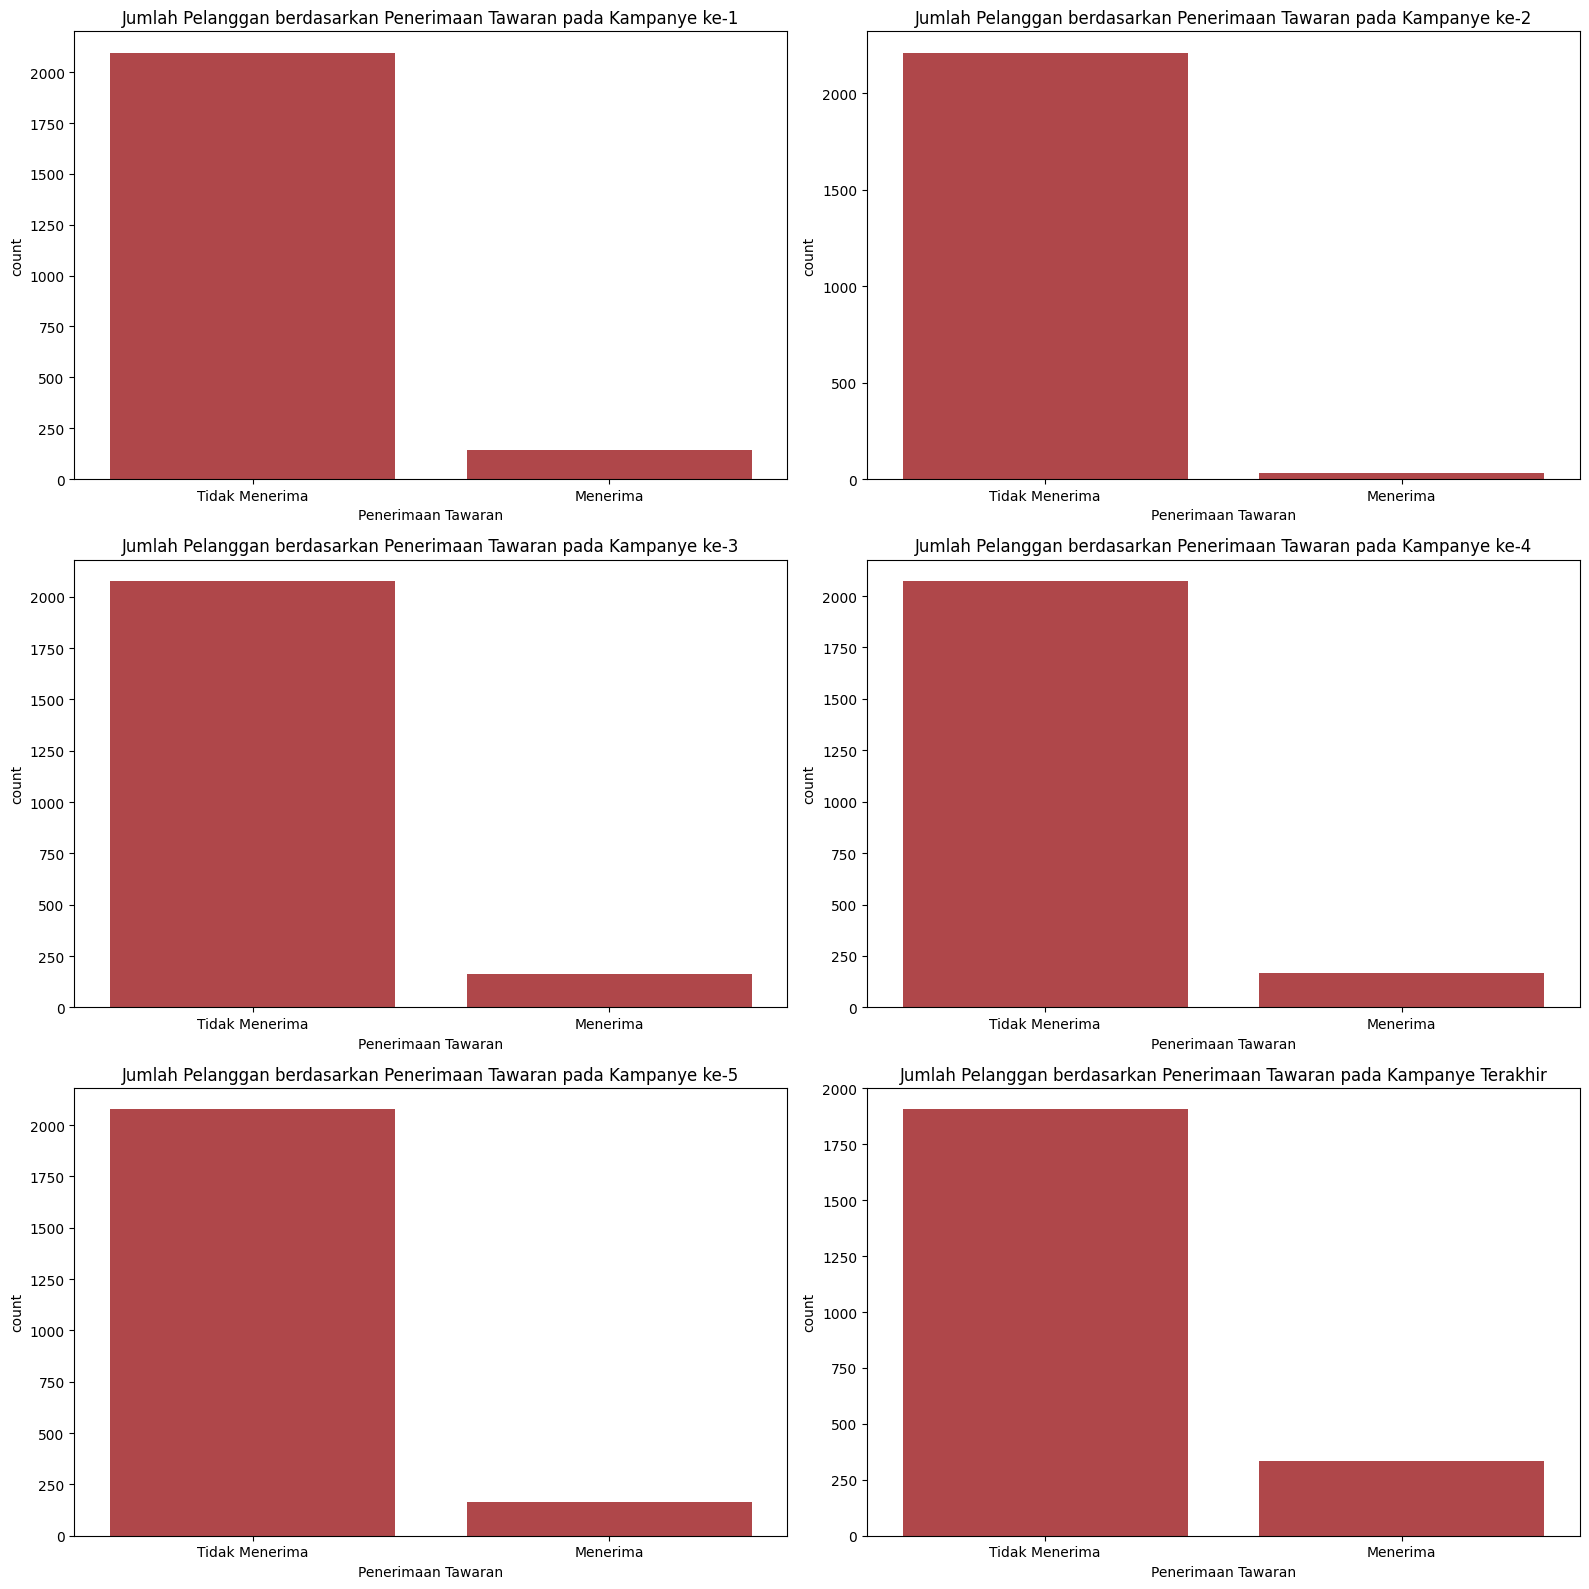

In [67]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

viz_title = [
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye ke-1',
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye ke-2',
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye ke-3',
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye ke-4',
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye ke-5',
    'Jumlah Pelanggan berdasarkan Penerimaan Tawaran pada Kampanye Terakhir',
    ]

# Looping untuk membuat countplot di setiap subplot
for i, column in enumerate(columns2):
    row = i // 2  # Menentukan baris
    col = i % 2   # Menentukan kolom
    ax = axs[row, col]
    
    # Plot countplot untuk kategori yang sesuai
    sns.countplot(df, x=column, ax=ax)
    ax.set_title(viz_title[i])
    ax.set_xlabel('Penerimaan Tawaran')
    ax.set_xticklabels(['Tidak Menerima', 'Menerima'])

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

**Hasil Observasi**
- Rentang jumlah pembelian dengan diskon ada dalam rentang 0 hingga 15.
- Mayoritas pelanggan melakukan pembelian dengan diskon sebanyak 1 kali.
- Mayoritas jumlah yang dibelanjakan pelanggan untuk produk tertentu dalam 2 tahun terakhir sebagai berikut.
- Data pada kolom NumDealsPurchases tidak terdistribusi normal dan memiliki pencilan.
- Performa penerimaan tawaran cukup buruk. Mayoritas pelanggan tidak menerima penawaran yang diberikan dari kampanye ke-1 hingga terakhir.

#### **4. Purchase Channels**
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

In [68]:
# Mendefinisikan kolom pada kategori Product Spending
columns3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
columns3

['NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [69]:
# Memeriksa nilai unik yang ada pada kolom
for column in columns3:
    print(f'- {column}: {df[column].unique()}\n')

- NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]

- NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]

- NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]

- NumWebVisitsMonth: [ 7  5  4  6  8  9 20  2  3  1 10  0 14 19 17 13]



In [70]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
for column in columns3:
    print(f'- {df[column].value_counts()}\n')

- NumWebPurchases
2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: count, dtype: int64

- NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

- NumStorePurchases
3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: count, dtype: int64

- NumWebVisitsMonth
7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: count, dtype: int64



In [71]:
# Memeriksa statistik deskriptif pada kolom
for column in columns3:
    print(f'- {column}:\n{df[column].describe()}\n')

- NumWebPurchases:
count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

- NumCatalogPurchases:
count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

- NumStorePurchases:
count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

- NumWebVisitsMonth:
count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64



In [72]:
# Memeriksa modus dari nilai unik yang ada pada kolom
for column in columns3:
    print(f'Modus \'{column}\':', df[column].mode()[0])

Modus 'NumWebPurchases': 2
Modus 'NumCatalogPurchases': 0
Modus 'NumStorePurchases': 3
Modus 'NumWebVisitsMonth': 7


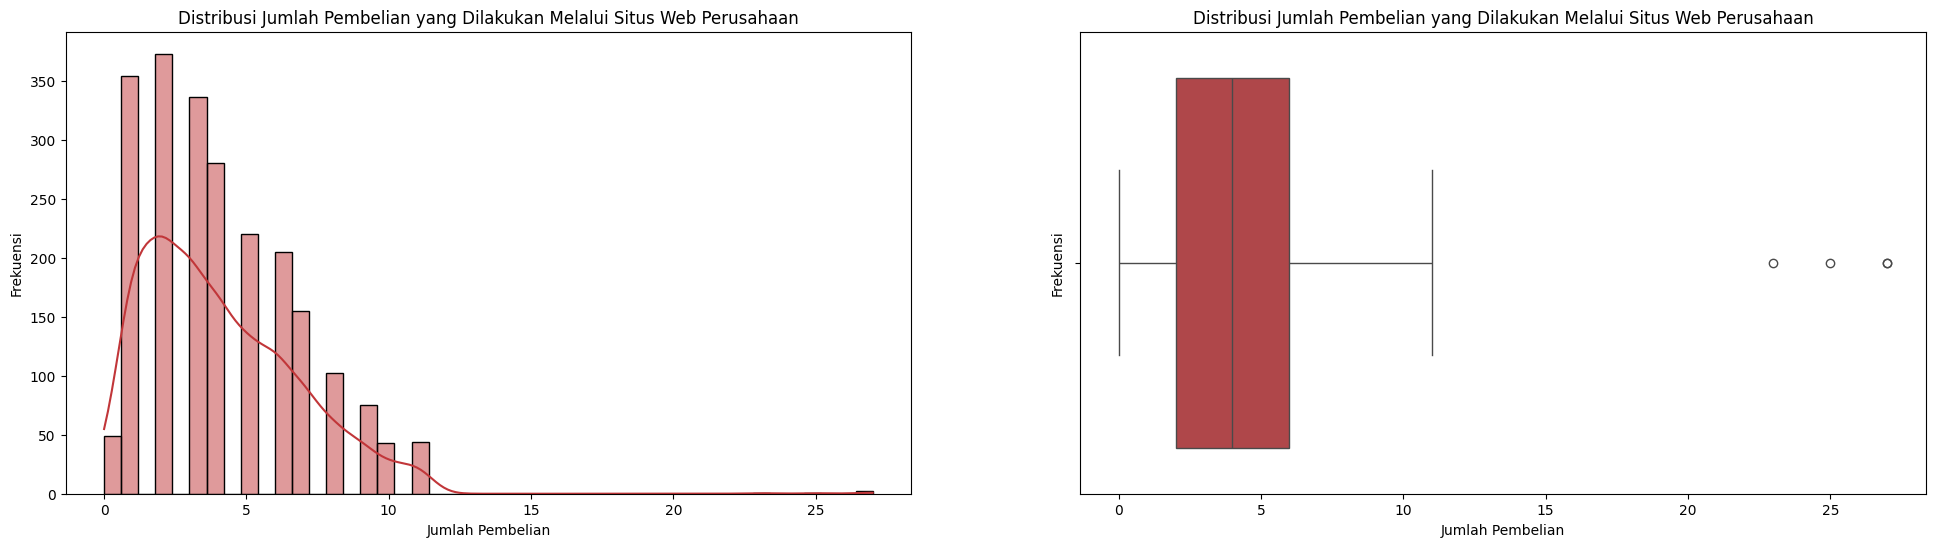

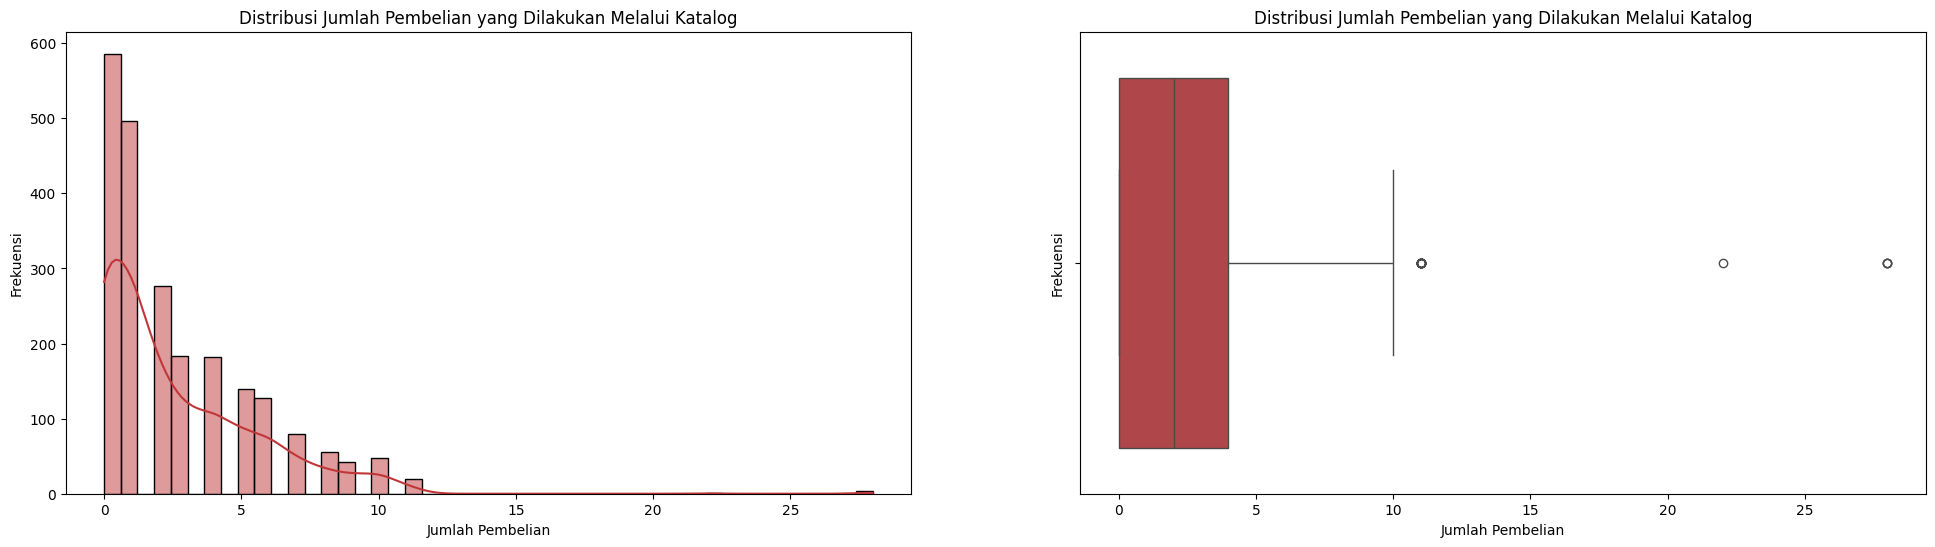

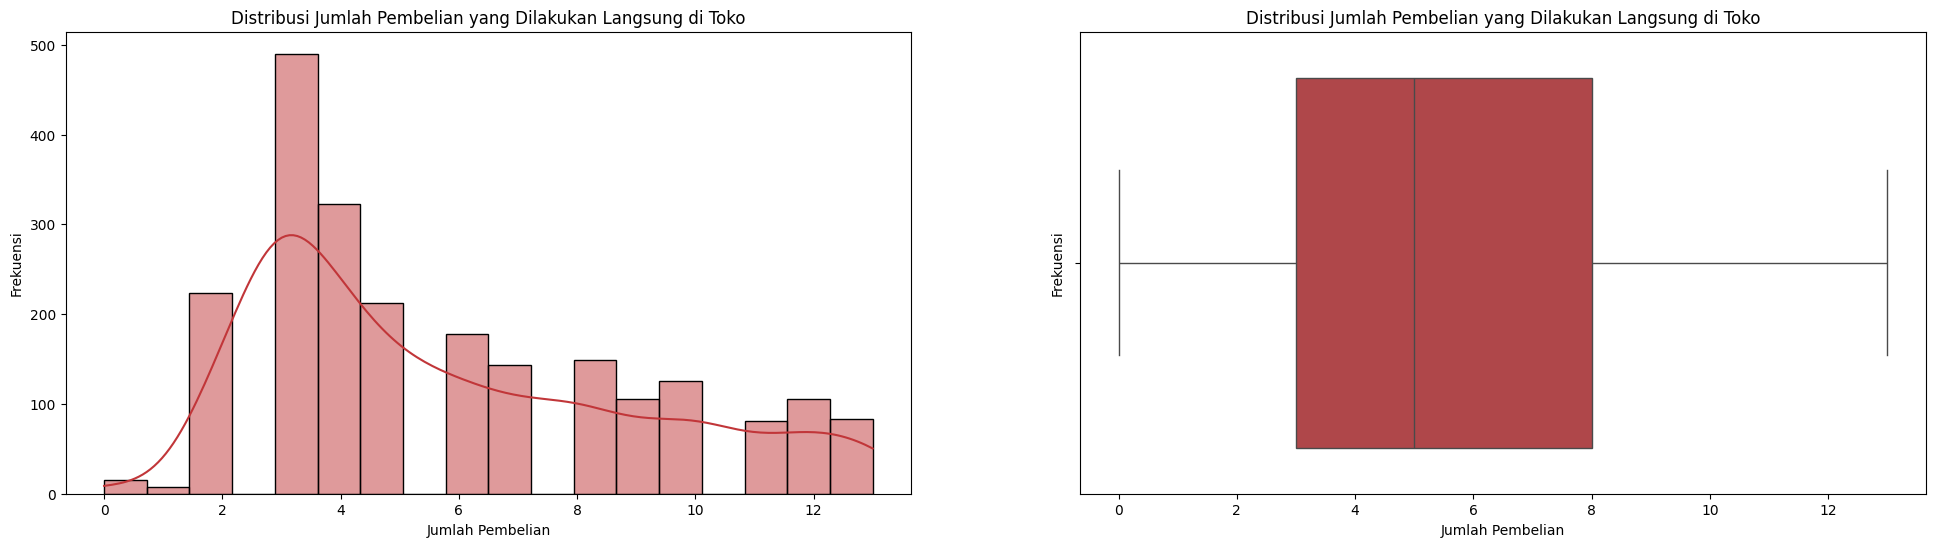

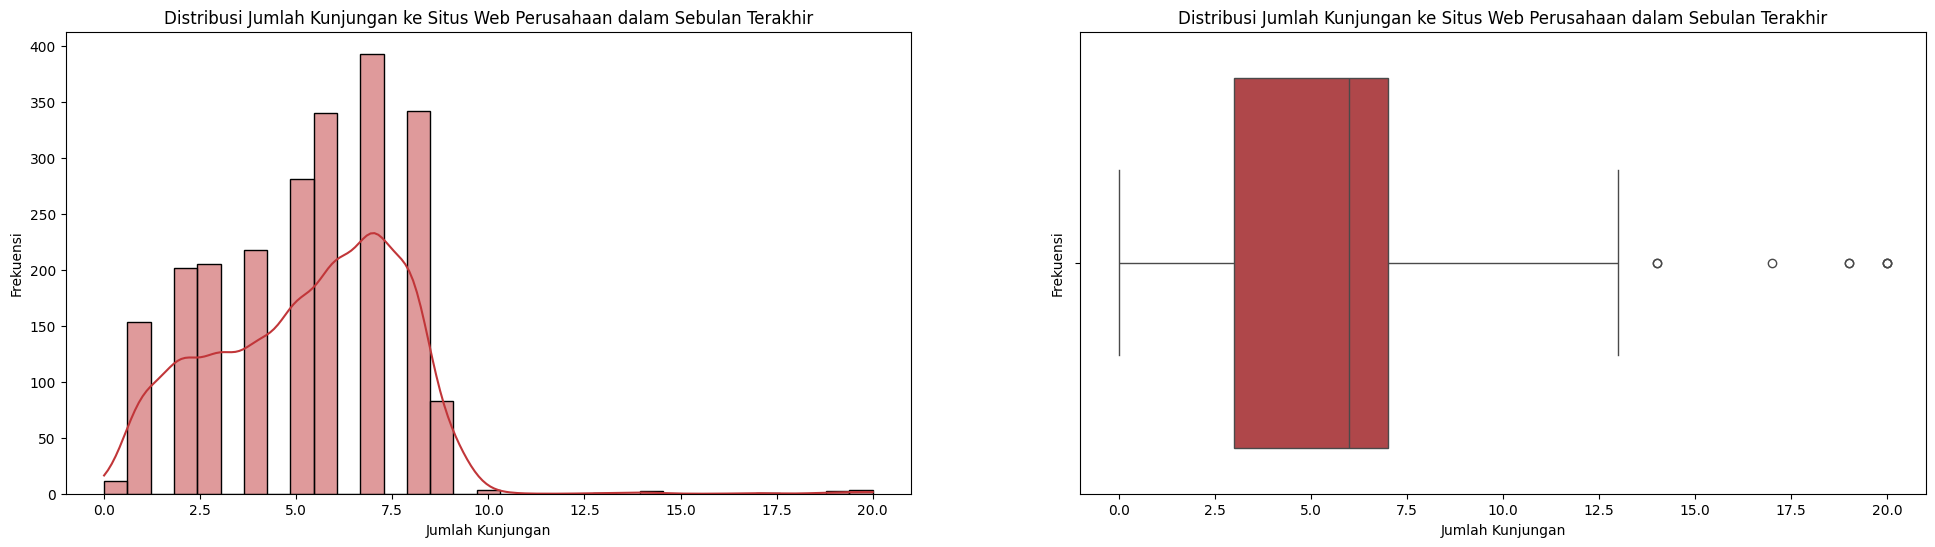

In [73]:
viz_title = [
    'Distribusi Jumlah Pembelian yang Dilakukan Melalui Situs Web Perusahaan',
    'Distribusi Jumlah Pembelian yang Dilakukan Melalui Katalog',
    'Distribusi Jumlah Pembelian yang Dilakukan Langsung di Toko',
    'Distribusi Jumlah Kunjungan ke Situs Web Perusahaan dalam Sebulan Terakhir',
    ]
viz_xlabel = [
    'Jumlah Pembelian',
    'Jumlah Pembelian',
    'Jumlah Pembelian',
    'Jumlah Kunjungan',
]


for i, column in enumerate(columns3):
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.title(viz_title[i])
    sns.histplot(df, x=column, kde=True)
    plt.xlabel(viz_xlabel[i])
    plt.ylabel('Frekuensi')

    plt.subplot(1, 2, 2)
    plt.title(viz_title[i])
    sns.boxplot(df, x=column)
    plt.xlabel(viz_xlabel[i])
    plt.ylabel('Frekuensi')

    plt.show()

**Hasil Observasi**
- Rentang jumlah pembelian yang dilakukan melalui saluran tertentu sebagai berikut.
    - web: 0 hingga 27 kali pembelian.
    - katalog: 0 hingga 28 kali pembelian.
    - langsung di toko: 0 hingga 13 kali pembelian.

- Rentang jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir ada dalam rentang 0 hingga 20 kali.

- Mayoritas jumlah pembelian pelanggan yang dilakukan melalui saluran tertentu sebagai berikut.
    - web: 2 kali pembelian.
    - katalog: 0 kali pembelian.  Ini berarti mayoritas pelanggan tidak membeli melalu saluran pembelian ini.
    - langsung di toko: 3 kali pembelian.

- Mayoritas pelanggan melakukan kunjungan ke situs web perusahaan sebanyak 7 kali dalam sebulan terakhir.

- Data pada kolom NumWebPurchases, NumCatalogPurchases, NumStorePurchases, dan NumWebVisitsMonth tidak terdistribusi normal dan memiliki pencilan.

#### **5. Kolom Lain**

- Z_CostContact
- Z_Revenue

In [74]:
# Memeriksa nilai unik yang ada pada kolom
for column in ['Z_CostContact', 'Z_Revenue']:
    print(f'{column}: {df[column].unique()}')

Z_CostContact: [3]
Z_Revenue: [11]


In [75]:
# Memeriksa nilai unik yang ada pada kolom dan jumlah nilai unik tersebut
# Memeriksa nilai unik yang ada pada kolom
for column in ['Z_CostContact', 'Z_Revenue']:
    print(f'{df[column].value_counts()}\n')

Z_CostContact
3    2240
Name: count, dtype: int64

Z_Revenue
11    2240
Name: count, dtype: int64



**Hasil Observasi**
- Nilai pada kolom Z_CostContact dan Z_Revenue ini adalah nilai konstan yang sama untuk setiap baris. Nilai pada kolom ini tidak akan berkontribusi pada analisis data selanjutnya. Pada analisi data ini, kolom Z_CostContact dan Z_Revenue adalah kolom-kolom yang tidak relevan.

## **2.2 Data Cleaning**

### **2.2.1 Penanganan Format dan Tipe Data**

#### **ID**

- ID digunakan sebagai identifikasi unik pelanggan sehingga nilai pada kolom ID harus unik. Berdasarkan observasi pada Data Understanding, kolom ID sudah bernilai unik.
- Berdasarkan observasi pada Data Understanding, kolom ID memili format yang berbeda. Format ini akan diseragamkan dengan ketentuan berikut.
    - Tipe data ID yang sebelumnya numerik akan diubah menjadi object. Ini dilakukan karena ID hanya berfungsi sebagai identifikasi unik pelanggan.
    - ID dengan panjang kurang dari 5 akan dibuat menjadi 5 dengan menyisipkan 0 di sebelah kiri hingga panjang karakter menjadi 5. Contoh: 0 menjadi 00000.

In [76]:
df['ID'] = df['ID'].astype('str').str.zfill(5)
df['ID'].head()

0    05524
1    02174
2    04141
3    06182
4    05324
Name: ID, dtype: object

#### **Dt_Customer**

Berdasarkan observasi pada Data Understanding, kolom Dt_Customer memiliki tipe data object. Tipe data ini dapat diubah menjadi tipe data yang lebih sesuai, yaitu tipe data waktu yang menunjukkan tanggal, bulan, dan tahun. Tipe data yang Dt_Customer yang sebelumnya object akan diubah menjadi datetime.


In [77]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer']


0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

### **2.2.2 Penanganan Data yang Hilang**

Berdasarkan observasi pada Data Understanding, data hilang terdapat pada kolom Income sebanyak 24 baris. Kolom Income ini memiliki korelasi paling kuat dengan kolom NumCatalogPurchases. Korelasi yang terjadi antara kolom Income dan NumCatalogPurchases adalah korelasi positif moderat. Jika pendapatan tahunan rumah tangga pelanggan semakin tinggi, maka jumlah pembelian yang dilakukan menggunakan katalog oleh pelanggan semakin banyak. Oleh karena itu, nilai Income yang hilang akan diisi berdasarkan kolom NumCatalogPurchases. Selain itu, distribusi data Income dan NumCatalogPurchases adalah distribusi tidak normal. Oleh karena itu, nilai Income yang hilang akan diganti dengan nilai median dari Income yang dikelompokkan berdasarkan nilai unik NumCatalogPurchases.

In [78]:
# Nilai median dari Income yang dikelompokkan berdasarkan nilai unik NumCatalogPurchases
df.groupby('NumCatalogPurchases')['Income'].median()

NumCatalogPurchases
0      31904.0
1      41197.5
2      55185.0
3      64258.0
4      67369.0
5      69930.0
6      75739.5
7      78093.0
8      71853.0
9      79416.0
10     77766.0
11     79800.0
22    157243.0
28    157146.0
Name: Income, dtype: float64

In [79]:
# Mengisi data Income yang hilang menggunakan milai median dari Income yang dikelompokkan berdasarkan nilai unik NumCatalogPurchases
df['Income'] = df.groupby('NumCatalogPurchases')['Income'].transform(lambda x: x.fillna(x.median()))
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [80]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### **2.2.3 Penanganan Data Duplikat**

Berdasarkan observasi pada Data Understanding, tidak ada baris yang duplikat sehingga tidak ada penanganan untuk data duplikat.

### **2.2.4 Penanganan Data Pencilan**

Pada bagian Data Understanding, kenormalan dari ditribusi serta nilai pencilan pada kolom Dt_Customer belum diperiksa karena masalah tipe data. Pada bagian ini, distribusi dari kolom Dt_Customer ini akan diperiksa pada bagian ini.

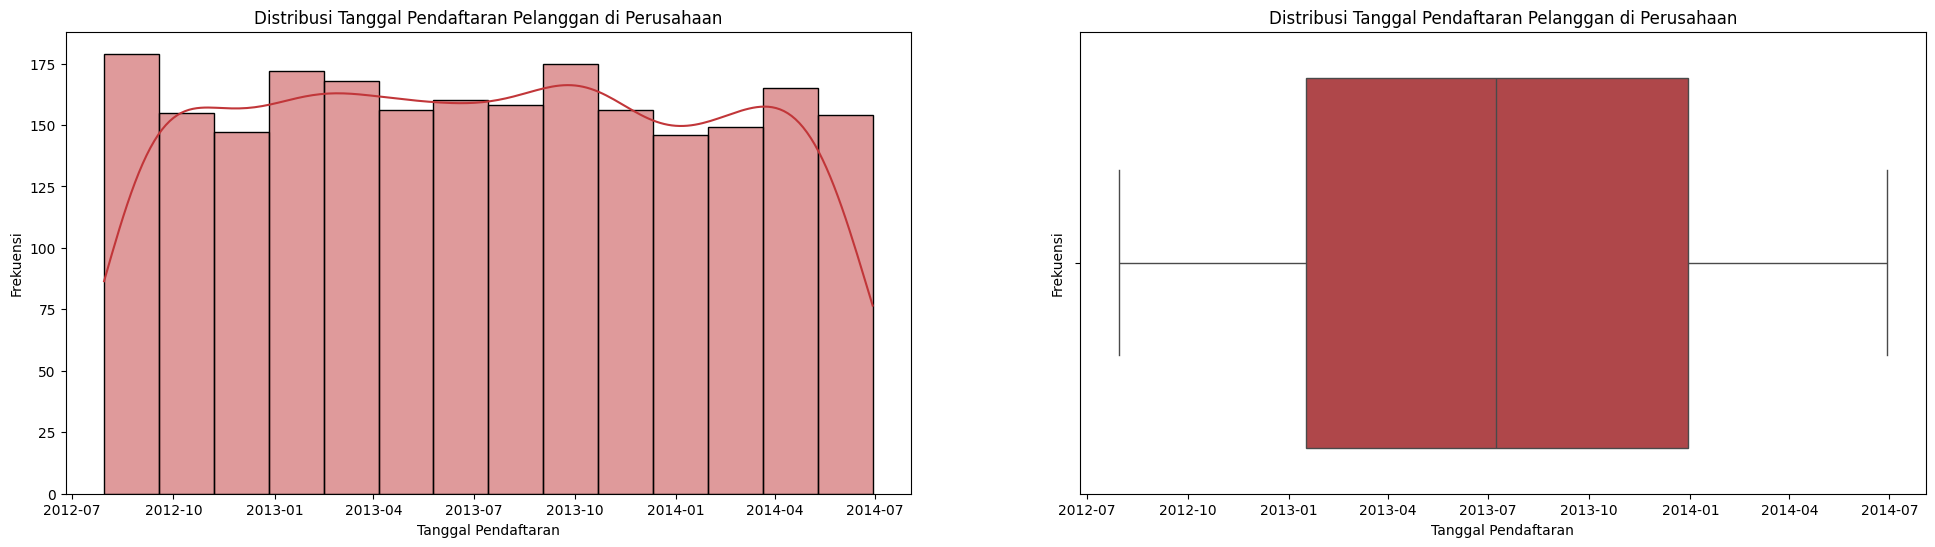

In [81]:
plt.figure(figsize=(24, 6))
# Tanggal pendaftaran pelanggan di perusahaan
plt.subplot(1, 2, 1)
plt.title('Distribusi Tanggal Pendaftaran Pelanggan di Perusahaan')
sns.histplot(df, x='Dt_Customer', kde=True)
plt.xlabel('Tanggal Pendaftaran')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.title('Distribusi Tanggal Pendaftaran Pelanggan di Perusahaan')
sns.boxplot(df, x='Dt_Customer')
plt.xlabel('Tanggal Pendaftaran')
plt.ylabel('Frekuensi')

plt.show()

**Hasil Observasi**
- Data tidak terdistribusi normal
- Pencilan yang bernilai ekstrim tidak ada

Selain kolom di atas, berdasarkan observasi pada Data Understanding, berikut merupakan kolom lain yang memiliki pencilan.

#### **Year**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom Year_Birth, yaitu nilai yang berkisar kurang dari 1910.

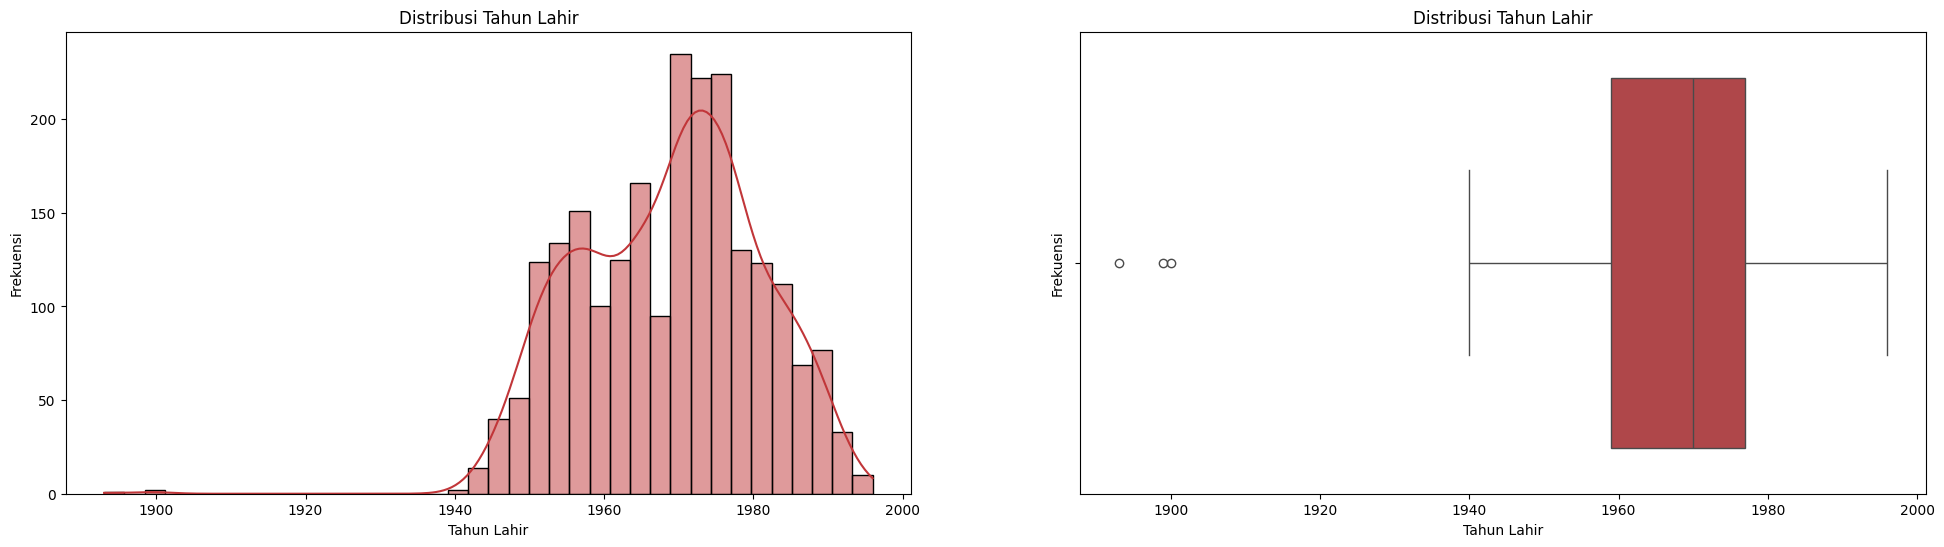

In [82]:
df[df['Year_Birth'] < 1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,07829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,01150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [83]:
print(f'Banyak data, {len(df[df['Year_Birth'] < 1910]) / len(df) * 100}')

Banyak data, 0.13392857142857142


Banyak nilai pencilan ini cukup kecil, yaitu 3 atau kurang dari 0.15% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [84]:
df = df[~(df['Year_Birth'] < 1910)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **Income**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom Income, yaitu nilai yang berkisar lebih dari 600000.

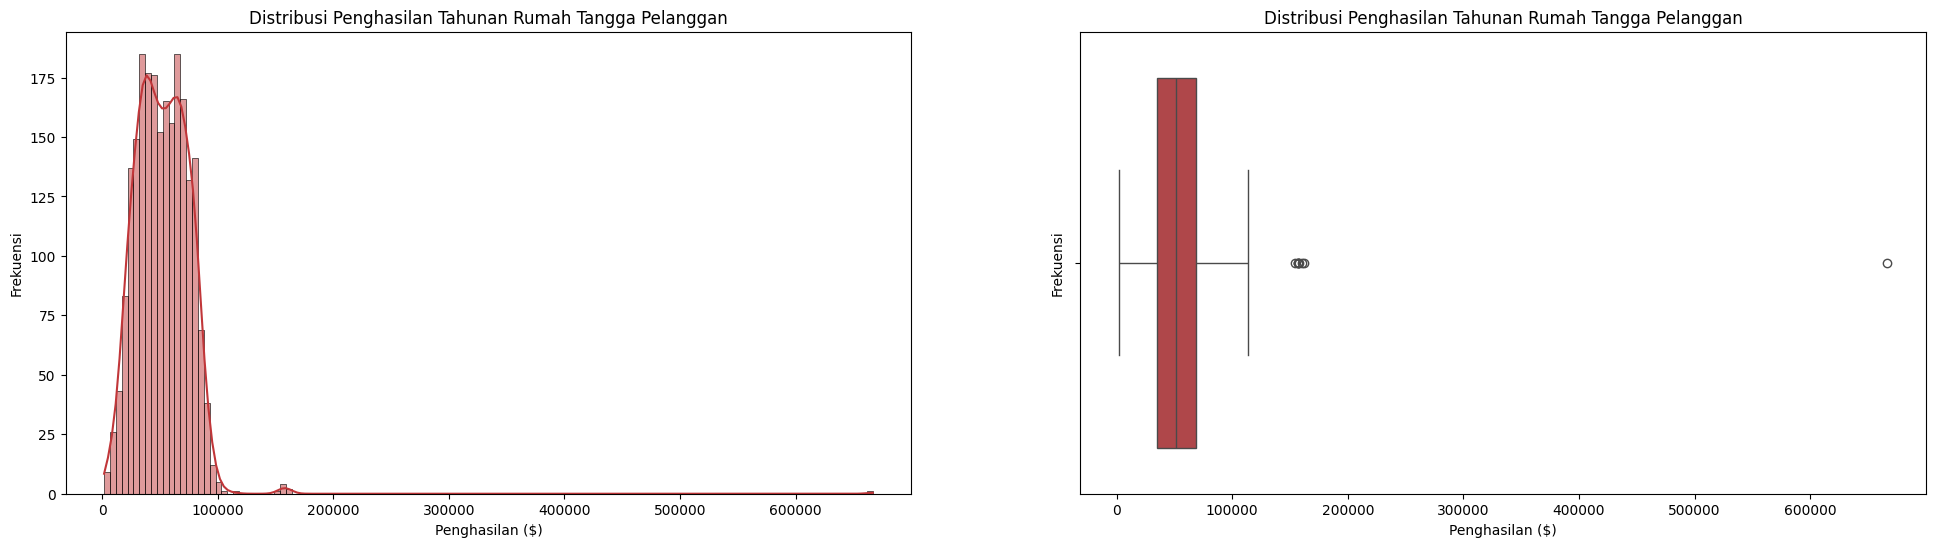

In [85]:
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,09432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [86]:
print(f'Banyak data, {len(df[df['Income'] > 600000]) / len(df) * 100}')

Banyak data, 0.044702726866338846


Banyak nilai pencilan ini relatif kecil, yaitu 1 atau kurang dari 0.05% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya sangat ekstrim dan jumlahnya relatif sedikit.

In [87]:
df = df[~(df['Income'] > 600000)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **MntWines**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom MntWines, yaitu nilai yang berkisar lebih dari 1400.

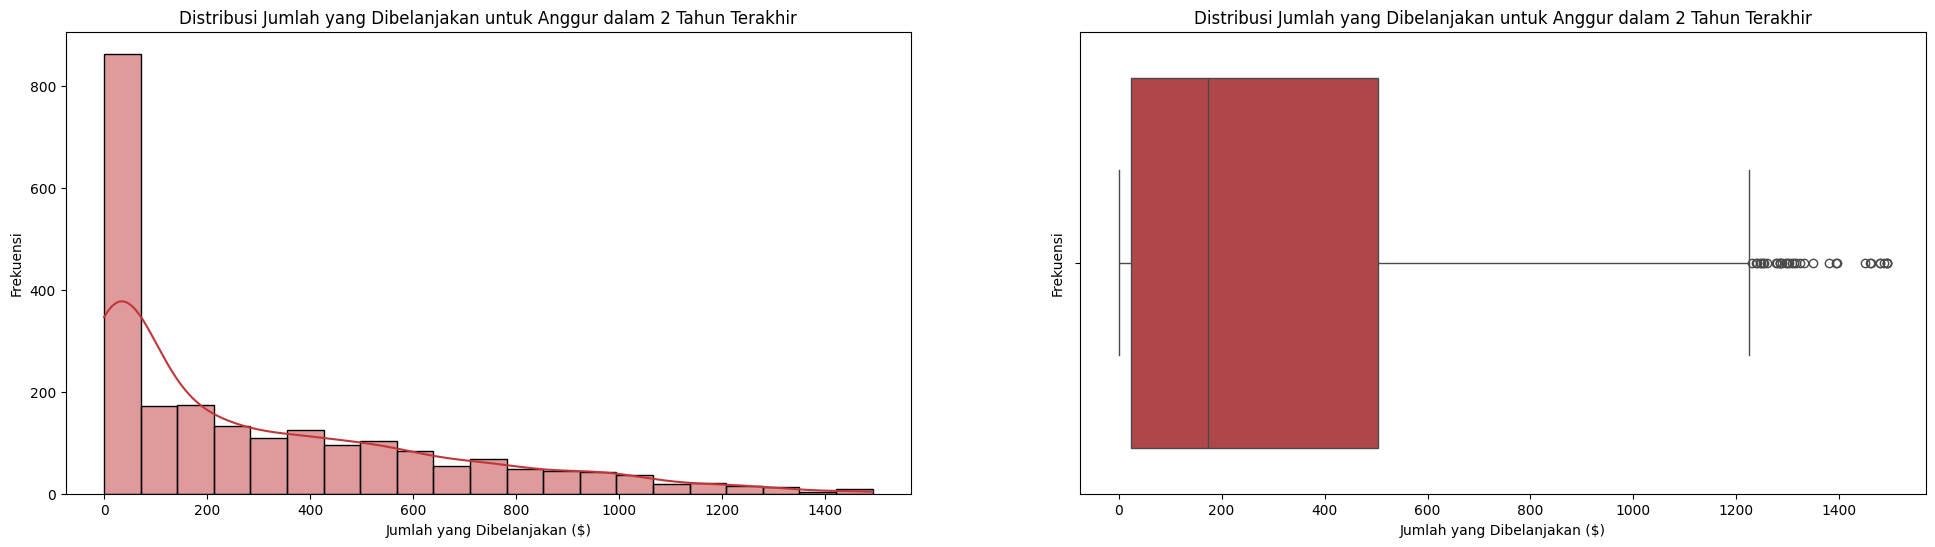

In [88]:
df[df['MntWines'] > 1400]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
543,05547,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,19,403,0,19,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1
559,03174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
824,05536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
917,08362,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,19,403,0,19,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1
1488,09743,1955,Graduation,Married,76998.0,0,1,2013-01-11,85,1449,89,161,69,35,107,2,11,8,8,6,0,0,1,0,0,0,3,11,0
1641,01665,1964,PhD,Divorced,64140.0,0,2,2013-09-23,71,1459,0,61,0,15,215,5,2,5,6,5,1,0,1,0,1,0,3,11,1
1749,00737,1949,PhD,Married,80360.0,0,0,2013-03-03,56,1493,86,454,112,43,43,2,4,4,5,2,0,1,1,1,0,0,3,11,0
1961,03009,1962,PhD,Widow,71670.0,0,0,2013-07-09,8,1462,16,128,0,0,160,1,5,3,6,6,0,1,1,0,1,0,3,11,1
2098,01103,1976,Master,Married,81929.0,1,0,2012-09-29,60,1486,55,278,49,0,185,2,4,4,10,6,1,0,1,0,0,0,3,11,1


In [89]:
print(f'Banyak data, {len(df[df['MntWines'] > 1400]) / len(df) * 100}')

Banyak data, 0.40250447227191416


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.5% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [90]:
df = df[~(df['MntWines'] > 1400)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **MntFruits**
Berdasarkan observasi pada Data Understanding, terdapat pencilan pada kolom MntFruits, tapi tidak ada pencilan yang tampak terpisah jauh pada kolom ini. Oleh karena itu, pencilan pada kolom MntFruits tidak ada yang dibuang.

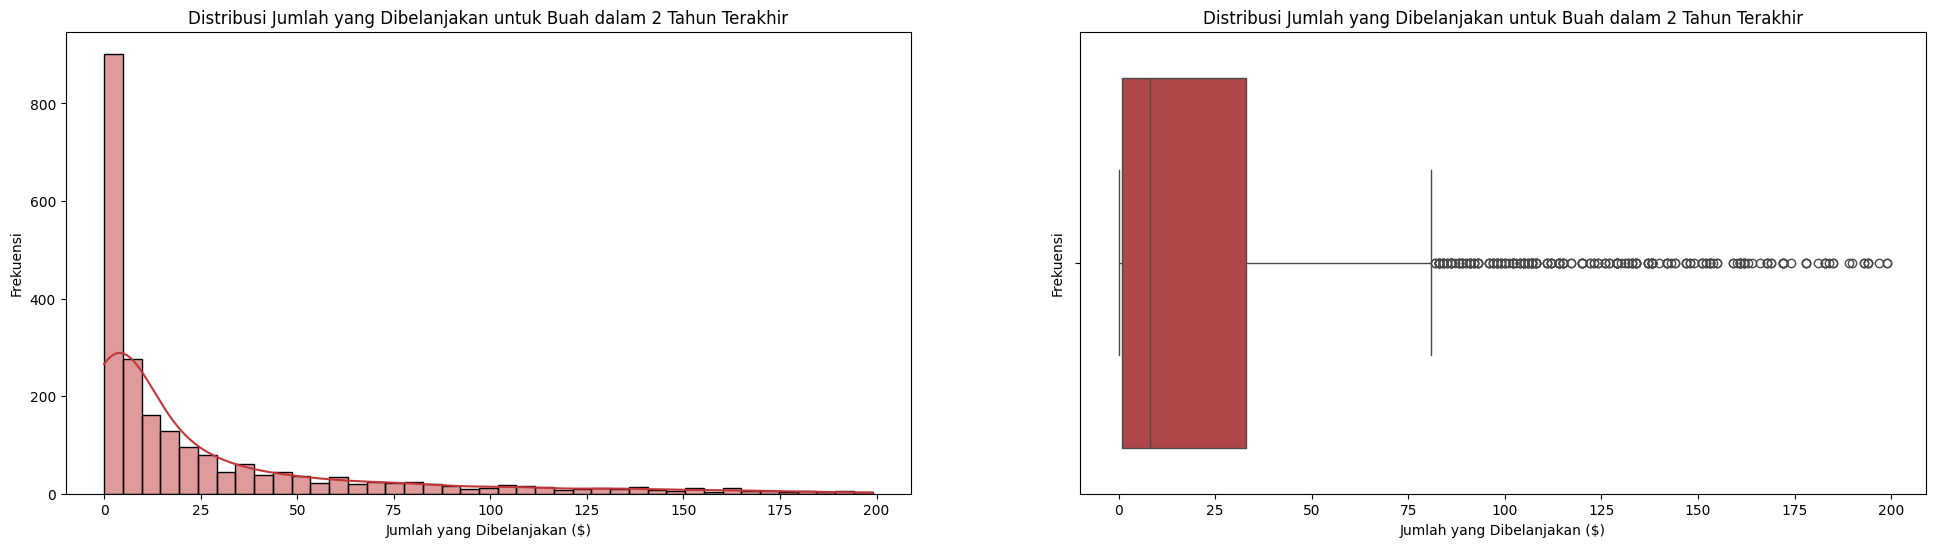

#### **MntMeatProducts**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom MntMeatProducts, yaitu nilai yang berkisar lebih dari 1500.

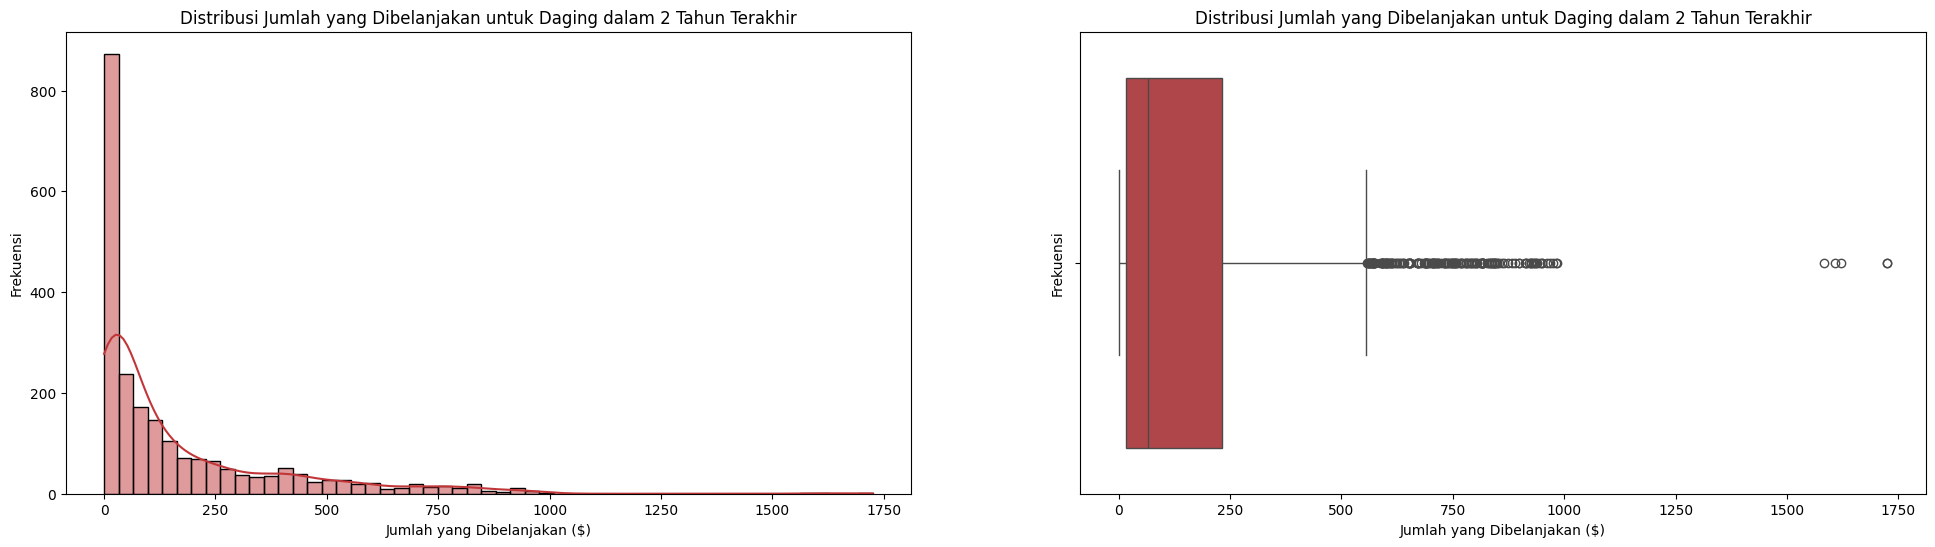

In [91]:
df[df['MntMeatProducts'] > 1500]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,05376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0
164,08475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
687,01501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1653,04931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2228,08720,1978,2n Cycle,Together,31904.0,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0


In [92]:
print(f'Banyak data, {len(df[df['MntMeatProducts'] > 1500]) / len(df) * 100}')

Banyak data, 0.224517287831163


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.25% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [93]:
df = df[~(df['MntMeatProducts'] > 1500)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **MntFishProducts**
Berdasarkan observasi pada Data Understanding, terdapat pencilan pada kolom MntFishProducts, tapi tidak ada pencilan yang tampak terpisah jauh pada kolom ini. Oleh karena itu, pencilan pada kolom MntFishProducts tidak ada yang dibuang.

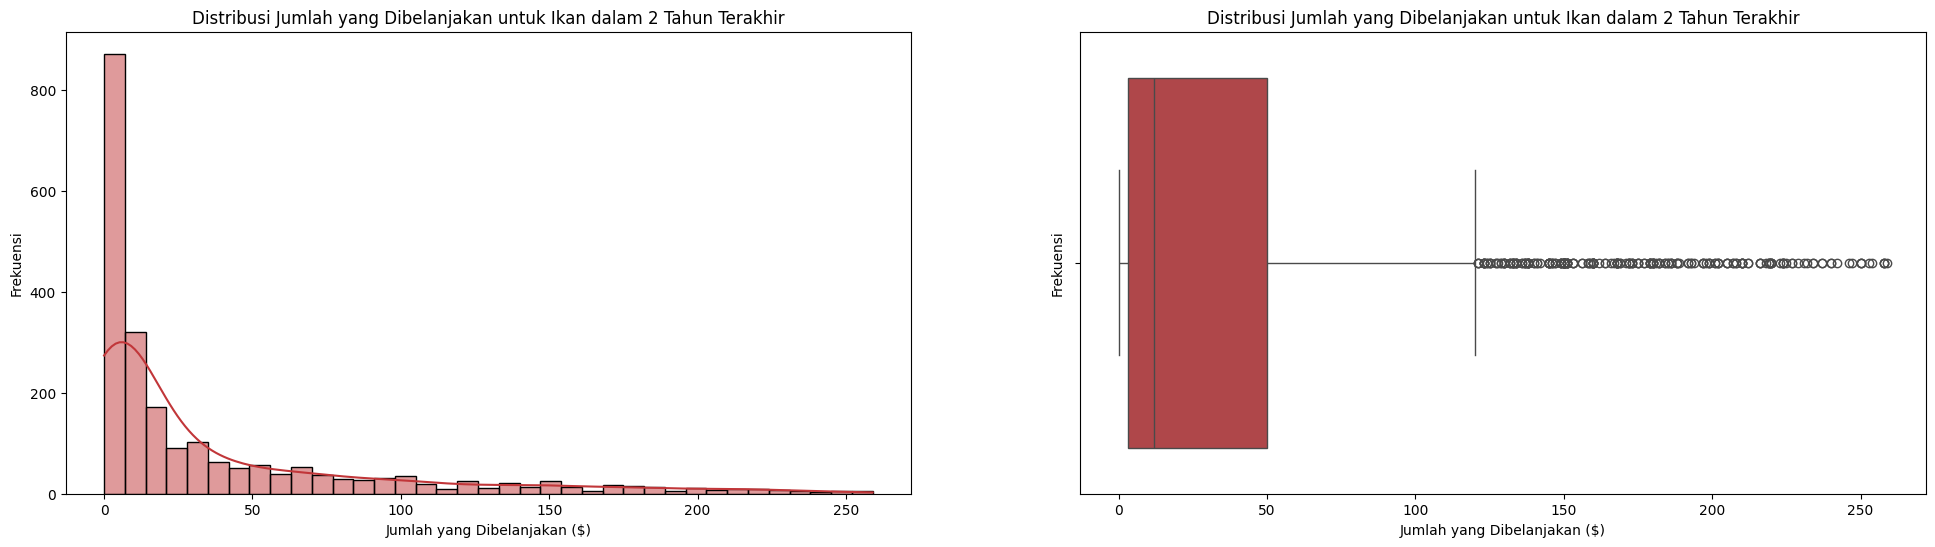

#### **MntSweetProducts**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom MntSweetProducts, yaitu nilai yang berkisar lebih dari 250.

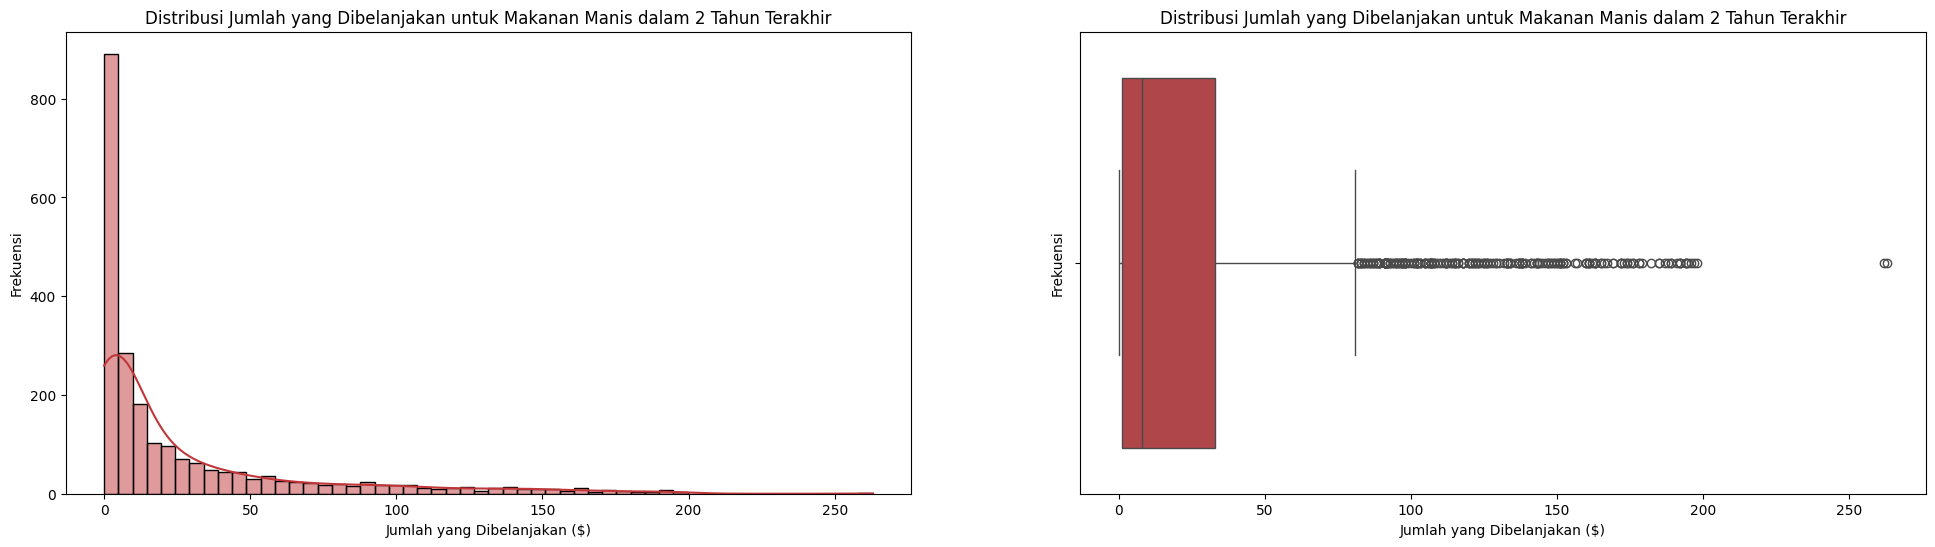

In [94]:
df[df['MntSweetProducts'] > 250]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
27,05255,1986,Graduation,Single,31904.0,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
1898,04619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0


In [95]:
print(f'Banyak data, {len(df[df['MntSweetProducts'] > 250]) / len(df) * 100}')

Banyak data, 0.09000900090009001


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.3% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [96]:
df = df[~(df['MntSweetProducts'] > 250)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **MntGoldProds**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom MntGoldProds, yaitu nilai yang berkisar lebih dari 300.

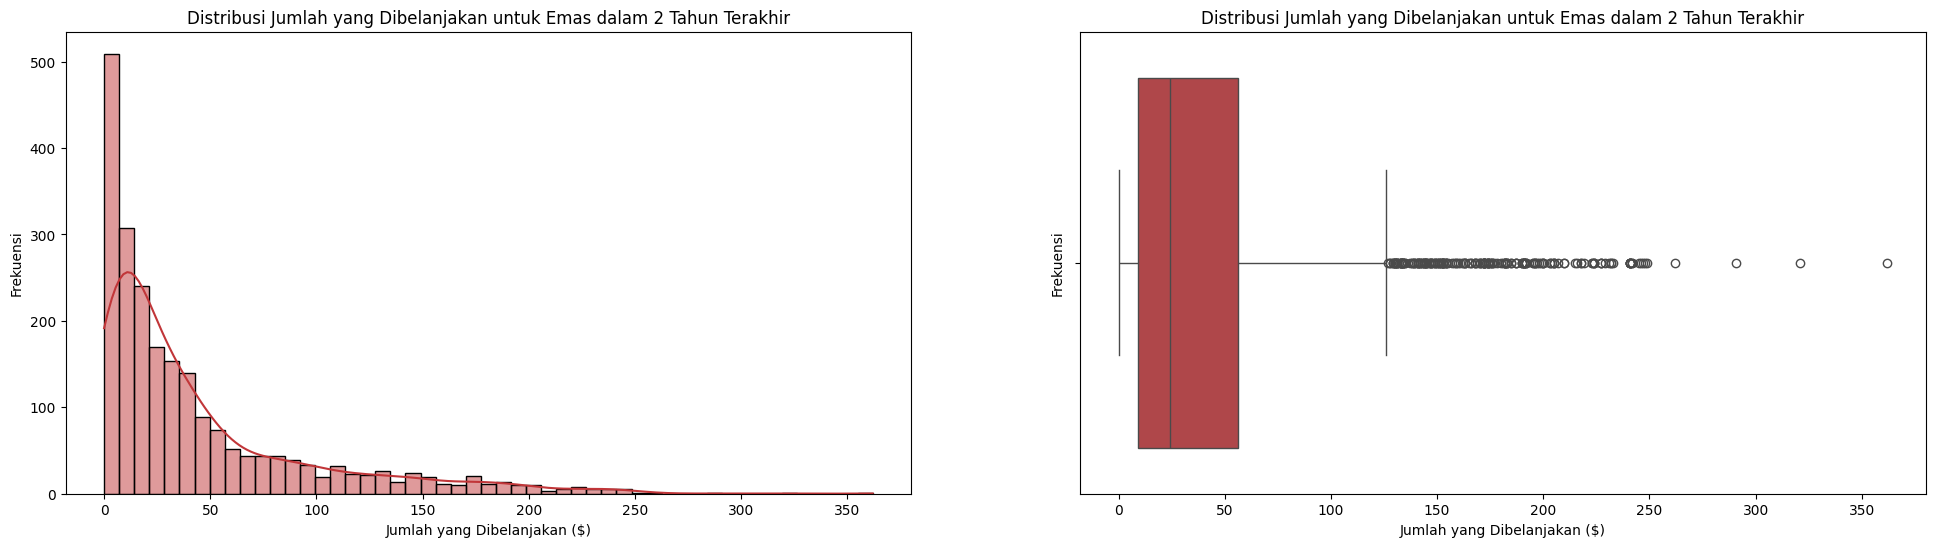

In [97]:
df[df['MntGoldProds'] > 300]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0


In [98]:
print(f'Banyak data, {len(df[df['MntGoldProds'] > 300]) / len(df) * 100}')

Banyak data, 0.04504504504504504


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.1% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [99]:
df = df[~(df['MntGoldProds'] > 300)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **NumDealsPurchases**
Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom NumDealsPurchases, yaitu nilai yang berkisar lebih dari 14.

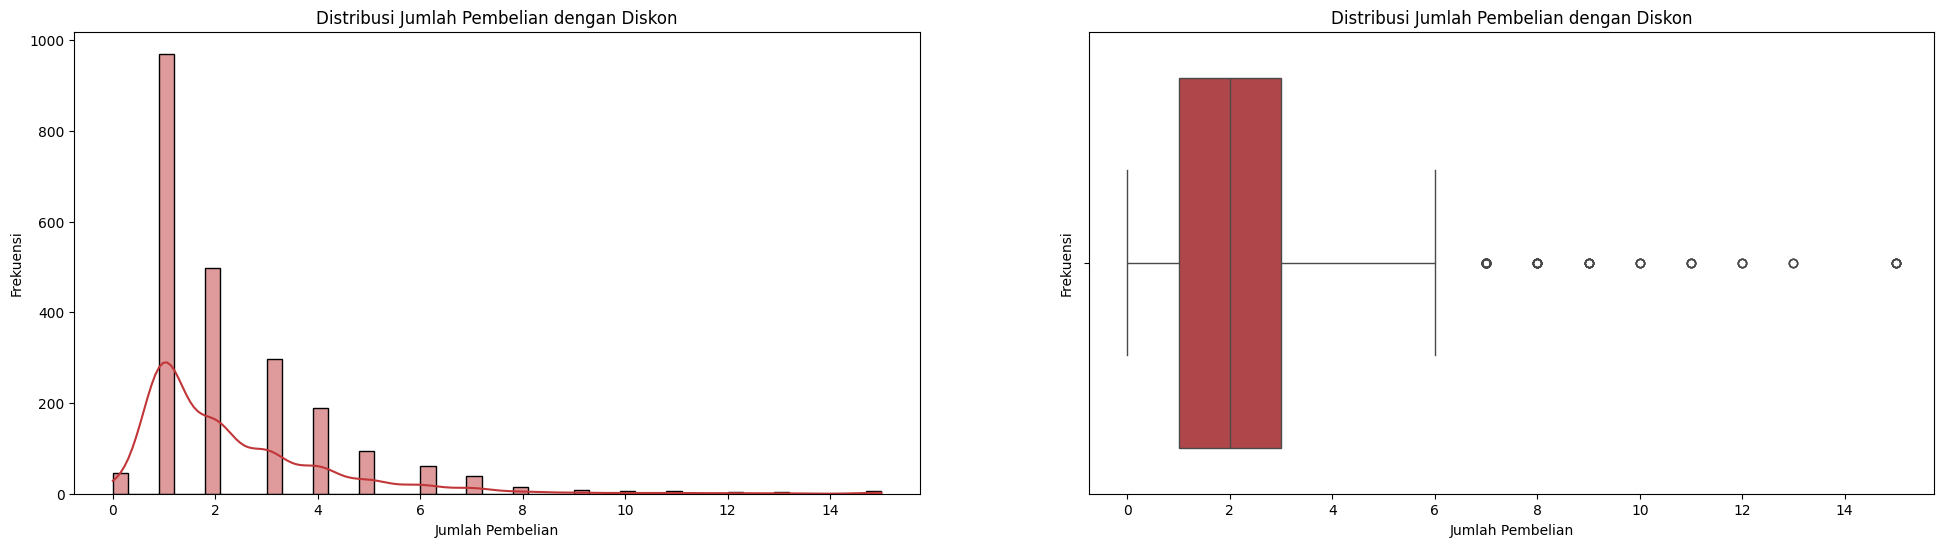

In [100]:
df[df['NumDealsPurchases'] > 14]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
432,00238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,47,181,149,95,95,15,9,6,9,7,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0
1245,06862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0
1846,09931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0


In [101]:
print(f'Banyak data, {len(df[df['NumDealsPurchases'] > 14]) / len(df) * 100}')

Banyak data, 0.18026137899954936


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.2% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [102]:
df = df[~(df['NumDealsPurchases'] > 14)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **NumWebPurchases**

Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom NumWebPurchases, yaitu nilai yang berkisar lebih dari 20.

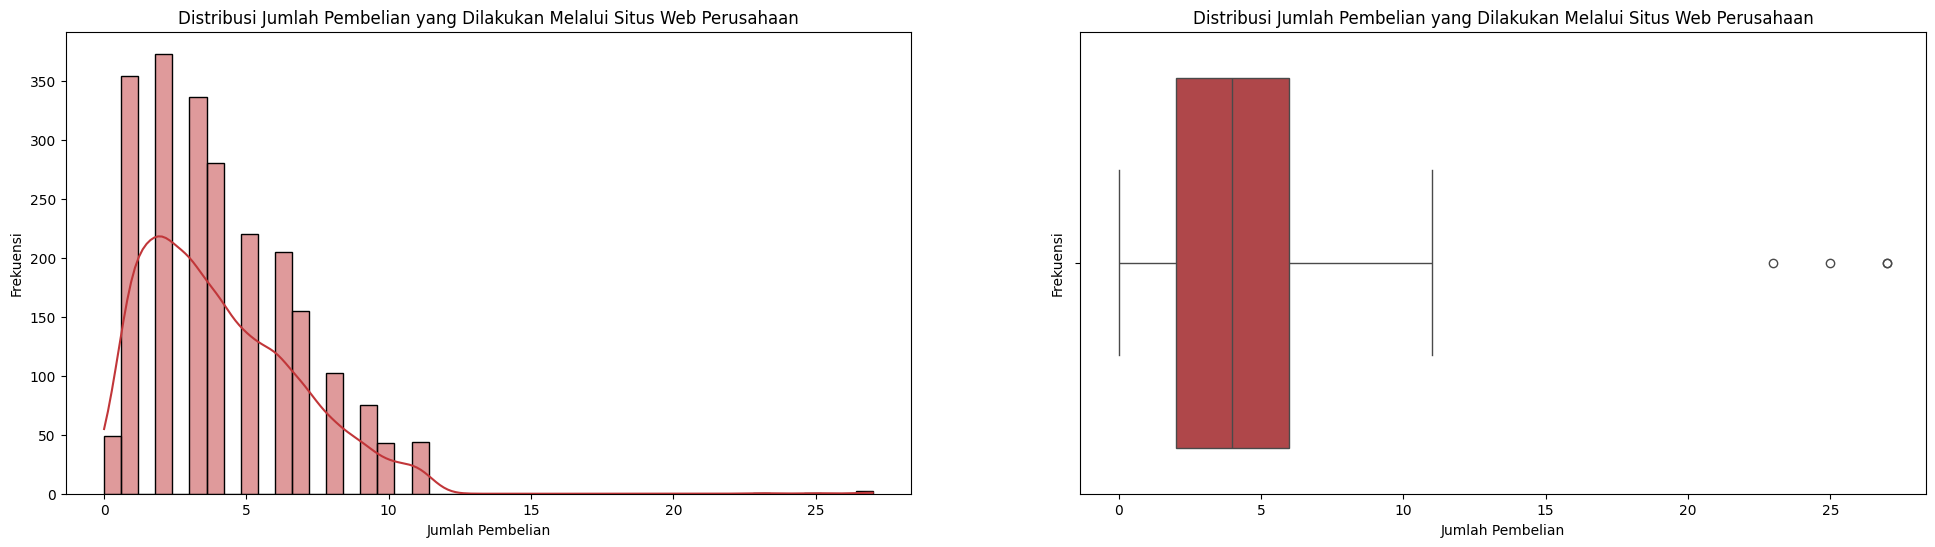

In [103]:
df[df['NumWebPurchases'] > 20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1806,06237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0


In [104]:
print(f'Banyak data, {len(df[df['NumWebPurchases'] > 14]) / len(df) * 100}')

Banyak data, 0.04514672686230248


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.1% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [105]:
df = df[~(df['NumWebPurchases'] > 14)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **NumCatalogPurchases**

Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom NumCatalogPurchases, yaitu nilai yang berkisar lebih dari 20.

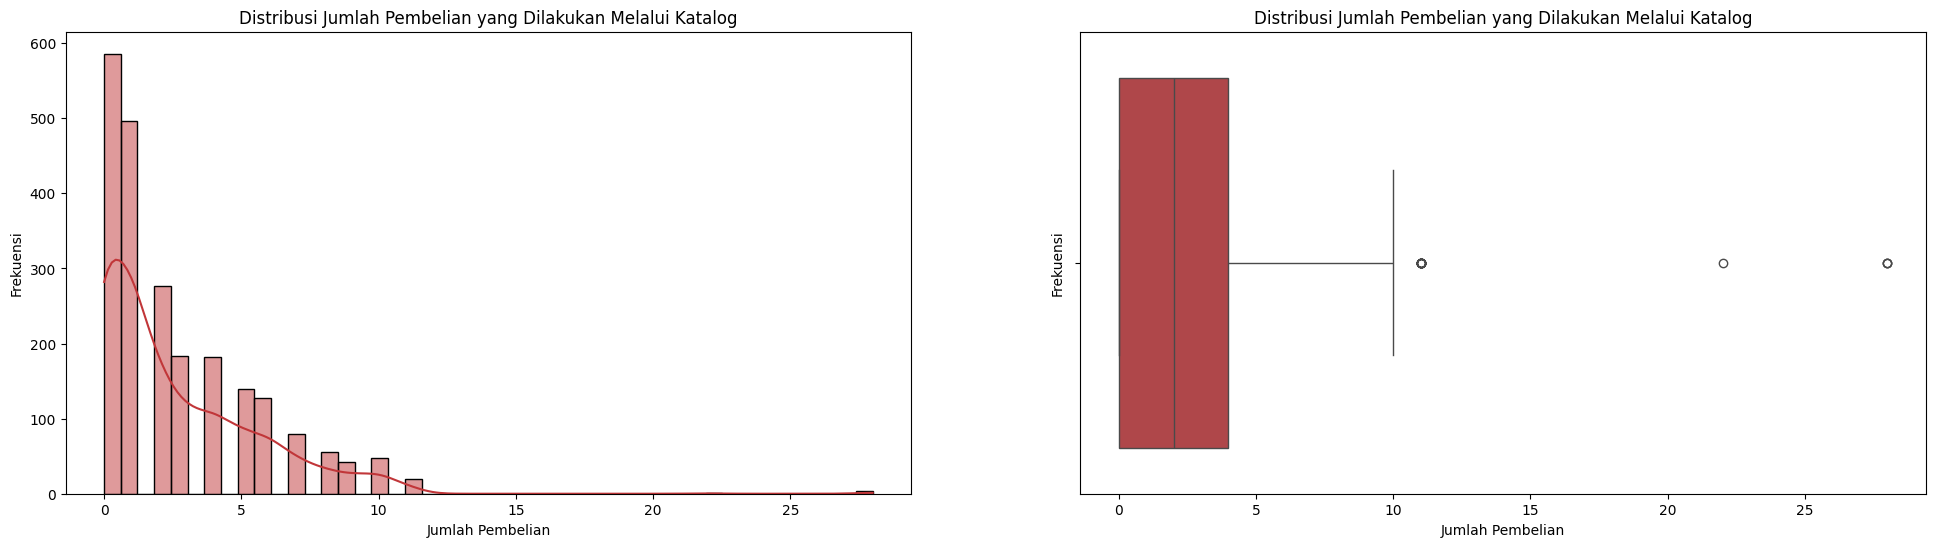

In [106]:
df[df['NumCatalogPurchases'] > 20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Pada tahap ini, pencilan pada kolom NumCatalogPurchases bernilai lebih dari 20 sudah tidak ada. Besar kemungkinan, data ini ikut terhapus pada proses penanganan pencilan sebelumnya.

#### **NumWebVisitsMonth**

Berdasarkan observasi pada Data Understanding, terdapat pencilan yang tampak terpisah dan ekstrim pada kolom NumWebVisitsMonth, yaitu nilai yang berkisar lebih dari 17.5.

In [107]:
df[df['NumWebVisitsMonth'] > 17.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,05899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0
774,04303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0


In [108]:
print(f'Banyak data, {len(df[df['NumWebVisitsMonth'] > 14]) / len(df) * 100}')

Banyak data, 0.13550135501355012


Banyak nilai pencilan ini relatif kecil, yaitu kurang dari 0.15% data keseluruhan. Nilai pencilan ini akan dihapus karena nilainya ekstrim dan jumlahnya relatif sedikit.

In [109]:
df = df[~(df['NumWebPurchases'] > 17.5)]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,05524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,02174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,04141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,06182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,05324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,04001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,07270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,08235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **2.2.5 Penanganan Anomali Nilai pada Data**

Berdasarkan observasi pada Data Understanding, nilai pada kolom Education dan Marital_Status dapat diperbaiki sebagai berikut.
- Education
    - PhD dapat diubah menjadi Doctoral.
    - Master dan 2n Cycle dapat diubah menjadi Master’s.
    - Graduation diubah menjadi Bachelor’s
    - Basic tidak diubah.

- Marital_Status
    - Single dan Alone dapat diubah menjadi Single.
    - Together tidak diubah.
    - Married tidak diubah.
    - Divorced tidak diubah.
    - Widow tidak diubah.
    - Absurd dan YOLO dapat dihapus. Hal ini dilakukan karena dua kategori ini memiliki yang ambigu. Selain itu, jumlah data dua kategori ini relatif sedikit sehingga dimungkinkan untuk dihapus.

In [110]:
df['Education'] = df['Education'].replace({
    'PhD': 'Doctoral',
    'Master': 'Master’s',
    '2n Cycle': 'Master’s',
    'Graduation': 'Bachelor’s',
    })

df['Education'].unique()

array(['Bachelor’s', 'Doctoral', 'Master’s', 'Basic'], dtype=object)

In [111]:
# Menghapus baris dengan Marital_Status YOLO dan Absurd
df = df[~((df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd'))]

# Mengubah nilai pada kolom
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    })

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

### **2.2.6 Penanganan Kolom yang Tidak Relevan**

Berdasarkan observasi pada Data Understanding, kolom Z_CostContact dan Z_Revenue adalah kolom yang tidak relevan untuk analisis data sehingga dapat dibuang

In [112]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [113]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### **2.2.7 Penambahan Kolom Baru**

Untuk kebutuhan analisis, kolom-kolom baru perlu dibuat sebagai berikut.


#### **Total Penerimaan Kampanye**

In [114]:
# Total banyak penerimaan kampanye promosi dari awal hingga akhir kampanye
df['AcceptedTotal'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
df['AcceptedTotal']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: AcceptedTotal, Length: 2210, dtype: int64

#### **Total Pengeluaran Pelanggan untuk Belanja dalam 2 Tahun Terakhir**

In [115]:
# Total Pengeluaran Pelanggan untuk Belanja dalam 2 Tahun Terakhir
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['MntTotal']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: MntTotal, Length: 2210, dtype: int64

#### **Umur Pelanggan**

In [116]:
# Tanggal pendaftaran pelanggan di perusahaan
df['Dt_Customer'].describe()

count                             2210
mean     2013-07-10 18:25:05.158371072
min                2012-07-30 00:00:00
25%                2013-01-17 00:00:00
50%                2013-07-09 00:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

Berdasarkan kolom Dt_Customer, tercatat pendaftaran pelanggan di perusahaan dilakukan pada 2013 dan 2014. Selain itu, kolom terkait Belanja Produk menunjukkan bahwa data ini adalah data 2 tahun terakhir. Berdasarkan hal itu, pembuatan data ini dapat diasumsikan dilakukan pada 2015. Kolom umur yang akan dibuat adalah umur pada 2015.

In [117]:
# Umur pelanggan (pada 2015)
df['Age'] = 2015 - df['Year_Birth']
df['Age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2210, dtype: int64

#### **Kelompok Umur Pelanggan**

In [118]:
# Umur pelanggan
df['Age'].describe()

count    2210.000000
mean       46.119910
std        11.697702
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: Age, dtype: float64

Kolom Age, rentang 19 - 75 tahun, akan dikelompokkan berdasarkan generasi umur sebagai berikut.
- Young Adult (Dewasa Muda): 19-35 tahun
- Adult (Dewasa): 36-55 tahun
- Senior (Lanjut Usia): 56 tahun ke atas

In [119]:
# Kelompok Umur Pelanggan
df['GroupAge'] = df['Age'].apply(lambda x: 'Young Adult' if 19 <= x <= 35 else 'Adult' if 35 < x <= 55 else 'Senior')
df['GroupAge']

0            Senior
1            Senior
2             Adult
3       Young Adult
4       Young Adult
           ...     
2235          Adult
2236         Senior
2237    Young Adult
2238         Senior
2239         Senior
Name: GroupAge, Length: 2210, dtype: object

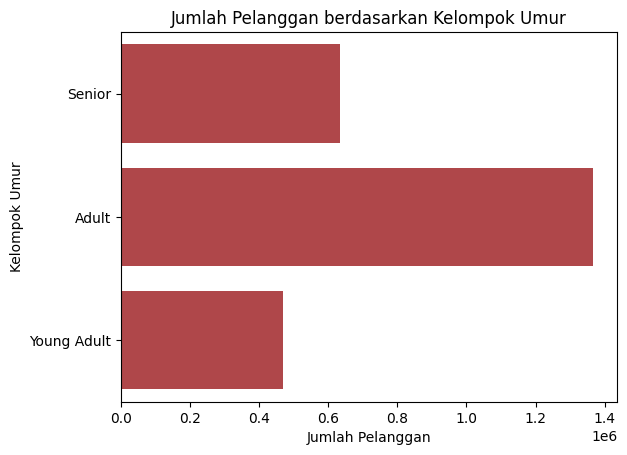

In [120]:
sns.barplot(df['GroupAge'], ci=0, estimator='sum')
plt.title('Jumlah Pelanggan berdasarkan Kelompok Umur')
plt.ylabel('Kelompok Umur')
plt.xlabel('Jumlah Pelanggan')
plt.show()

### **Total Anak di Rumah**

In [121]:
# Total Anak di Rumah
# Jumlah antara Kidhome (Jumlah anak-anak di rumah) dan Teenhome (Jumlah anak remaja di rumah)
df['ChildrenHome'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df['ChildrenHome']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: ChildrenHome, Length: 2210, dtype: int64

### **Data Setelah Data Cleaning**

In [122]:
print('Banyak data terbaru:', len(df))
print(f'Banyak data yang dibersihkan: {2240 - len(df)}, atau {round(((2240 - len(df)) / 2240) * 100, 2)}% dari data awal')

Banyak data terbaru: 2210
Banyak data yang dibersihkan: 30, atau 1.34% dari data awal


# **3. Data Analysis**

Analisis data dilakukan memahami kepribadian dan perilaku pelanggan untuk mengembangkan strategi pemasaran yang lebih personal dan efektif. Hal ini dilakukan dengan menjawab Business Statement yang telah didefinisikan, yaitu:
1. Bagaimana karakteristik pelanggan yang paling banyak melakukan pembelian produk dalam 2 tahun terakhir?
2. Bagaimana hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran untuk belanja dalam 2 tahun terakhir?
3. Bagaimana produk yang dibeli berdasarkan karakteristik pelanggan?
4. Bagaimana efektivitas kampanye promosi yang ada saat ini?
5. Apa saluran pembelian (web, katalog, toko) yang paling banyak digunakan oleh pelanggan?
6. Apa karakteristik pelanggan yang melakukan pembelian melalui saluran pembelian?

## **Pertanyaan Bisnis 1**

Bagaimana karakteristik pelanggan yang paling banyak melakukan pembelian produk dalam 2 tahun terakhir?

Pertanyaan ini diajukan untuk melihat karakteristik pelanggan yang banyak melakukan pembelian produk dalam 2 tahun terakhir. Banyaknya pembelian yang dilakukan pelanggan dapat dilihat dari total pengeluaran pelanggan untuk seluruh produk. Semakin banyak total pengeluaran pelanggan berarti pelanggan semakin banyak melakukan pembelian. Total pengeluaran ini dilihat berdasarkan kelompok umur, tingkat pendidikan, status pernikahan, dan total anak untuk melihat karakteristik pelanggan. Visualisasi yang sesuai untuk hal ini adalah barplot yang menampilkan jumlah atau total pengeluaran.

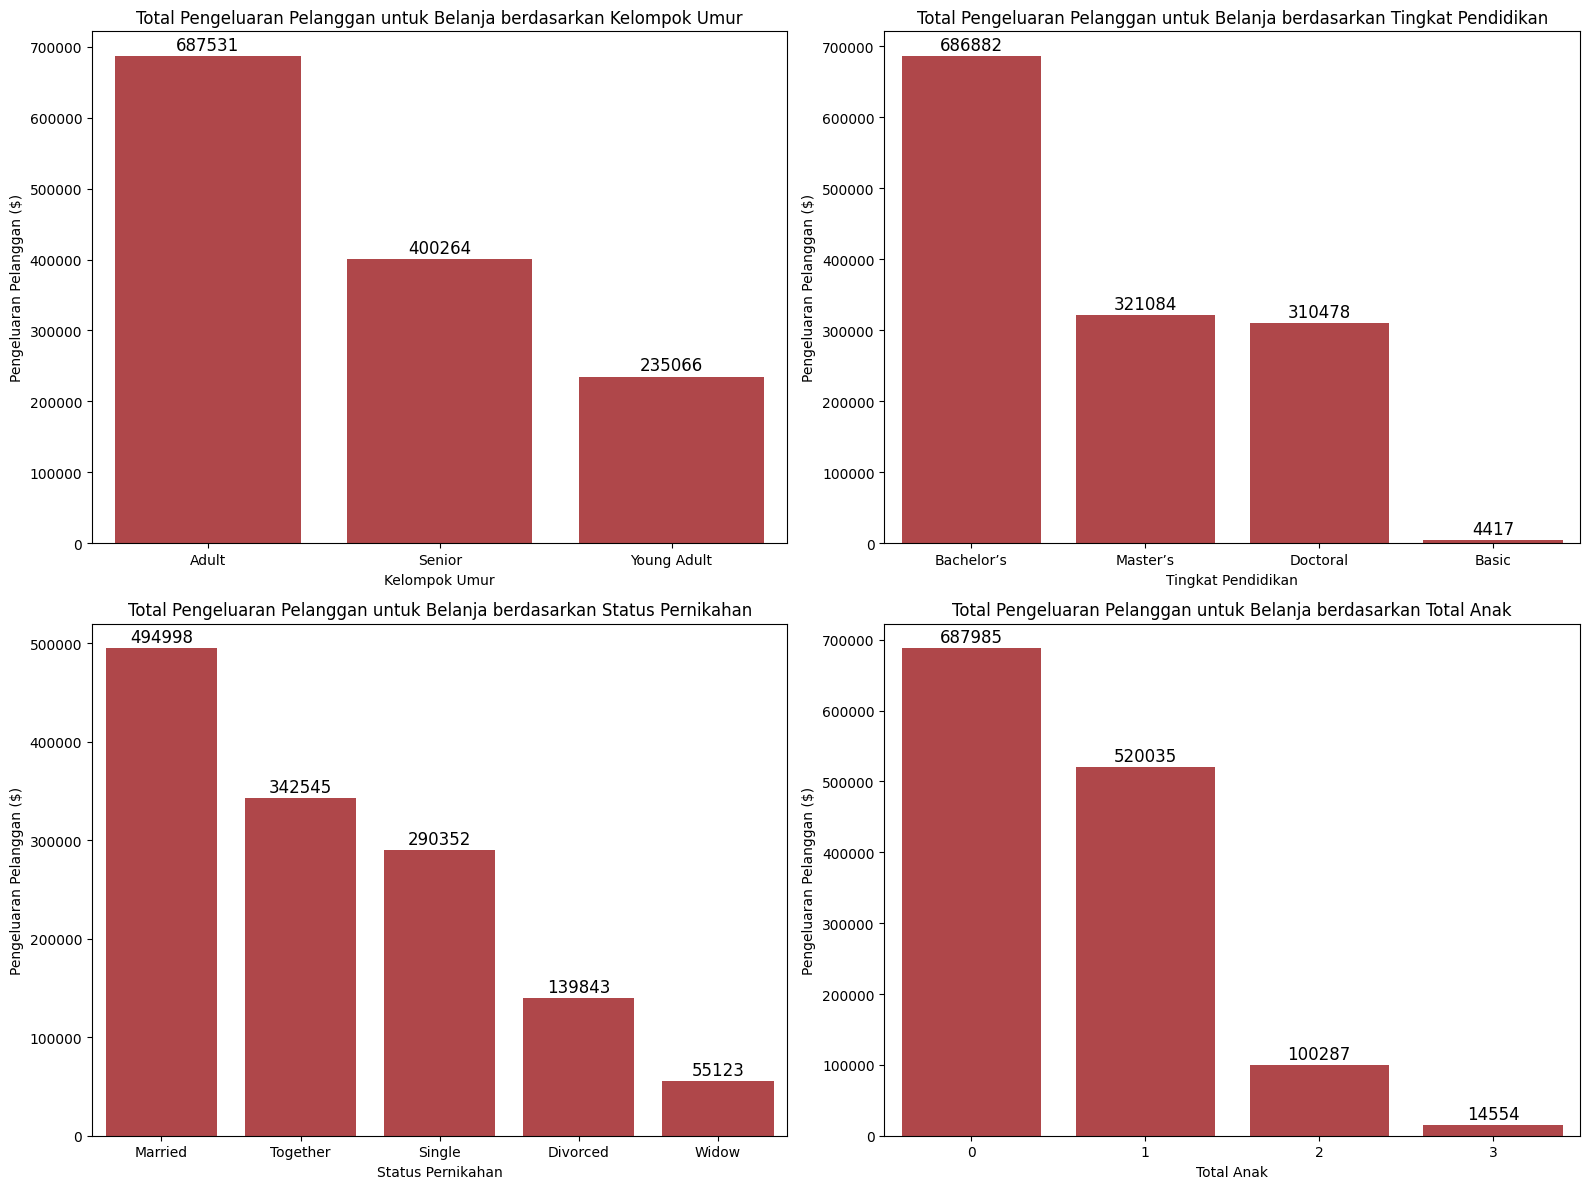

In [123]:
plt.figure(figsize=(16, 12))

tmp1 = ['Kelompok Umur', 'Tingkat Pendidikan', 'Status Pernikahan', 'Total Anak']

for i, column in enumerate(['GroupAge', 'Education', 'Marital_Status', 'ChildrenHome']):

    plt.subplot(2, 2, i+1)
    plots = sns.barplot(
        df.groupby(column)['MntTotal'].sum().sort_values(ascending=False)
        )
    plt.title(f'Total Pengeluaran Pelanggan untuk Belanja berdasarkan {tmp1[i]}')
    plt.xlabel(f'{tmp1[i]}')
    plt.ylabel('Pengeluaran Pelanggan ($)')

    # menambahkan anotasi pada tiap bar
    for bar in plots.patches:plots.annotate(
        format(bar.get_height(), '.0f'), 
        (bar.get_x() + bar.get_width() / 2, 
        bar.get_height()), 
        ha='center', 
        va='center',
        size=12, 
        xytext=(0, 8),
        textcoords='offset points'
        )

    plt.tight_layout();

**Hasil Observasi**
- Kelompok Umur
    - Pelanggan yang paling banyak melakukan pembelian dalam 2 tahun terakhir adalah Adult (36-55 tahun). Ini mungkin terjadi mayoritas pelanggan masuk dalam kelompok Adult.
    - Pelanggan yang paling sedikit melakukan pembelian dalam 2 tahun terakhir adalah Young Adult (19-35 tahun).
- Tingkat Pendidikan
    - Pelanggan yang paling banyak melakukan pembelian dalam 2 tahun terakhir adalah Bachelor's.
    - Pelanggan yang paling sedikit melakukan pembelian dalam 2 tahun terakhir adalah Basic.
- Status Pernikahan
    - Pelanggan yang paling banyak melakukan pembelian dalam 2 tahun terakhir adalah Maried.
    - Pelanggan yang paling sedikit melakukan pembelian dalam 2 tahun terakhir adalah Widow.
- Total Anak
    - Pelanggan yang paling banyak melakukan pembelian dalam 2 tahun terakhir adalah pelanggan yang tidak memiliki anak.
    - Pelanggan yang paling sedikit melakukan pembelian dalam 2 tahun terakhir adalah pelanggan yang memiliki 3 anak.



## **Pertanyaan Bisnis 2**

Bagaimana hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran untuk belanja dalam 2 tahun terakhir?

Pertanyaan ini diajukan untuk melihat karakteristik pelanggan berdasarkan hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran untuk belanja dalam 2 tahun terakhir. Hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran ini dapat menunjukkan karakteristik pelanggan ketika melakukan pembelian. Karakteristik ini dilihat pendapatan tahunan rumah yang diperoleh. Hubungan antara pendapatan tahunan rumah tangga dan total pengeluaran ini dapat dilihat melalui visualisasi scatterplot.

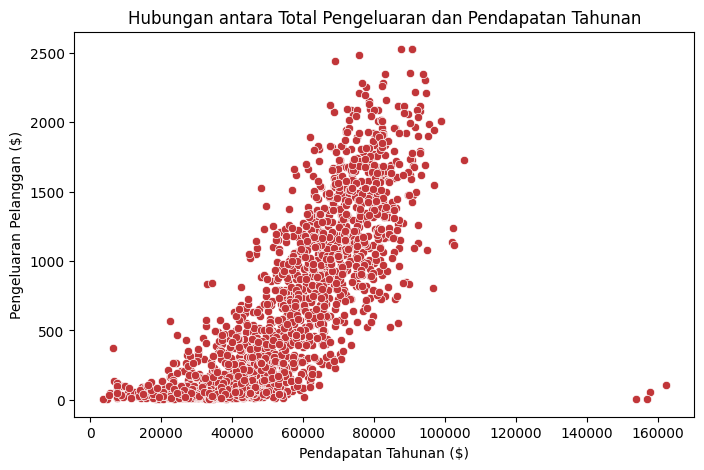

In [124]:
plt.figure(figsize=(8, 5))
plt.title('Hubungan antara Total Pengeluaran dan Pendapatan Tahunan')
plt.xlabel('')
sns.scatterplot(df, x='Income', y='MntTotal')
plt.xlabel('Pendapatan Tahunan ($)')
plt.ylabel('Pengeluaran Pelanggan ($)')
plt.show()

**Hasil Observasi**

- Hubungan antara total pengeluaran untuk belanja dalam 2 tahun terakhir dengan pendapatan tahunan adalah korelasi positif. Ini berarti total pengeluaran untuk belanja dalam 2 tahun terakhir akan semakin besar jika pendapatan tahunan semakin besar.
- Secara umum, pelanggan dengan total pengeluaran yang besar adalah pelanggan dengan pendapatan tahunan yang besar.

## **Pertanyaan Bisnis 3**
Bagaimana produk yang dibeli berdasarkan karakteristik pelanggan?

Pertanyaan ini diajukan untuk melihat karakteristik pelanggan pada produk tertentu. Pada bagian ini, hal yang akan dilihat adalah produk yang paling banyak dibeli oleh pelanggan. Banyaknya pembelian yang dilakukan pelanggan dapat dilihat dari total pengeluaran pelanggan untuk seluruh produk. Hal ini akan dilihat menggunakan barplot yang menampilkan jumlah atau total pengeluaran. Setelah itu, karakteristik pelanggan akan dilihat dengan melihat total pengeluaran berdasarkan kelompok umur, tingkat pendidikan, status pernikahan, dan total anak.

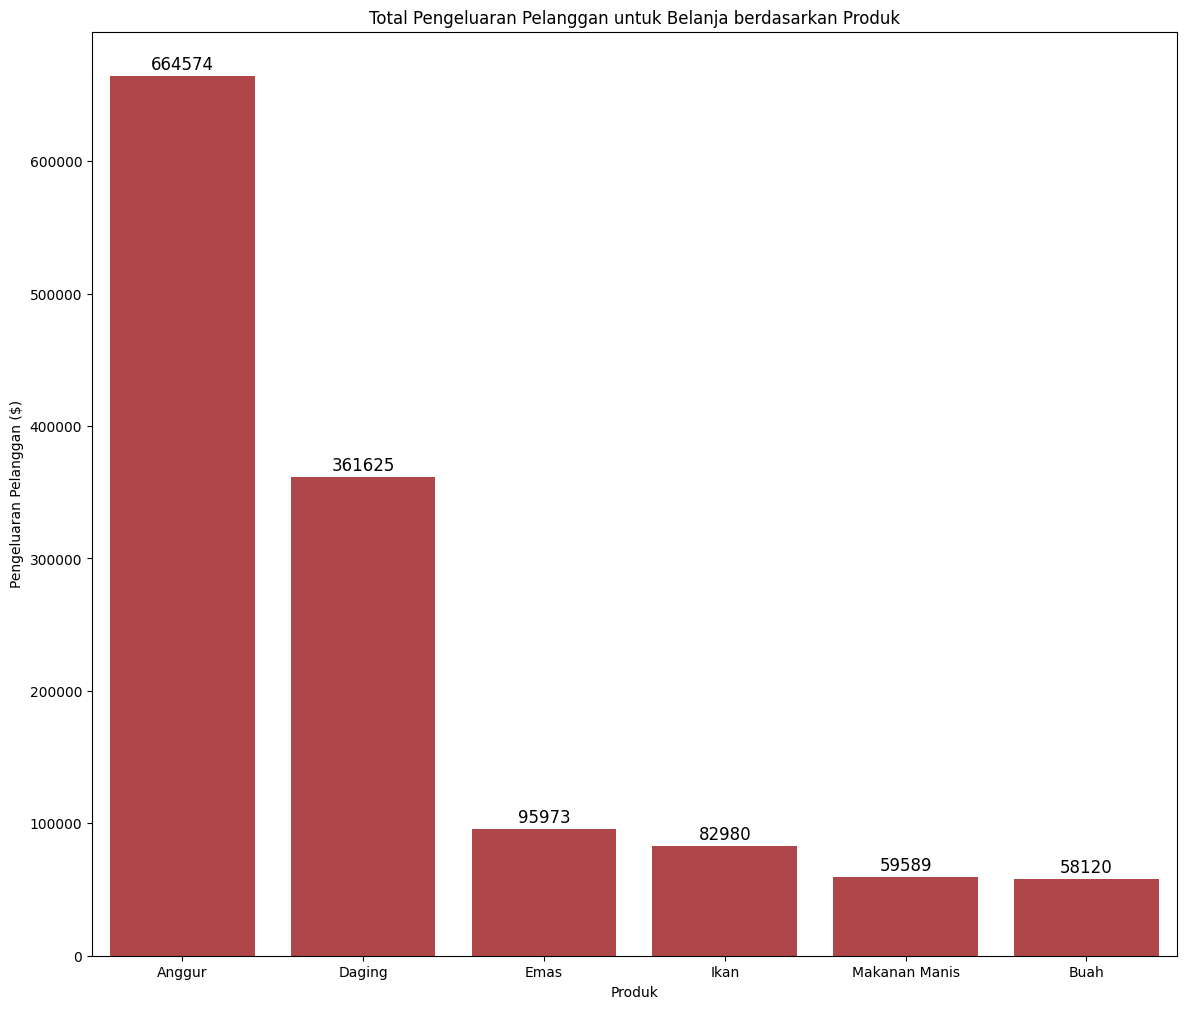

In [125]:
plt.figure(figsize=(14, 12))

tmp = ['Anggur', 'Daging', 'Emas', 'Ikan', 'Makanan Manis', 'Buah']

plots = sns.barplot(df[columns1].sum().sort_values(ascending=False))
plt.title(f'Total Pengeluaran Pelanggan untuk Belanja berdasarkan Produk')
plt.xlabel('Produk')
plt.ylabel('Pengeluaran Pelanggan ($)')
plots.set_xticklabels(tmp)

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.show()

**Hasil Observasi**

- Produk yang paling banyak dibeli oleh pelanggan dalam 2 tahun terakhir adalah anggur.
- Produk yang paling sedikit dibeli oleh pelanggan dalam 2 tahun terakhir adalah emas.

Berikut merupakan rincian total pengeluaran pelanggan berdasarkan karakteristik pelanggan.

### **Berdasarkan Kelompok Umur**

In [126]:
data_tmp = df.groupby(['GroupAge'])[columns1].sum()
data_tmp = pd.melt(data_tmp.reset_index(), id_vars=['GroupAge'])
data_tmp

,GroupAge,variable,value
0,Adult,MntWines,353903
1,Senior,MntWines,208529
2,Young Adult,MntWines,102142
3,Adult,MntFruits,30448
4,Senior,MntFruits,15713
5,Young Adult,MntFruits,11959
6,Adult,MntMeatProducts,179022
7,Senior,MntMeatProducts,107293
8,Young Adult,MntMeatProducts,75310
9,Adult,MntFishProducts,42204


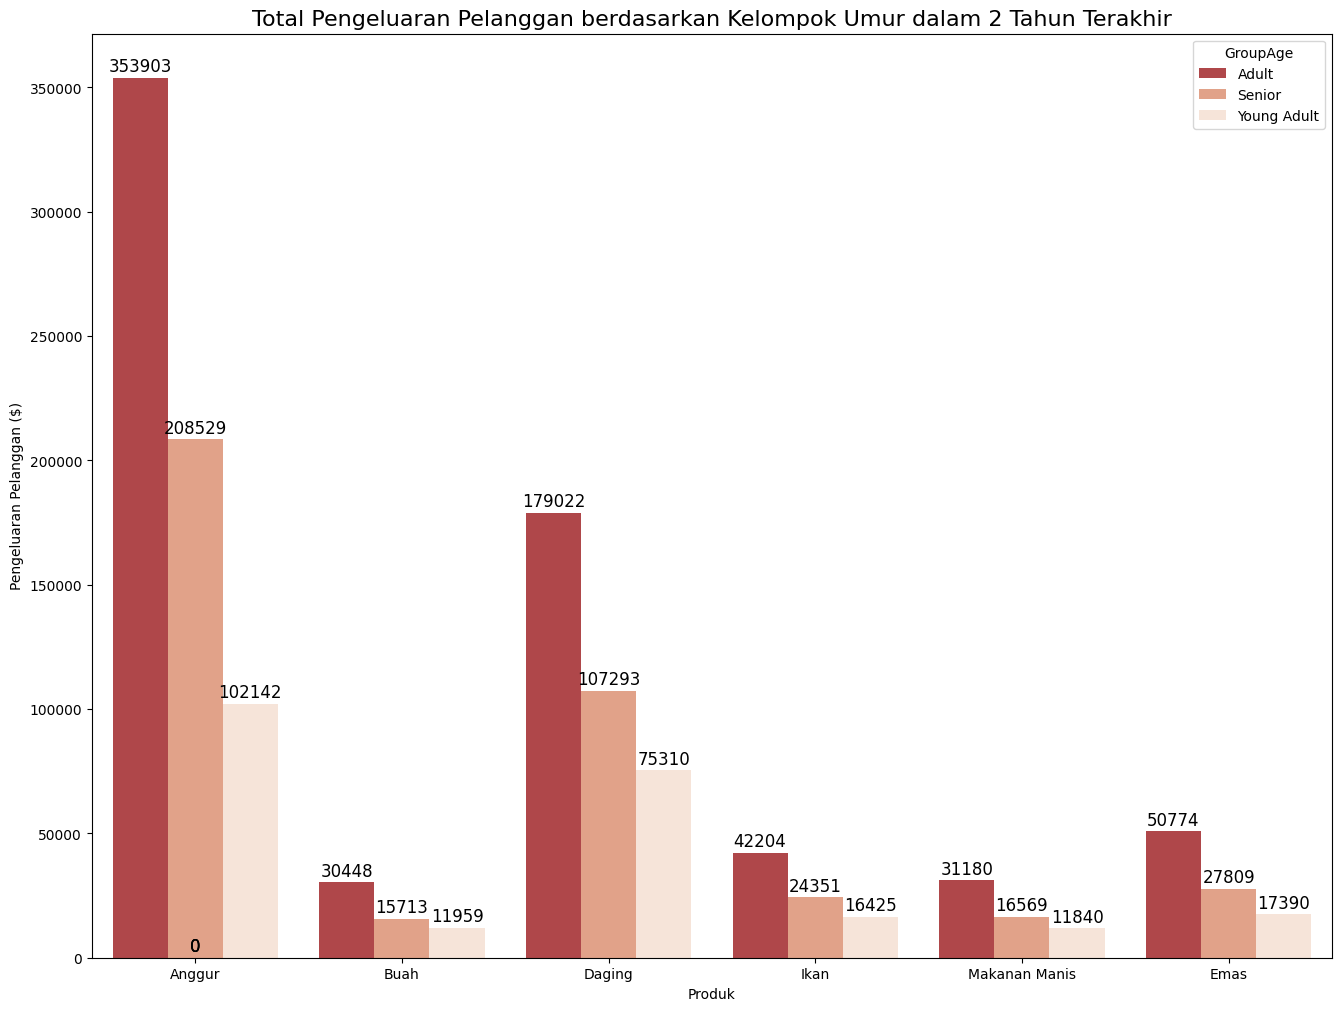

In [127]:
plt.figure(figsize=(16,12))
plots = sns.barplot(data_tmp, hue='GroupAge', y='value', x='variable')
plt.title(f'Total Pengeluaran Pelanggan berdasarkan Kelompok Umur dalam 2 Tahun Terakhir', size=16)

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.xlabel('Produk')
plt.ylabel('Pengeluaran Pelanggan ($)')
plots.set_xticklabels(['Anggur', 'Buah', 'Daging', 'Ikan', 'Makanan Manis', 'Emas'])

plt.show()

**Hasil Observasi**

- Semua kelompok usia melakukan pembelian terbesar pada produk Anggur.
- Pada semua produk, pelanggan Senior selalu menjadi pembeli terbesar.
- Rata-rata pengeluaran pelanggan untuk membeli Buah, Ikan, dan Makanan Manis cenderung masih kecil. Ini dapat berarti produk tersebut kurang diminati.

### **Berdasarkan Tingkat Pendidikan**

In [128]:
data_tmp = df.groupby(['Education'])[columns1].sum()
data_tmp = pd.melt(data_tmp.reset_index(), id_vars=['Education'])
data_tmp

,Education,variable,value
0,Bachelor’s,MntWines,315361
1,Basic,MntWines,391
2,Doctoral,MntWines,187649
3,Master’s,MntWines,161173
4,Bachelor’s,MntFruits,34377
5,Basic,MntFruits,600
6,Doctoral,MntFruits,9430
7,Master’s,MntFruits,13713
8,Bachelor’s,MntMeatProducts,197872
9,Basic,MntMeatProducts,618


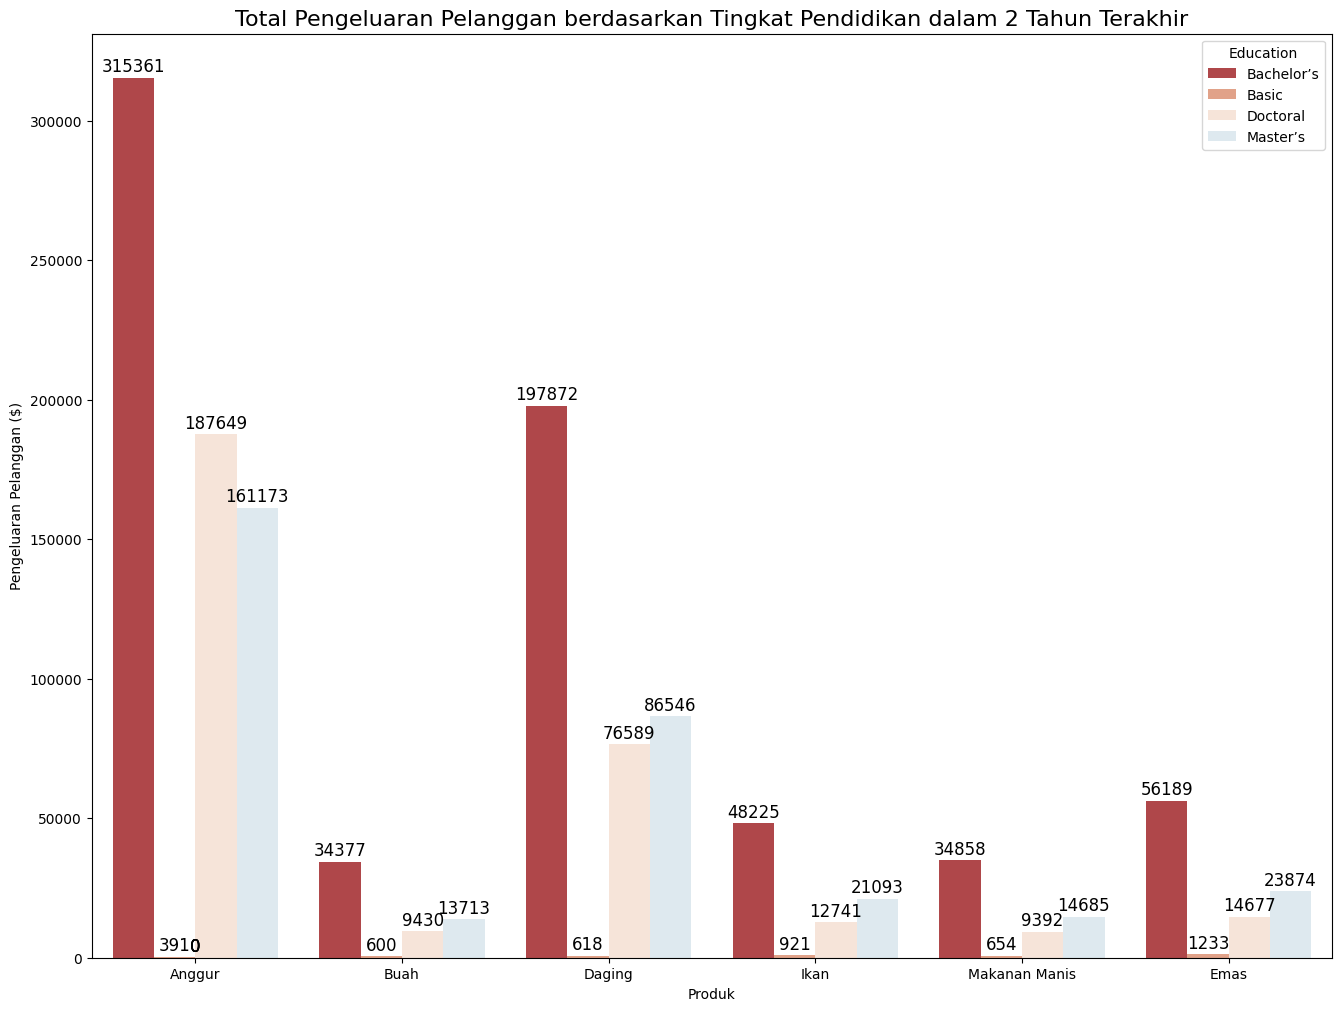

In [129]:
plt.figure(figsize=(16,12))
plots = sns.barplot(data_tmp, hue='Education', y='value', x='variable')
plt.title(f'Total Pengeluaran Pelanggan berdasarkan Tingkat Pendidikan dalam 2 Tahun Terakhir', size=16)

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.xlabel('Produk')
plt.ylabel('Pengeluaran Pelanggan ($)')
plots.set_xticklabels(['Anggur', 'Buah', 'Daging', 'Ikan', 'Makanan Manis', 'Emas'])

plt.show()

**Hasil Observasi**

- Pelanggan Doktoral melakukan pembelian terbesar pada produk Anggur.
- Pelanggan Bachelor's melakukan pembelian terbesar pada produk Daging.
- Pada semua produk, pelanggan Doktoral selalu menjadi pembeli terbesar.
- Pembelian yang dilakukan oleh pelanggan Basic cenderung kecil.
- Rata-rata pengeluaran pelanggan untuk membeli Buah, Ikan, dan Makanan Manis cenderung masih kecil. Ini dapat berarti produk tersebut kurang diminati.

### **Berdasarkan Status Pernikahan**

In [130]:
data_tmp = df.groupby(['Marital_Status'])[columns1].sum()
data_tmp = pd.melt(data_tmp.reset_index(), id_vars=['Marital_Status'])
data_tmp

,Marital_Status,variable,value
0,Divorced,MntWines,73889
1,Married,MntWines,251270
2,Single,MntWines,138780
3,Together,MntWines,173663
4,Widow,MntWines,26972
5,Divorced,MntFruits,6356
6,Married,MntFruits,21944
7,Single,MntFruits,12868
8,Together,MntFruits,14420
9,Widow,MntFruits,2532


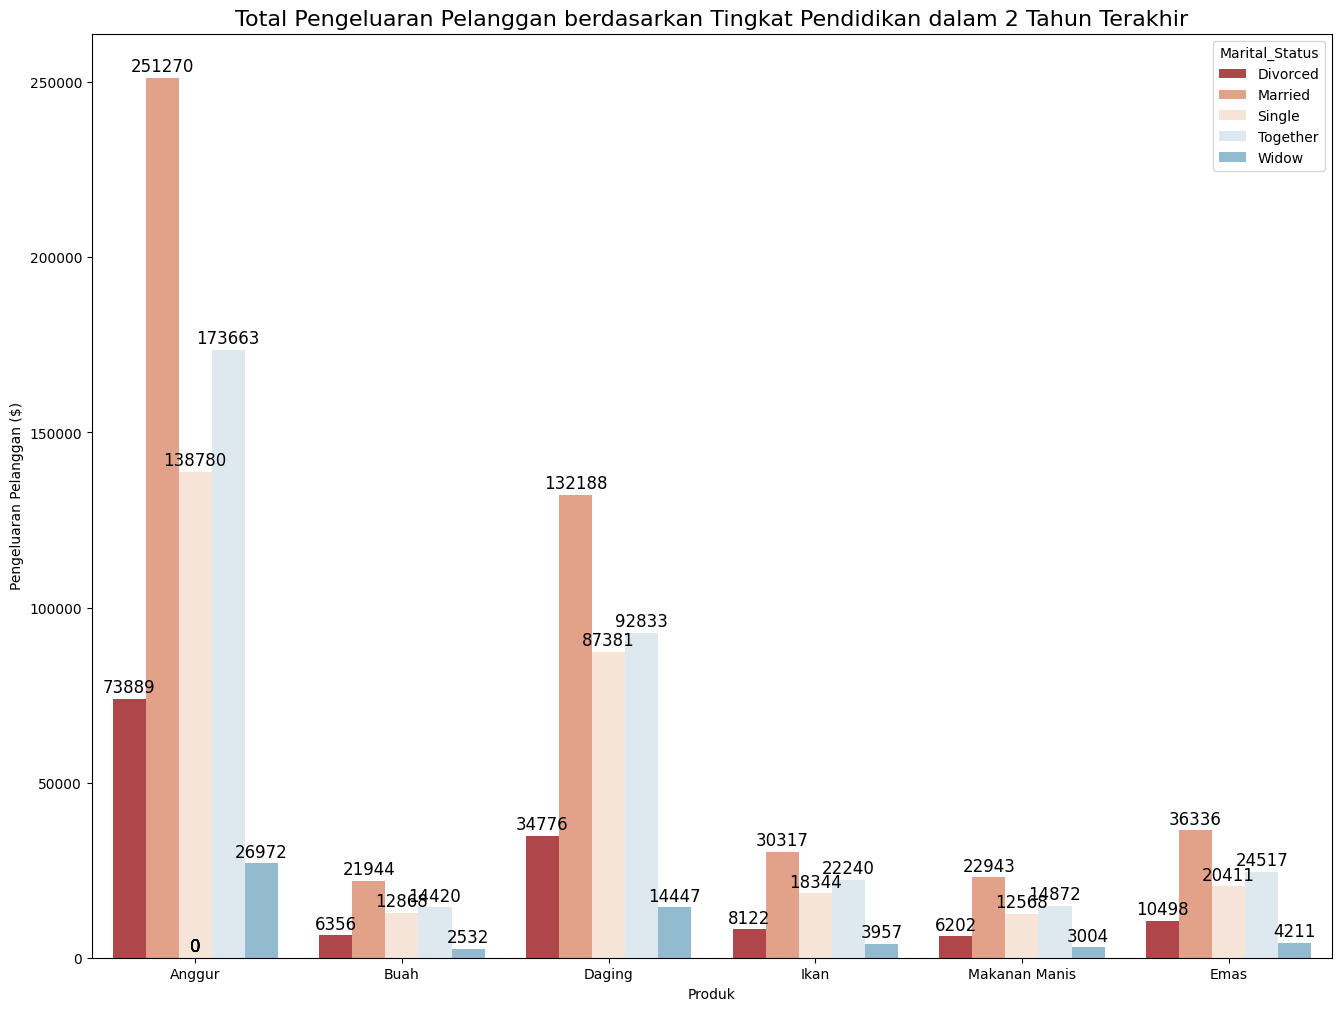

In [131]:
plt.figure(figsize=(16,12))
plots = sns.barplot(data_tmp, hue='Marital_Status', y='value', x='variable')
plt.title(f'Total Pengeluaran Pelanggan berdasarkan Tingkat Pendidikan dalam 2 Tahun Terakhir', size=16)

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.xlabel('Produk')
plt.ylabel('Pengeluaran Pelanggan ($)')
plots.set_xticklabels(['Anggur', 'Buah', 'Daging', 'Ikan', 'Makanan Manis', 'Emas'])

plt.show()

**Hasil Observasi**

- Pengeluaran terbesar dari tiap Kelompok Status Pernikahan terletak pada pembelian Anggur.
- Pada semua produk, pelanggan Widow selalu menjadi pembeli terbesar.
- Rata-rata pengeluaran pelanggan untuk membeli Buah, Ikan, dan Makanan Manis cenderung masih kecil. Ini dapat berarti produk tersebut kurang diminati.

### **Berdasarkan Total Anak di Rumah**

In [132]:
data_tmp = df.groupby(['ChildrenHome'])[columns1].sum()
data_tmp = pd.melt(data_tmp.reset_index(), id_vars=['ChildrenHome'])
data_tmp

,ChildrenHome,variable,value
0,0,MntWines,303356
1,1,MntWines,294585
2,2,MntWines,57550
3,3,MntWines,9083
4,0,MntFruits,32912
5,1,MntFruits,21576
6,2,MntFruits,3266
7,3,MntFruits,366
8,0,MntMeatProducts,230124
9,1,MntMeatProducts,106787


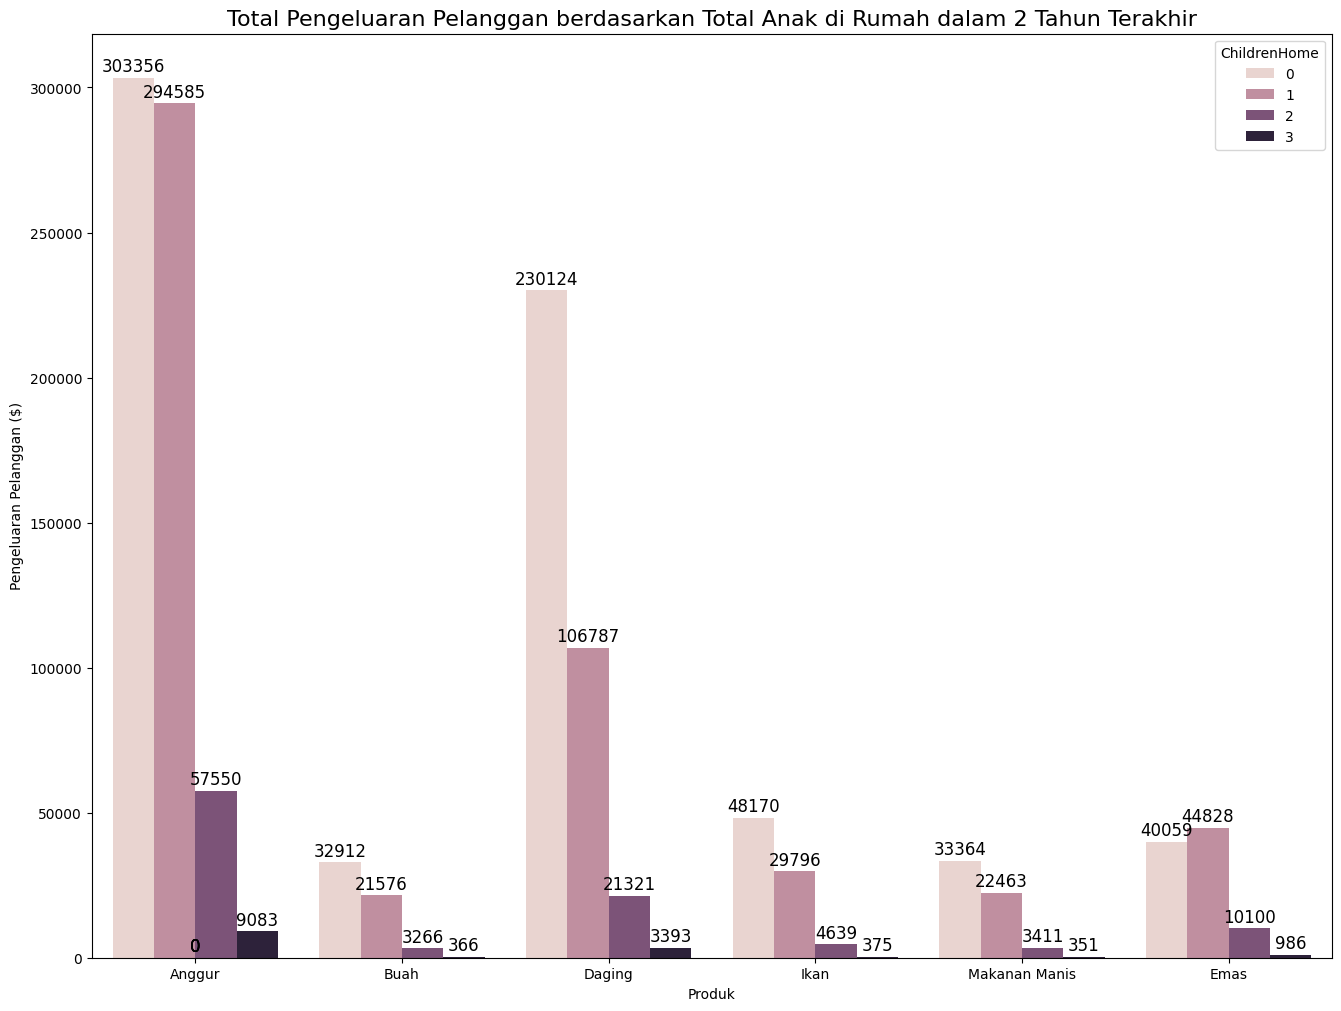

In [133]:
plt.figure(figsize=(16,12))
plots = sns.barplot(data_tmp, hue='ChildrenHome', y='value', x='variable')
plt.title(f'Total Pengeluaran Pelanggan berdasarkan Total Anak di Rumah dalam 2 Tahun Terakhir', size=16)

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.xlabel('Produk')
plt.ylabel('Pengeluaran Pelanggan ($)')
plots.set_xticklabels(['Anggur', 'Buah', 'Daging', 'Ikan', 'Makanan Manis', 'Emas'])

plt.show()

**Hasil Observasi**

- Pengeluaran terbesar dari tiap Kelompok Status Pernikahan ada pada pembelian Anggur.
- Pengeluaran terbesar dari semua produk dilakukan oleh pelanggan yang tidak memiliki anak.
- Semakin banyak anak, total pengeluaran pelanggan semakin rendah.
- Total pengeluaran pelanggan untuk membeli Buah, Ikan, dan Makanan Manis cenderung masih kecil. Ini berarti produk tersebut kurang diminati.

## **Pertanyaan Bisnis 4**
Bagaimana efektivitas kampanye promosi yang ada saat ini?

Efektifitas kampanye promosi ini dapat dilihat dari jumlah penerimaan tawaran kampanye (dari awal sampai akhir) dan jumlah pelanggan berdasarkan jumlah penerimaan tawaran kampanye tersebut. Semakin banyak jumlah pelanggan dengan jumlah penerimaan tawaran kampanye yang tinggi, maka kampanye promosi semakin efektif. Efektifitas kampanye secara keseluruhan dapat dilihat melalui proporsi pelanggan yang menerima tawaran dan tidak secara keseluruhan. Hal ini dapat divisualisasikan menggunaka pie chart. Selain itu, efektifitas kampanye ini juga dilihat dari banyak pelanggan berdasarkan tingkat penerimaan tertentu (banyaknya penawaran yang diterima). Hal ini dapat divisualisasikan menggunaka bar plot.

In [134]:
# Jumlah pelanggan berdasarkan jumlah penerimaan tawaran secara keseluruhan
df_totcust_accall = pd.DataFrame(df['AcceptedTotal'].value_counts())
df_totcust_accall

,count
AcceptedTotal,
0,1614
1,366
2,142
3,46
4,34
5,8


In [135]:
# Jumlah pelanggan berdasarkan riwayat penerimaan tawaran, yaitu:
# - Tidak Pernah: Tidak pernah menerima penawaran sama sekali, atau
# - Pernah: Pernah menerima penawaran setidaknya sekali
df_yesno_acc = pd.DataFrame(
    columns=['count'], 
    index=['Tidak Pernah', 'Pernah'], 
    data=[
        df_totcust_accall[df_totcust_accall.index < 1].iloc[0][0],
        df_totcust_accall[df_totcust_accall.index >= 1].sum().iloc[0]
        ]
    )
df_yesno_acc['Persentase'] = df_yesno_acc['count'] / df_yesno_acc['count'].sum() * 100
df_yesno_acc

,count,Persentase
Tidak Pernah,1614,73.031674
Pernah,596,26.968326


In [136]:
df_totcust_accall.reset_index()

,AcceptedTotal,count
0,0,1614
1,1,366
2,2,142
3,3,46
4,4,34
5,5,8


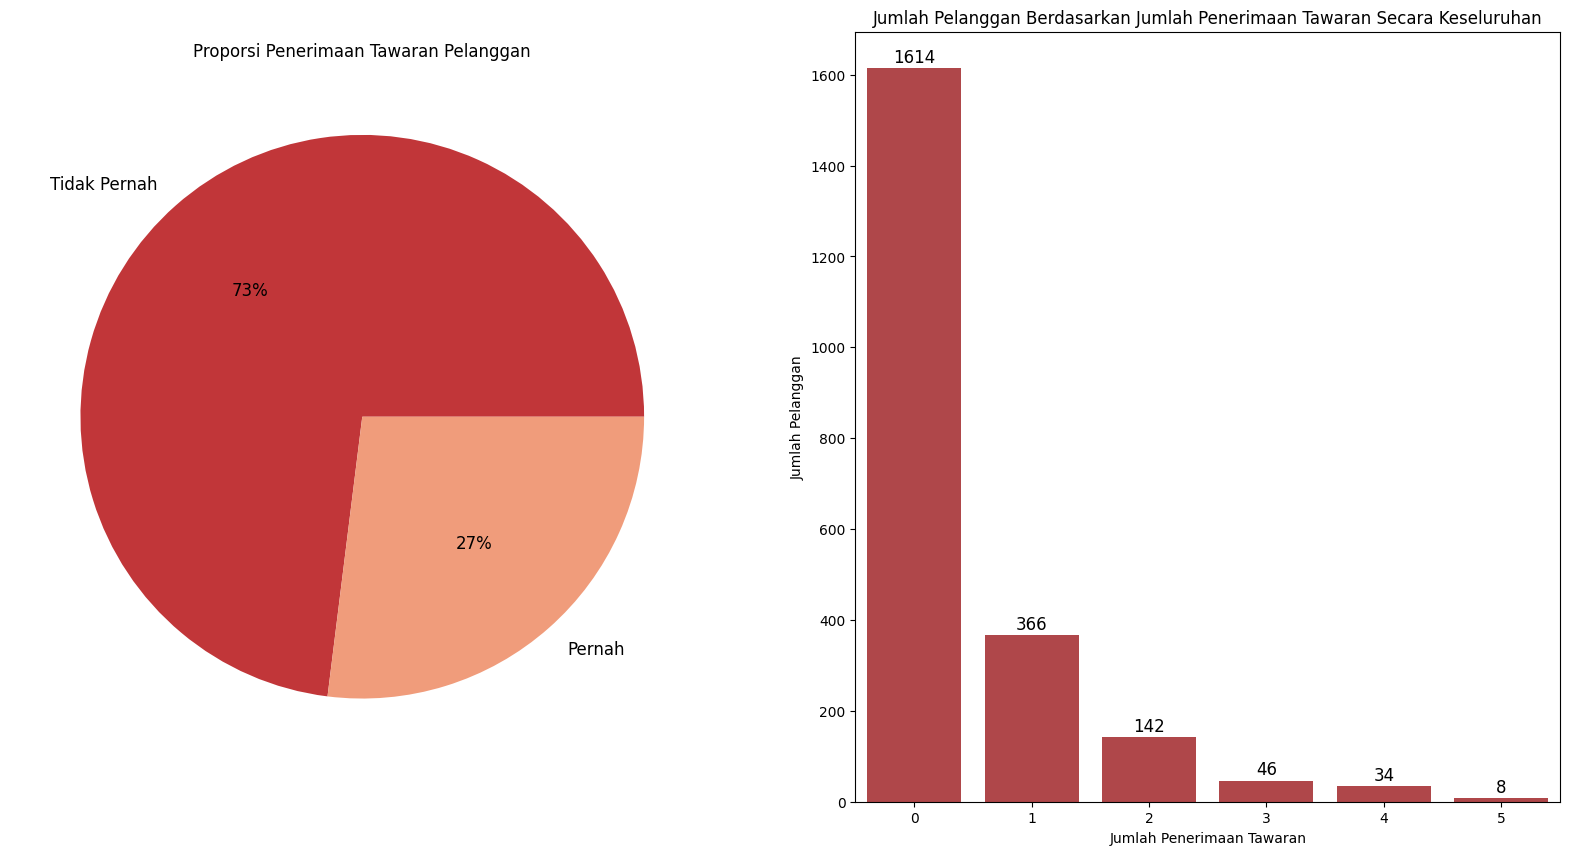

In [137]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Proporsi Penerimaan Tawaran Pelanggan')
plt.pie(
    x=df_yesno_acc['Persentase'],
    labels=list(df_yesno_acc.index),
    autopct=f'%.0f%%',
    textprops={'fontsize': 12},
)

plt.subplot(1, 2, 2)
plt.title('Jumlah Pelanggan Berdasarkan Jumlah Penerimaan Tawaran Secara Keseluruhan')
plots = sns.barplot(df_totcust_accall, ci=0, x='AcceptedTotal', y='count')
plt.xlabel('Jumlah Penerimaan Tawaran')
plt.ylabel('Jumlah Pelanggan')

# menambahkan anotasi pada tiap bar
for bar in plots.patches:plots.annotate(
    format(bar.get_height(), '.0f'), 
    (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), 
    ha='center', 
    va='center',
    size=12, 
    xytext=(0, 8),
    textcoords='offset points'
    )

plt.show()

**Hasil Observasi**
- Proporsi menerima penawaran kampanye, setidaknya satu kali, cukup kecil, yaitu 27%.
- Mayoritas pelanggan tidak menerima penawaran kampanye.
- Dari 6 kali kampanye penawaran, jumlah pelanggan yang menerima kembali penawaran setelah sebelumnya menerima penawaran semakin sedikit.

Hasil observasi ini mengindikasikan bahwa kampanye yang dilakukan tidak efektik. Hal ini mungkin terjadi karena kampanye promosi yang dilakukan tidak menarik atau tidak tepat sasaran.


## **Pertanyaan Bisnis 5**
Apa saluran pembelian (web, katalog, toko) yang paling banyak digunakan oleh pelanggan?

Pertanyaan ini dilakukan untuk melihat preferensi saluran pembelian yang digunakan pelanggan. Preferensi saluran pembelian pelanggan ini dapat dilihat dari proporsi pelanggan yang menggunakan saluran pembelian. Proporsi pelanggan yang tinggi pada suatu saluran pembelian dapat menjadi indikasi bahwa pelanggan cenderung lebih suka belanja melalui saluran pembelian tersebut. Proporsi pelanggan yang paling tinggi dapat berarti pelanggan paling suka berbelanja melalui saluran pembelian tersebut. Visualisasi yang sesuai untuk digunakan adalah pie chart.

In [138]:
df_tmp = pd.DataFrame(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()).rename(columns={0: 'BanyakPembelian'})
df_tmp['PersentasePembelian'] = df_tmp['BanyakPembelian'] / df_tmp['BanyakPembelian'].sum() * 100
df_tmp

,index,BanyakPembelian,PersentasePembelian
0,NumWebPurchases,8958,32.464756
1,NumCatalogPurchases,5768,20.903852
2,NumStorePurchases,12867,46.631392


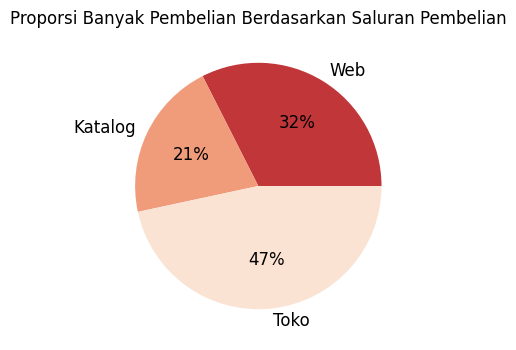

In [139]:
plt.figure(figsize=(10, 4))

plt.title('Proporsi Banyak Pembelian Berdasarkan Saluran Pembelian')
plt.pie(
    x=df_tmp['PersentasePembelian'],
    labels=['Web', 'Katalog', 'Toko'],
    autopct=f'%.0f%%',
    textprops={'fontsize': 12},
)
plt.show()

**Hasil Observasi**

- Pembelian paling banyak dilakukan melalui toko.
- Pembelian paling sedikit dilakukan melalui katalog.

## **Pertanyaan Bisnis 6**
Apa karakteristik pelanggan yang melakukan pembelian melalui saluran pembelian?

Pertanyaan ini adalah lanjutan dari pertanyaan sebelumnya. Pertanyaan ini diajukan untuk melihat karakteristik pelanggan berdasarkan saluran pembelian yang digunakan. Karakteristik pelanggan ini dapat diketahui dengan melihat proporsi pelanggan yang menggunakan saluran pembelian berdasarkan kelompok umur, tingkat pendidikan, status pernikahan, dan total anak di rumah. Proporsi kelompok pelanggan yang tinggi pada suatu saluran pembelian dapat menjadi indikasi bahwa kelompok pelanggan cenderung lebih suka belanja melalui saluran pembelian tersebut. Proporsi kelompok pelanggan yang paling tinggi dapat berarti kelompok pelanggan paling suka berbelanja melalui saluran pembelian tersebut. Visualisasi yang sesuai untuk digunakan adalah pie chart.

### **Saluran Pembelian Web**

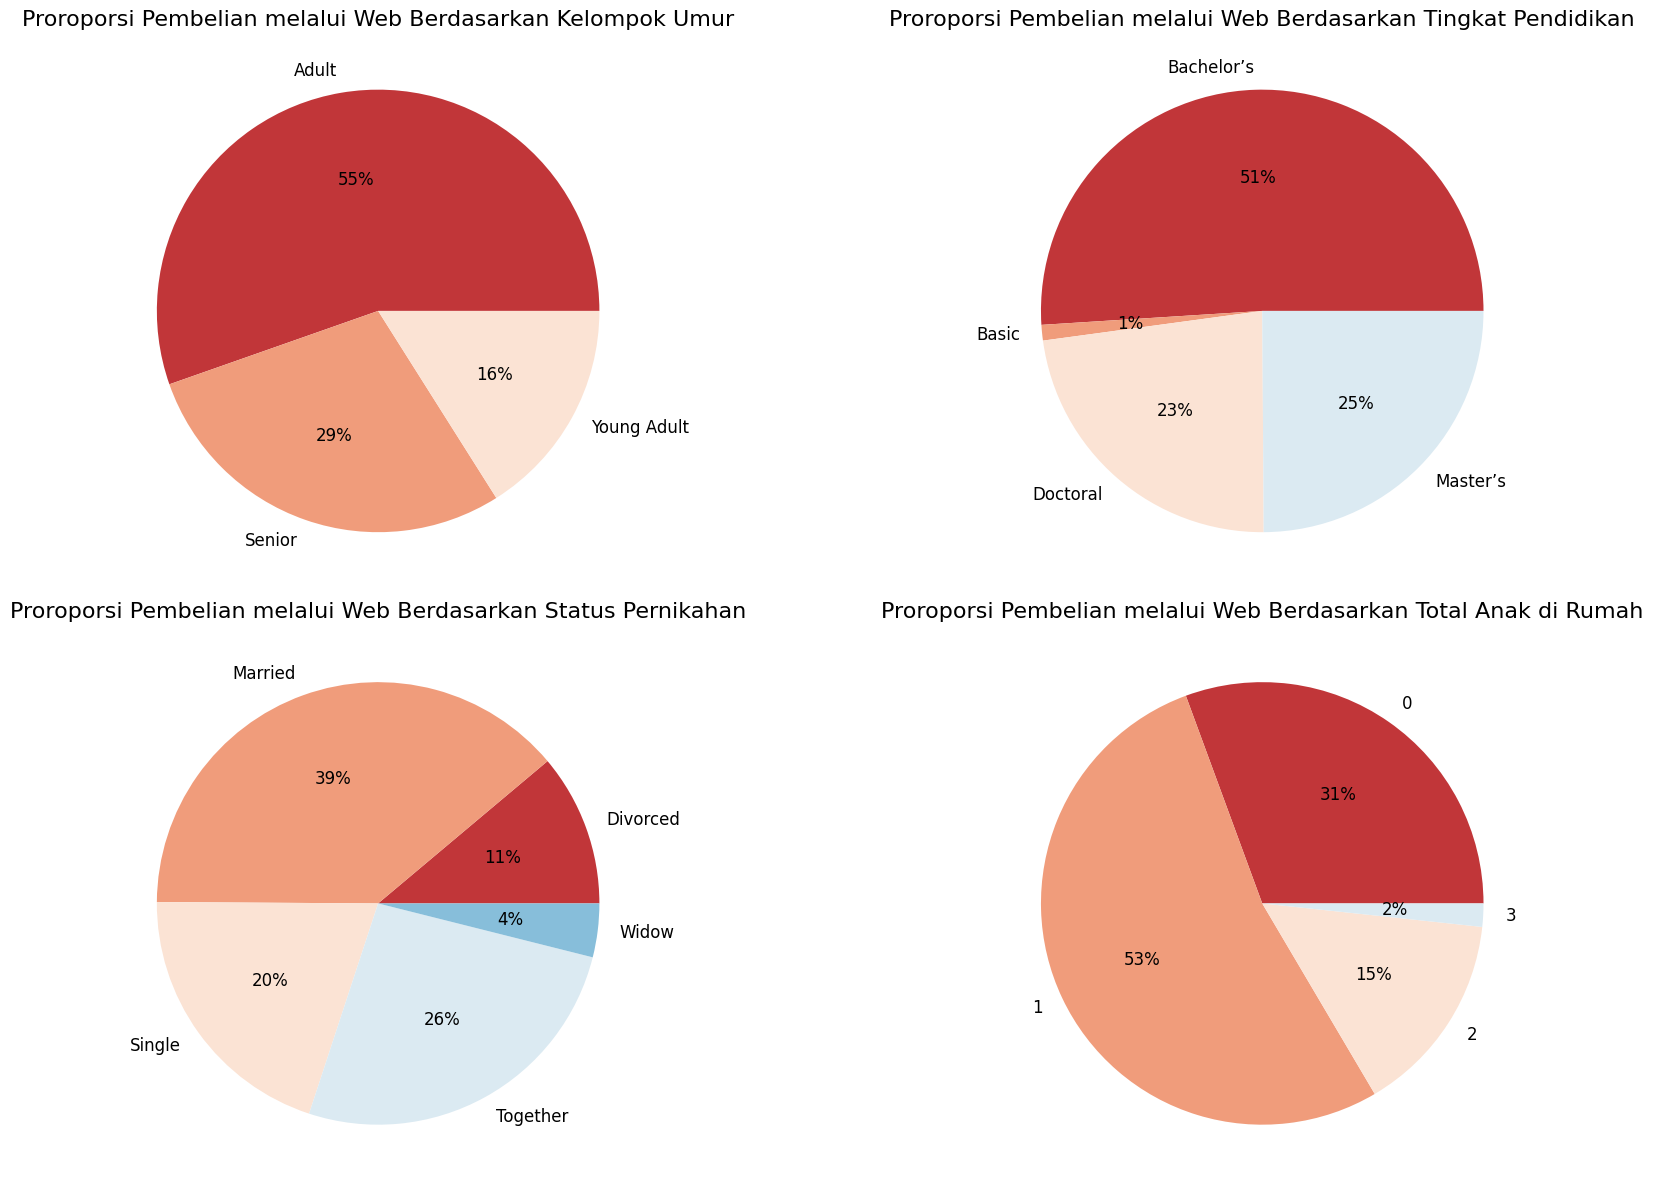

In [140]:
plt.figure(figsize=(20,12))

tmp = ['Kelompok Umur', 'Tingkat Pendidikan', 'Status Pernikahan', 'Total Anak di Rumah']

for i, column in enumerate(['GroupAge', 'Education', 'Marital_Status', 'ChildrenHome']):
    plt.subplot(2, 2, i+1)
    df_tmp = df.groupby([column])[['NumWebPurchases']].sum()
    df_tmp['PersentasePembelian'] = df_tmp['NumWebPurchases'] / df_tmp['NumWebPurchases'].sum() * 100
    df_tmp

    plots = plt.pie(
        x=df_tmp['PersentasePembelian'],
        labels=df_tmp.index,
        autopct=f'%.0f%%',
        textprops={'fontsize': 12},
    )
    plt.title(f'Proroporsi Pembelian melalui Web Berdasarkan {tmp[i]}', size=16)

plt.tight_layout()

**Hasil Observasi**

- Pembelian paling banyak melalui toko dilakukan oleh pelanggan Adult, Bachelor's, Maried, dan pelanggan yang memiliki 1 anak.
- Pembelian paling sedikit melalui toko dilakukan oleh pelanggan Young Adult, Basic, Widow, dan pelanggan yang memiliki 3 anak.

### **Saluran Pembelian Katalog**

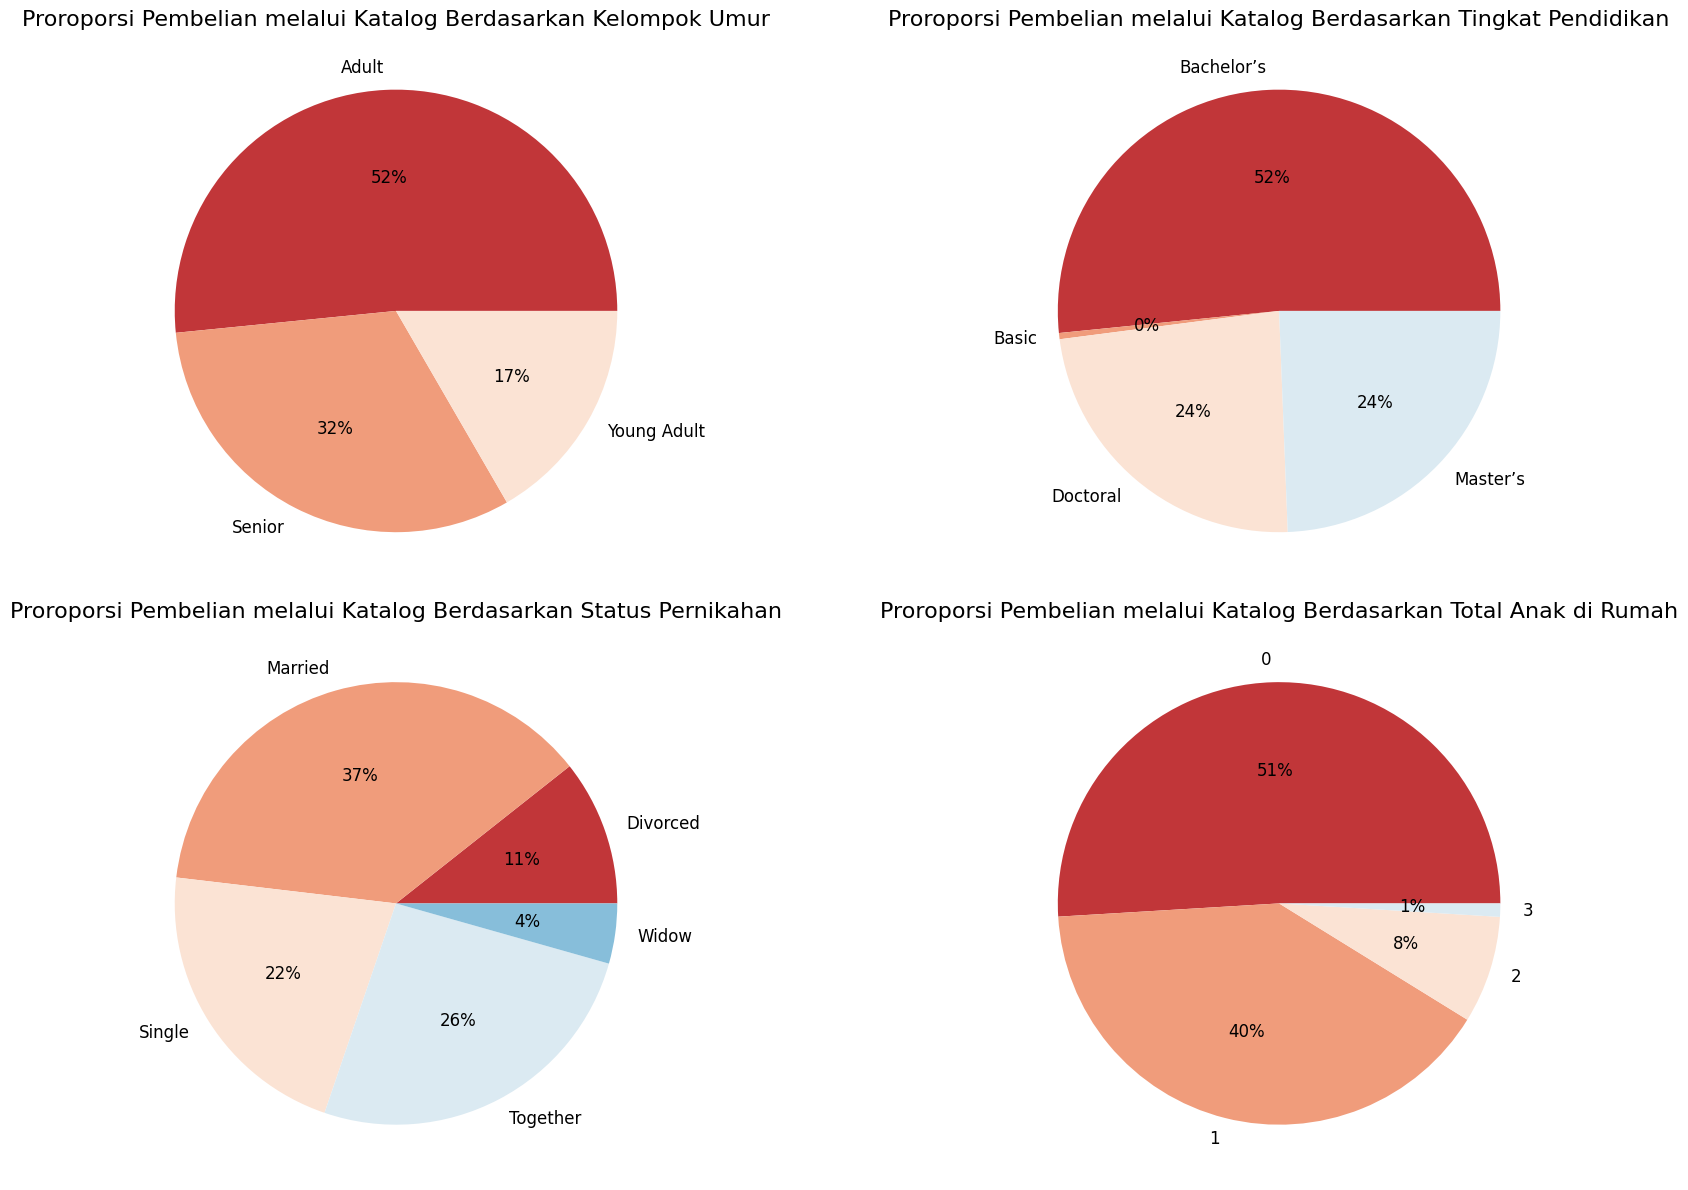

In [141]:
plt.figure(figsize=(20,12))

tmp = ['Kelompok Umur', 'Tingkat Pendidikan', 'Status Pernikahan', 'Total Anak di Rumah']

for i, column in enumerate(['GroupAge', 'Education', 'Marital_Status', 'ChildrenHome']):
    plt.subplot(2, 2, i+1)
    df_tmp = df.groupby([column])[['NumCatalogPurchases']].sum()
    df_tmp['PersentasePembelian'] = df_tmp['NumCatalogPurchases'] / df_tmp['NumCatalogPurchases'].sum() * 100
    df_tmp

    plots = plt.pie(
        x=df_tmp['PersentasePembelian'],
        labels=df_tmp.index,
        autopct=f'%.0f%%',
        textprops={'fontsize': 12},
    )
    plt.title(f'Proroporsi Pembelian melalui Katalog Berdasarkan {tmp[i]}', size=16)

plt.tight_layout()

**Hasil Observasi**

- Pembelian paling banyak melalui katalog dilakukan oleh pelanggan Adult, Bachelor's, Maried, dan pelanggan yang tidak memiliki anak.
- Pembelian paling sedikit melalui katalog dilakukan oleh pelanggan Young Adult, Basic, Widow, dan pelanggan yang memiliki 3 anak.
- Karakteristik pelanggan yang paling sedikit berbelanja di web dan katalog mirip

### **Saluran Pembelian Toko**

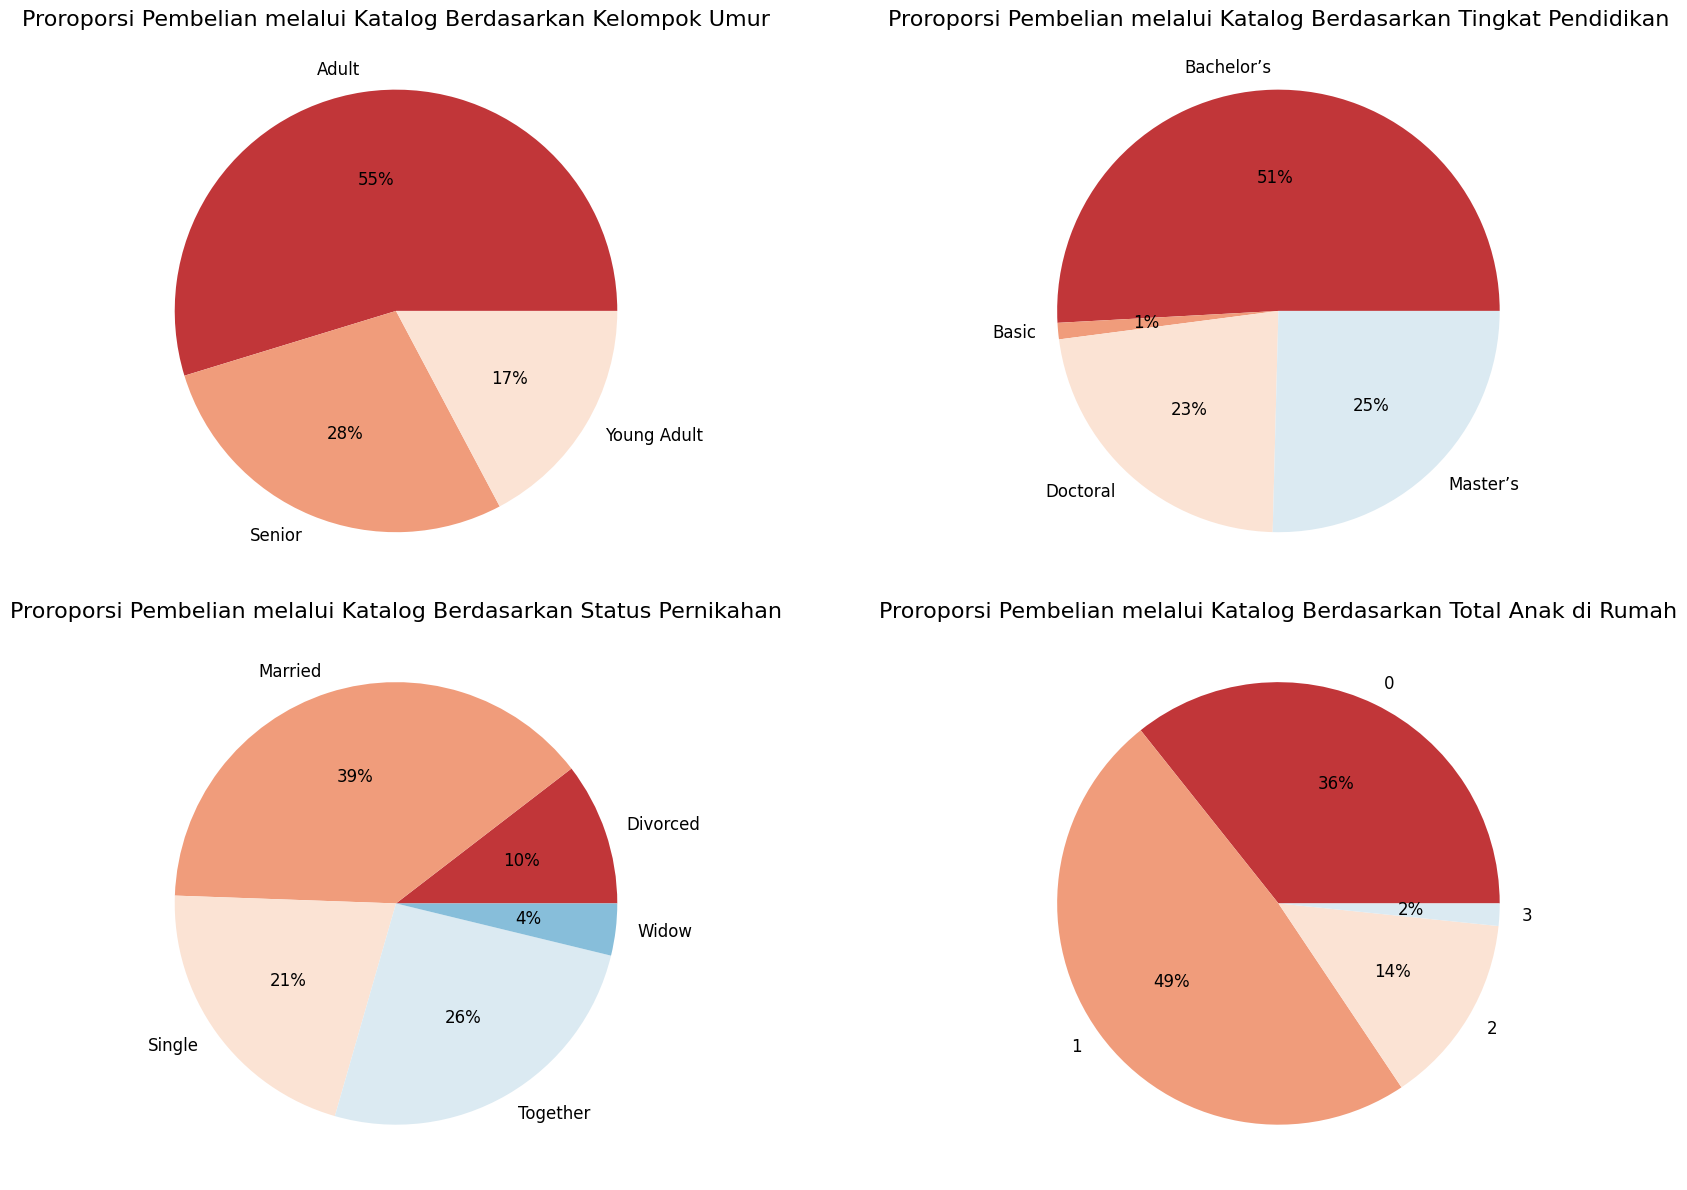

In [142]:
plt.figure(figsize=(20,12))

tmp = ['Kelompok Umur', 'Tingkat Pendidikan', 'Status Pernikahan', 'Total Anak di Rumah']

for i, column in enumerate(['GroupAge', 'Education', 'Marital_Status', 'ChildrenHome']):
    plt.subplot(2, 2, i+1)
    df_tmp = df.groupby([column])[['NumStorePurchases']].sum()
    df_tmp['PersentasePembelian'] = df_tmp['NumStorePurchases'] / df_tmp['NumStorePurchases'].sum() * 100
    df_tmp

    plots = plt.pie(
        x=df_tmp['PersentasePembelian'],
        labels=df_tmp.index,
        autopct=f'%.0f%%',
        textprops={'fontsize': 12},
    )
    plt.title(f'Proroporsi Pembelian melalui Katalog Berdasarkan {tmp[i]}', size=16)

plt.tight_layout()

**Hasil Observasi**

- Pembelian paling paling banyak melalui toko dilakukan oleh pelanggan Adult, Bachelor's, Maried, dan pelanggan yang memiliki 1 anak.
- Pembelian paling paling sedikit melalui toko dilakukan oleh pelanggan Young Adult, Basic, Widow, dan pelanggan yang memiliki 3 anak.
- Karakteristik pelanggan yang berbelanja di web dan toko mirip.
- Karakteristik pelanggan yang paling sedikit berbelanja di web, katalog, dan toko mirip

# **4. Conclusion and Recommendation**

## **4.1 Conclusion**

- Pelanggan yang paling banyak melakukan pembelian dalam 2 tahum terakhir adalah kelompok pelanggan Adult (36-55 tahun), Bachelor's, Maried, dan tidak memili anak di rumah.
- Pelanggan yang paling sedikit melakukan pembelian dalam 2 tahum terakhir adalah kelompok pelanggan Young Adult (19-35 tahun), Basic, Widow, dan memiliki 3 anak.
- Produk yang dengan pembelian paling banyak adalah Anggur, setelah itu daging.
- Produk yang dengan pembelian paling sedikit adalah buah, ikan, makanan manis, dan emas. Pembelian emas termasuk sedikt mungkin karena emas termasuk barang untuk investasi dan pembelian tidak teratur dalam jumlah banyak. Pembelian buah, ikan, dan makanan termasuk sedikit mungkin karena barang tersebut kurang diminati.
- Semua kategori pelanggan, baik berdasarkan kelompok umur, tingkat pendidikan, status pernikahan, dan total anak di rumah, melakukan pembelian paling banyak pada produk anggur.
- Kampanye promosi yang dilakukan terindikasi tidak efektik. Mayoritas pelanggan sama sekali tidak pernah menerima penawaran kampanye. 
- Pelanggan paling banyak melakukan pembelian melalui toko dan paling sedikit melakukan pembelian melalui katalog.
- Karakteristik pelanggan yang paling banyak melakukan pembelian melalui toko dan web mirip, yaitu Adult, Bachelor's, Maried, dan memiliki 1 anak.
- Karakteristik pelanggan yang paling banyak melakukan pembelian melalui katalog hanya berbeda pada jumlah anak yang dimiliki pelanggan, yaitu tidak memimiliki anak.
- Karakteristik pelanggan yang paling sedikit melakukan pembelian di web, katalog, dan toko mirip, yaitu Young Adult, Basic, Widow, dan memiliki 3 anak.

## **4.2 Recommendation**

- Kampanye promosi perlu diperbaiki agar lebih efektif dengan cara menyasar pelanggan yang tepat dengan promo yang tepat.

- Jika perusahaan ingin meningkatkan loyalitas, memperkuat hubungan, dan menjaga kepuasan pelanggan untuk memastikan pelanggan terus melakukan pembelian, maka maka promo dapat difokuskan pada pelanggan yang paling banyak melakukan pembelian dalam 2 tahum terakhir, yaitu Adult (36-55 tahun), Bachelor's, Maried, dan tidak memili anak di rumah. Promo yang dapat diterapkan dapat berupa diskon besar atau penawaran khusus yang hanya tersedia untuk pelanggan yang paling banyak melakukan pembelian, hadiah loyalitas, dan layanan prioritas. Selain itu, fokus promo ini juga dapat diterapkan pada produk dengan pembelian paling banyak seperti anggur dan daging.

- Jika perusahaan ingin meningkatkan frekuensi pembelian, mengonversi pelanggan yang lebih aktif, dan meningkatkan nilai pembelian rata-rata, maka promo dapat difokuskan pada pelanggan yang paling sedikit melakukan pembelian dalam 2 tahum terakhir, yaitu kelompok pelanggan Young Adult (19-35 tahun), Basic, Widow, dan memiliki 3 anak. Promo fokus pada insentif untuk memotivasi pembelian tambahan. Promo yang dapat diterapkan dapat berupa diskon besar untuk pembelian pertama atau kedua untuk mendorong percobaan produk, paket bundling dengan produk tambahan untuk mendorong pembelian lebih banyak, menawarkan diskon atau hadiah jika mereka merekomendasikan produk kepada orang lain, dan memberikan poin loyalitas untuk setiap pembelian dengan tujuan meningkatkan frekuensi pembelian. Selain itu, fokus promo ini juga dapat diterapkan pada produk dengan pembelian paling sedikit seperti buah, ikan, makanan manis, dan emas.

- Pada saluran pembelian yang paling banyak digunakan pelanggan seperti toko, perusaahaan dapat melakukan promo dengan fokus memaksimalkan penjualan, memanfaatkan volume lalu lintas tinggi, dan meningkatkan konversi. Promo yang dapat dilakukan diantaranya, diskon besar atau penawaran menarik untuk meningkatkan penjualan, seperti diskon volume atau penawaran beli 1 gratis 1, penawaran atau produk eksklusif untuk pelanggan di saluran tersebut, dan promosi untuk meningkatkan nilai pembelian dengan menawarkan produk tambahan yang relevan.

- Pada saluran pembelian yang paling sedikit digunakan pelanggan seperti katalog, perusaahaan dapat melakukan promo dengan fokus meningkatkan kunjungan dan visibilitas, mendorong penggunaan saluran, dan mengubah saluran menjadi lebih aktif. Promo yang dapat dilakukan diantaranya, diskon besar atau penawaran khusus untuk menarik pelanggan baru ke saluran tersebut, menggabungkan produk dengan harga khusus atau bundling yang menarik untuk memotivasi pembelian, penawaran waktu terbatas untuk menciptakan rasa urgensi dan mendorong kunjungan ke saluran tersebut.